In [1]:
print("Credit EDA-FINAL NOTEBOOK : Ashish Arora - DS 45")

Credit EDA-FINAL NOTEBOOK : Ashish Arora - DS 45


<img src="https://www.ineedafastmoneyloan.com/wp-content/uploads/2017/11/Default-on-Loans.jpg" class="img-thumbnail" alt="Cinque Terre">
<h1 style = color:black><center>Exploratary Data Analysis for Bank Risk Analysis </center></h1>

<div class="alert alert-warning">
    <span style='font-family:Georgia' >
        <b>Business Understanding: </b><br><br>
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.<br><br>When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

<br>The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

- The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

- All other cases: All other cases when the payment is paid on time.

<br>When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

- Approved: The Company has approved loan Application

- Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

- Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

- Unused offer:  Loan has been cancelled by the client but at different stages of the process.

<br>In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.
    </span>    
</div>

<div class="alert alert-success">
    <span style='font-family:Georgia' >
        <b>Business Objectives: </b><br><br>This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.
    </span>    
</div>

### Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

import missingno as msno

### Changing Jupyter view options

In [3]:
pd.options.display.max_rows = 10000
pd.options.display.max_colwidth = 100000
pd.options.display.max_columns= 122
pd.set_option('float_format', '{:f}'.format)

### Read dataset

In [4]:
prev_app = pd.read_csv("C://Users//Dreams/Desktop//upgrad python//Loan Defaulter eda//previous_application.csv" , parse_dates=True)
curr_app = pd.read_csv("C://Users//Dreams/Desktop//upgrad python//Loan Defaulter eda//application_data.csv" , parse_dates=True)

### Inspecting shape of loaded data

In [5]:
print("Previous Application shape = ",prev_app.shape)
print("Current Application shape = ",curr_app.shape)

Previous Application shape =  (1670214, 37)
Current Application shape =  (307511, 122)


### Reading the data dictionary to read description of any column if needed during analysis.

In [6]:
col_des = pd.read_csv("C://Users//Dreams/Desktop//upgrad python//Loan Defaulter eda//columns_description.csv" , 
                      encoding= 'unicode_escape')

In [7]:
col_des.head()

0             Table                 Row  \
0  1  application_data          SK_ID_CURR   
1  2  application_data              TARGET   
2  5  application_data  NAME_CONTRACT_TYPE   
3  6  application_data         CODE_GENDER   
4  7  application_data        FLAG_OWN_CAR   

                                                                                                                                                                                   Description  \
0                                                                                                                                                                     ID of loan in our sample   
1  Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)   
2                                                                                                                                                  Identification if loan is cash or revolving   
3                                                                                                                                                                         Gender of the client   
4                                                                                                                                                                Flag if the client owns a car   

  Special  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

### Splitting the data dictionary for each data set

In [8]:
curr_app_desc = col_des[col_des["Table"] == 'application_data']
curr_app_desc.set_index("Row",drop=True, inplace =True)
curr_app_desc.drop(["Table", "0", "Special"], axis = 1, inplace =True)

prev_app_desc = col_des[col_des["Table"] != 'application_data']
prev_app_desc.set_index("Row",drop=True, inplace =True)
prev_app_desc.drop(["Table", "0", "Special"], axis = 1, inplace =True)

In [9]:
curr_app_desc.head()

Description
Row                                                                                                                                                                                                            
SK_ID_CURR                                                                                                                                                                             ID of loan in our sample
TARGET              Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
NAME_CONTRACT_TYPE                                                                                                                                                  Identification if loan is cash or revolving
CODE_GENDER                                                                                                                                                                                Gender of the client
FLAG_OWN_CAR                                                                                                                                                                      Flag if the client owns a car

In [10]:
prev_app_desc.head()

Description
Row                                                                                                                                                                                                                                                       
SK_ID_PREV          ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) 
SK_ID_CURR                                                                                                                                                                                                                        ID of loan in our sample
NAME_CONTRACT_TYPE                                                                                                                                                 Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application
AMT_ANNUITY                                                                                                                                                                                                                Annuity of previous application
AMT_APPLICATION                                                                                                                                                                             For how much credit did client ask on the previous application

### Let's first start exploring Current Application dataset.

In [11]:
curr_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL     AMT_CREDIT  AMT_ANNUITY  \
0               Y             0     202500.000000  406597.500000 24700.500000   
1               N             0     270000.000000 1293502.500000 35698.500000   
2               Y             0      67500.000000  135000.000000  6750.000000   
3               Y             0     135000.000000  312682.500000 29686.500000   
4               Y             0     121500.000000  513000.000000 21865.500000   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0    351000.000000   Unaccompanied          Working   
1   1129500.000000          Family    State servant   
2    135000.000000   Unaccompanied          Working   
3    297000.000000   Unaccompanied          Working   
4    513000.000000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637       -3648.000000   
1                    0.003541      -16765          -1188       -1186.000000   
2                    0.010032      -19046           -225       -4260.000000   
3                    0.008019      -19005          -3039       -9833.000000   
4                    0.028663      -19932          -3038       -4311.000000   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531    26.000000           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers         1.000000   
1                 1           1           0      Core staff         2.000000   
2                 1           1           0        Laborers         1.000000   
3                 1           0           0        Laborers         2.000000   
4                 1           0           0      Core staff         1.000000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2      

In [12]:
curr_app.shape

(307511, 122)

In [13]:
curr_app.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### Creating function to check object type and numeric functions and number of unique values in each variable.

In [14]:
def obj_cols(df):
    count = 0
    my_dict = {}
    for i in df.columns:
        if df[i].dtype=='O':
            count = count+1
            my_dict[i] = df[i].nunique()
    obj_df = pd.DataFrame(my_dict,index = [0]).T
    obj_df.rename(columns = {0:"Number of Category"}, inplace = True)
    return obj_df

In [15]:
def num_cols(df):
    count = 0
    my_dict = {}
    for i in df.columns:
        if df[i].dtype!='O':
            count = count+1
            my_dict[i] = df[i].nunique()
    num_df = pd.DataFrame(my_dict,index = [0]).T
    num_df.rename(columns = {0:"Number of Unique Values"}, inplace = True)
    return num_df

In [16]:
aa = obj_cols(curr_app)
print("Number of object type columns = ",aa.shape[0])
aa

Number of object type columns =  16


Number of Category
NAME_CONTRACT_TYPE                           2
CODE_GENDER                                  3
FLAG_OWN_CAR                                 2
FLAG_OWN_REALTY                              2
NAME_TYPE_SUITE                              7
NAME_INCOME_TYPE                             8
NAME_EDUCATION_TYPE                          5
NAME_FAMILY_STATUS                           6
NAME_HOUSING_TYPE                            6
OCCUPATION_TYPE                             18
WEEKDAY_APPR_PROCESS_START                   7
ORGANIZATION_TYPE                           58
FONDKAPREMONT_MODE                           4
HOUSETYPE_MODE                               3
WALLSMATERIAL_MODE                           7
EMERGENCYSTATE_MODE                          2

In [17]:
cc = num_cols(curr_app)
print("Number of numeric type columns = ",cc.shape[0])
cc

Number of numeric type columns =  106


Number of Unique Values
SK_ID_CURR                                     307511
TARGET                                              2
CNT_CHILDREN                                       15
AMT_INCOME_TOTAL                                 2548
AMT_CREDIT                                       5603
AMT_ANNUITY                                     13672
AMT_GOODS_PRICE                                  1002
REGION_POPULATION_RELATIVE                         81
DAYS_BIRTH                                      17460
DAYS_EMPLOYED                                   12574
DAYS_REGISTRATION                               15688
DAYS_ID_PUBLISH                                  6168
OWN_CAR_AGE                                        62
FLAG_MOBIL                                          2
FLAG_EMP_PHONE                                      2
FLAG_WORK_PHONE                                     2
FLAG_CONT_MOBILE                                    2
FLAG_PHONE                                          2
FLAG_EMAIL                                          2
CNT_FAM_MEMBERS                                    17
REGION_RATING_CLIENT                                3
REGION_RATING_CLIENT_W_CITY                         3
HOUR_APPR_PROCESS_START                            24
REG_REGION_NOT_LIVE_REGION                          2
REG_REGION_NOT_WORK_REGION                          2
LIVE_REGION_NOT_WORK_REGION                         2
REG_CITY_NOT_LIVE_CITY                              2
REG_CITY_NOT_WORK_CITY                              2
LIVE_CITY_NOT_WORK_CITY                             2
EXT_SOURCE_1                                   114584
EXT_SOURCE_2                                   119831
EXT_SOURCE_3                                      814
APARTMENTS_AVG                                   2339
BASEMENTAREA_AVG                                 3780
YEARS_BEGINEXPLUATATION_AVG                       285
YEARS_BUILD_AVG                                   149
COMMONAREA_AVG                                   3181
ELEVATORS_AVG                                     257
ENTRANCES_AVG                                     285
FLOORSMAX_AVG                                     403
FLOORSMIN_AVG                                     305
LANDAREA_AVG                                     3527
LIVINGAPARTMENTS_AVG                             1868
LIVINGAREA_AVG                                   5199
NONLIVINGAPARTMENTS_AVG                           386
NONLIVINGAREA_AVG                                3290
APARTMENTS_MODE                                   760
BASEMENTAREA_MODE                                3841
YEARS_BEGINEXPLUATATION_MODE                      221
YEARS_BUILD_MODE                                  154
COMMONAREA_MODE                                  3128
ELEVATORS_MODE                                     26
ENTRANCES_MODE                                     30
FLOORSMAX_MODE                                     25
FLOORSMIN_MODE                                     25
LANDAREA_MODE                                    3563
LIVINGAPARTMENTS_MODE                             736
LIVINGAREA_MODE                                  5301
NONLIVINGAPARTMENTS_MODE                          167
NONLIVINGAREA_MODE                               3327
APARTMENTS_MEDI                                  1148
BASEMENTAREA_MEDI                                3772
YEARS_BEGINEXPLUATATION_MEDI                      245
YEARS_BUILD_MEDI                                  151
COMMONAREA_MEDI                                  3202
ELEVATORS_MEDI                                     46
ENTRANCES_MEDI                                     46
FLOORSMAX_MEDI                                     49
FLOORSMIN_MEDI                                     47
LANDAREA_MEDI                                    3560
LIVINGAPARTMENTS_MEDI                            1097
LIVINGAREA_MEDI                                  5281
NONLIVINGAPARTMENTS_MEDI                          214
NONLIVINGAREA_MEDI                

<div class="alert alert-success">
    <span style='font-family:Georgia' >
        <b>Important: </b>
        <br>In our dataset we have 16 object type and 106 numeric type variable. We will analyse each and every variable and will later channge some variables into categorical varaibles.  
    </span>    
</div>

### Defining all Plotting functions

In [18]:
def count_plot(df, attribute, fig_size = (12,8), x_ticks_rotation = 0, y_ticks_rotation = 0, annot_size = 12, hz =False, 
               ticks_size = 15, label_size = 15, title_size = 20, palettes = "hsv"):   
    
    if hz == False:
        plt.rcParams["figure.autolayout"] = True
        plt.figure(figsize=fig_size)
        plot = sns.countplot(x = df[attribute], order = df[attribute].value_counts().index, palette = palettes)

        for rect in plot.patches:
            plot.annotate('{}%'.format(round(rect.get_height()/len(df)*100,2)), 
                           (rect.get_x() + rect.get_width() / 2., rect.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points',
                             fontsize = annot_size, weight="bold")

        plt.ylabel("FREQUENCY OF "+attribute+" IN %", fontsize  =label_size, weight = "bold")
        plt.xlabel("CATEGORY OF "+attribute, fontsize  =label_size, weight = "bold")
        plt.title( attribute, fontsize  =title_size, weight = "bold")
        plt.xticks(fontsize  =ticks_size, weight = "bold", rotation = x_ticks_rotation)
        plt.yticks(fontsize  =ticks_size, weight = "bold", rotation = y_ticks_rotation)
        plt.show()
    else:
        plt.rcParams["figure.autolayout"] = True
        plt.figure(figsize=fig_size)
        plot = sns.countplot(y = df[attribute], order = df[attribute].value_counts().index, palette = palettes)

        for rect in plot.patches:
            plot.annotate('{}%'.format(round(rect.get_height()/len(df)*100,2)), 
                           (rect.get_x() + rect.get_width() / 2., rect.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (9, 0), 
                           textcoords = 'offset points',
                             fontsize = annot_size, weight="bold")

        plt.xlabel("FREQUENCY OF "+attribute+" IN %", fontsize  =label_size, weight = "bold")
        plt.ylabel("CATEGORY OF "+attribute, fontsize  =label_size, weight = "bold")
        plt.title( attribute, fontsize  =title_size, weight = "bold")
        plt.xticks(fontsize  =ticks_size, weight = "bold", rotation = x_ticks_rotation)
        plt.yticks(fontsize  =ticks_size, weight = "bold", rotation = y_ticks_rotation)
    
        plt.show()

In [19]:
def comparison_categorical_plot_single(df, target_var, attribute, 
                       y_Ticks_to_rotate = 360, x_Ticks_to_rotate = 360, annot_size = 12,
                                       fig_size = (10,10), title_size =12, label_size =10 ):
    
   
    
    prob_att = df[[attribute, target_var]].groupby([attribute],as_index=False).mean()
    prob_att[target_var] = prob_att[target_var]*100
    prob_att.sort_values(by=target_var, ascending=False, inplace=True)
    prob_att.reset_index(inplace =True, drop=True)
    
    plt.rcParams["figure.autolayout"] = True

    fig, axes_1 = plt.subplots(nrows = 1,ncols =1, figsize = fig_size)
    b1 = sns.barplot(ax = axes_1, x = attribute, y = target_var, data = prob_att, 
                     order = prob_att[attribute], palette = "hsv" )
    
    for i,rect in enumerate(b1.patches):
        b1.annotate('{}%'.format(round(prob_att[target_var][i],2)), 
                       (rect.get_x() + rect.get_width() / 2., rect.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                         fontsize = annot_size, weight="bold")
    
    axes_1.set_xlabel(attribute, fontsize = label_size, weight = "bold")
    axes_1.set_ylabel("Percentage", fontsize = label_size, weight = "bold")
    axes_1.set_title('% of '+target_var+ ' in '+ attribute, fontsize = title_size, weight = "bold")
        
    x_labels_b1 = [item.get_text() for item in b1.get_xticklabels()]
    y_labels_b1 = [item.get_text() for item in b1.get_yticklabels()]
    
    b1.set_xticklabels(x_labels_b1, rotation= x_Ticks_to_rotate, fontsize = 12, weight = "bold" )
    b1.set_yticklabels(y_labels_b1, rotation= y_Ticks_to_rotate, fontsize = 12, weight = "bold" )
    
    plt.show()

In [20]:
def comparison_categorical_plot(df, target_var, attribute, scale_log = False, 
                       y_Ticks_to_rotate = 360, x_Ticks_to_rotate = 360, 
                                layout_vert=False, annot_size = 12, fig_size = (12,7), palettes = "hsv" ):
    
   
    
    prob_att = df[[attribute, target_var]].groupby([attribute],as_index=False).mean()
    prob_att[target_var] = prob_att[target_var]*100
    prob_att.sort_values(by=target_var, ascending=False, inplace=True)
    prob_att.reset_index(inplace =True, drop=True)
    
    if layout_vert ==True:
        
        plt.rcParams["figure.autolayout"] = True

        fig, (axes_1, axes_2) = plt.subplots(nrows = 2, figsize = fig_size)
    else:
        plt.rcParams["figure.autolayout"] = True
        fig, (axes_1, axes_2) = plt.subplots(ncols = 2, figsize = fig_size)
    
    b1 = sns.barplot(ax = axes_1, x = attribute, y = target_var, data = prob_att, 
                     order = prob_att[attribute], palette = palettes )
    
    for i,rect in enumerate(b1.patches):
        b1.annotate('{}%'.format(round(prob_att[target_var][i],2)), 
                       (rect.get_x() + rect.get_width() / 2., rect.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                         fontsize = annot_size, weight="bold")
    
    axes_1.set_xlabel(attribute, fontsize = 15, weight = "bold")
    axes_1.set_ylabel("Percentage", fontsize = 15, weight = "bold")
    axes_1.set_title('% of '+target_var+ ' in '+ attribute, fontsize = 17, weight = "bold")
        
    x_labels_b1 = [item.get_text() for item in b1.get_xticklabels()]
    y_labels_b1 = [item.get_text() for item in b1.get_yticklabels()]
    
    b1.set_xticklabels(x_labels_b1, rotation= x_Ticks_to_rotate, fontsize = 12, weight = "bold" )
    b1.set_yticklabels(y_labels_b1, rotation= y_Ticks_to_rotate, fontsize = 12, weight = "bold" )
    
    
    b2 = sns.countplot(ax = axes_2, data = df, x= attribute, hue = target_var, palette = palettes , 
                       order = df[attribute].value_counts().index )
    
    if scale_log ==True:
        axes_2.set_yscale('log')
        axes_2.set_ylabel("Count in log scale", fontsize = 15, weight = "bold")
    else:
        axes_2.set_ylabel("Count", fontsize = 15, weight = "bold")

    axes_2.set_xlabel(attribute, fontsize = 15, weight = "bold")
    
    if layout_vert ==False:
        axes_2.set_title(attribute+' vs '+ target_var, fontsize = 17, weight = "bold")
    else:
        axes_2.set_title("", fontsize = 17, weight = "bold")
    
    x_labels_b2 = [item.get_text() for item in b2.get_xticklabels()]
    y_labels_b2 = [item.get_text() for item in b2.get_yticklabels()]
    
    b2.set_xticklabels(x_labels_b2, rotation= x_Ticks_to_rotate, fontsize = 12, weight = "bold" )
    b2.set_yticklabels(y_labels_b2, rotation= y_Ticks_to_rotate, fontsize = 12, weight = "bold" )
    
    plt.show()

In [21]:
def comparison_categorical_count_plot(df, target_var, attribute, scale_log = False, 
                       y_Ticks_to_rotate = 360, x_Ticks_to_rotate = 360, layout_vert=False, 
                                      annot_size = 12, fig_size = (12,18), palettes = "hsv", label_size =17):
    
   
    
    prob_att = df[[attribute, target_var]].groupby([attribute],as_index=False).mean()
    prob_att[target_var] = prob_att[target_var]*100
    prob_att.sort_values(by=target_var, ascending=False, inplace=True)
    prob_att.reset_index(inplace =True, drop=True)
    
    if layout_vert ==True:
        
        plt.rcParams["figure.autolayout"] = True

        fig, (axes_1, axes_2) = plt.subplots(nrows = 2, figsize = fig_size)
    else:
        plt.rcParams["figure.autolayout"] = True
        fig, (axes_1, axes_2) = plt.subplots(ncols = 2, figsize =fig_size)
    
    b1 = sns.barplot(ax = axes_1, x = attribute, y = target_var, data = prob_att, 
                     order = prob_att[attribute], palette = palettes )
    
    for i,rect in enumerate(b1.patches):
        b1.annotate('{}%'.format(round(prob_att[target_var][i],2)), 
                       (rect.get_x() + rect.get_width() / 2., rect.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                         fontsize = annot_size, weight="bold")
    
    axes_1.set_xlabel(attribute, fontsize = label_size, weight = "bold")
    axes_1.set_ylabel("Percentage", fontsize = label_size, weight = "bold")
    axes_1.set_title('% of Defaulter'+ ' in '+ attribute, fontsize = 17, weight = "bold")
        
    x_labels_b1 = [item.get_text() for item in b1.get_xticklabels()]
    y_labels_b1 = [item.get_text() for item in b1.get_yticklabels()]
    
    b1.set_xticklabels(x_labels_b1, rotation= x_Ticks_to_rotate, fontsize = 12, weight = "bold" )
    b1.set_yticklabels(y_labels_b1, rotation= y_Ticks_to_rotate, fontsize = 12, weight = "bold" )
    

    
    b2 = sns.countplot(ax = axes_2, x= df[attribute], order = prob_att[attribute], palette = palettes )

    for rect in b2.patches:
        b2.annotate('{}%'.format(round(rect.get_height()/len(df)*100,2)), 
                       (rect.get_x() + rect.get_width() / 2., rect.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points',
                         fontsize = annot_size, weight="bold")

    axes_2.set_ylabel("Count OF "+attribute+" IN %", fontsize  =label_size, weight = "bold")
    axes_2.set_xlabel("CATEGORY COUNT OF "+attribute, fontsize  =label_size, weight = "bold")
    
    x_labels_b2 = [item.get_text() for item in b2.get_xticklabels()]
    y_labels_b2 = [item.get_text() for item in b2.get_yticklabels()]
    
    b2.set_xticklabels(x_labels_b2, rotation= x_Ticks_to_rotate, fontsize = 12, weight = "bold" )
    b2.set_yticklabels(y_labels_b2, rotation= y_Ticks_to_rotate, fontsize = 12, weight = "bold" )
    
    plt.show()

In [22]:
def Group_barchart_categorical(df, 
                               target_var, 
                               attribute, 
                               hz = False,
                               fig_size = (10,10),  
                               scale_log = False, 
                               y_Ticks_to_rotate = None, 
                               x_Ticks_to_rotate =None,
                               ticks_size = 12,
                               label_size = 15,
                               title_size = 18,
                               annot_size = 10):
    
    prob_att = df[[attribute, target_var]].groupby([attribute],as_index=False).mean()
    prob_att[target_var] = prob_att[target_var]*100
    prob_att.sort_values(by=target_var, ascending=False, inplace=True)
    prob_att.reset_index(inplace =True, drop=True)
    
    if hz == False: 
        plt.figure(figsize=fig_size)
        
        if scale_log ==True:
            plt.yscale('log')
        else:
            pass
        
        sns.countplot(data = df, x= attribute, hue = target_var, palette = "terrain", 
                           order = prob_att[attribute] )
        
        
        if scale_log ==True:
            plt.ylabel("Count in log scale", fontsize = label_size, weight = "bold")
        else:
            plt.ylabel("Count", fontsize = label_size, weight = "bold")

        plt.xlabel(attribute, fontsize = label_size, weight = "bold")
        
        if target_var != None:
            plt.title(attribute+' vs '+ target_var, fontsize = title_size, weight = "bold")
            plt.legend(df[target_var].unique(), fontsize ='xx-large')
        else:
            plt.title(attribute, fontsize = title_size, weight = "bold")
        
        plt.yticks(rotation = y_Ticks_to_rotate,fontsize = ticks_size, weight = "bold" )
        plt.xticks(rotation = x_Ticks_to_rotate,fontsize = ticks_size, weight = "bold")
    
    else:
        
        plt.figure(figsize=fig_size)
        
         
        if scale_log ==True:
            plt.xscale('log')   
        else:
            pass
        
        sns.countplot(data = df, y= attribute, hue = target_var, palette = "terrain", 
                           order = df[attribute].value_counts().index )
       
        if scale_log ==True:
            plt.xlabel("Count in log scale", fontsize = label_size, weight = "bold")
        else:
            plt.xlabel("Count", fontsize = label_size, weight = "bold")

        plt.ylabel(attribute, fontsize = label_size, weight = "bold")
        
        if target_var != None:
            plt.title(attribute+' vs '+ target_var, fontsize = title_size, weight = "bold")
            plt.legend(df[target_var].unique(), fontsize ='xx-large', loc = 'best')
        else:
            plt.title(attribute, fontsize = title_size, weight = "bold", loc = 'best')
        
        plt.yticks(rotation = y_Ticks_to_rotate,fontsize = ticks_size, weight = "bold" )
        plt.xticks(rotation = x_Ticks_to_rotate,fontsize = ticks_size, weight = "bold")
        
    
    plt.show()

In [23]:
def density_plot_comparison_curr_multiple(df, column_lst, n_rows = 0, n_cols = 0, fig_size= (12,12), title_size = 12):
    
    default = df[column_lst][df["TARGET"]==1]
    repay   = df[column_lst][df["TARGET"]==0]
    
    plt.rcParams["figure.autolayout"] = True
    plt.figure(figsize = fig_size)
   
    for i,j in enumerate(column_lst):
        plt.subplot(n_rows, n_cols,i+1)
        sns.distplot(default[j], hist=False, color='steelblue',label = "Defaulter")
        sns.distplot(repay[j],  hist=False, color='coral',    label = "Repayer")
        plt.title(j, fontdict={'fontsize' : title_size, 'weight' : "bold", 'color' : 'steelblue'})
        plt.xlabel("")

    plt.legend()
    plt.show() 
    

In [124]:
def Multiple_countplot(df, 
                     target_var, 
                     column_lst, 
                      n_rows = 0, 
                      n_cols = 0,
                    fig_size = (10,10),
                    y_Ticks_to_rotate = 360, 
                    x_Ticks_to_rotate = 360,  
                    tick_size = 10,
                    annot_size = 12,
                    title_size =10, 
                    label_size =12 ):
    plt.rcParams["figure.autolayout"] = True
    plt.figure(figsize = fig_size)
    
    for i,j in enumerate(column_lst):
        plt.subplot(n_rows, n_cols,  i+1)
        
        b1 = sns.countplot(data =df, x = j , hue = target_var,
                     order = df[j].value_counts().index, palette = "Paired" )
    
        for k,rect in enumerate(b1.patches):
            b1.annotate('{}%'.format(round(rect.get_height()/len(df)*100,2)), 
                           (rect.get_x() + rect.get_width() / 2., rect.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points',
                             fontsize = annot_size, weight="bold")
    
        plt.xlabel(j, fontsize = label_size, weight = "bold")
        plt.ylabel("Percentage", fontsize = label_size, weight = "bold")
        plt.title('% of '+target_var+ ' in '+ j, fontsize = title_size, weight = "bold")
    
        plt.xticks( rotation= x_Ticks_to_rotate, fontsize = tick_size, weight = "bold" )
        plt.yticks(np.arange(0,16, 2), rotation= y_Ticks_to_rotate, fontsize = tick_size, weight = "bold" )
    
    plt.show()
    

In [25]:
def comparison_categorical_single_multiple(df, 
                                           target_var, 
                                           column_lst, 
                                           n_rows = 0, 
                                           n_cols = 0,
                                           fig_size = (10,10),
                                           y_Ticks_to_rotate = 360, 
                                           x_Ticks_to_rotate = 360,  
                                           tick_size = 10,
                                           annot_size = 12,
                                           title_size =10, 
                                           label_size =12 ):
    
    plt.rcParams["figure.autolayout"] = True
    plt.figure(figsize = fig_size)
    
    for i,j in enumerate(column_lst):
        plt.subplot(n_rows, n_cols,  i+1)
        
        prob_att = df[[j, target_var]].groupby([j],as_index=False).mean()
        prob_att[target_var] = prob_att[target_var]*100
        prob_att.sort_values(by=target_var, ascending=False, inplace=True)
        prob_att.reset_index(inplace =True, drop=True)
        
        b1 = sns.barplot(x = j, y = target_var, data = prob_att, 
                     order = prob_att[j], palette = "hsv" )
    
        for k,rect in enumerate(b1.patches):
            b1.annotate('{}%'.format(round(prob_att[target_var][k],2)), 
                           (rect.get_x() + rect.get_width() / 2., rect.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points',
                             fontsize = annot_size, weight="bold")
    
        plt.xlabel(j, fontsize = label_size, weight = "bold")
        plt.ylabel("Percentage", fontsize = label_size, weight = "bold")
        plt.title('% of '+target_var+ ' in '+ j, fontsize = title_size, weight = "bold")
    
        plt.xticks( rotation= x_Ticks_to_rotate, fontsize = tick_size, weight = "bold" )
        plt.yticks(np.arange(0,16, 2), rotation= y_Ticks_to_rotate, fontsize = tick_size, weight = "bold" )
    
    plt.show()

In [26]:
def count_plot_multiple1(df, 
                        column_lst, 
                        fig_size = (12,8),
                        n_rows = 0, 
                        n_cols = 0,                       
                        x_ticks_rotation = 0, 
                        y_ticks_rotation = 0, 
                        tick_size = 10,
                        annot_size = 12,
                        title_size =10, 
                        label_size =12 ):  
    
    
    
    plt.rcParams["figure.autolayout"] = True
    plt.figure(figsize = fig_size)
    
    for i,j in enumerate(column_lst):
        plt.subplot(n_rows, n_cols,  i+1)
        plot = sns.countplot(x = df[j], order = sorted(df[j].value_counts().index, reverse  =True), palette = "hsv")

        for rect in plot.patches:
            plot.annotate('{}%'.format(round(rect.get_height()/len(df)*100,2)), 
                           (rect.get_x() + rect.get_width() / 2., rect.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points',
                             fontsize = annot_size, weight="bold")

        plt.ylabel("Count %", fontsize  =label_size, weight = "bold")
        plt.xlabel(j, fontsize  =label_size, weight = "bold")
        plt.xticks(fontsize  =label_size, weight = "bold", rotation = x_ticks_rotation)
        plt.yticks(np.arange(0, 400000, 50000), fontsize  =label_size, weight = "bold", rotation = y_ticks_rotation)
    plt.show()


In [27]:
def count_plot_multiple(df, 
                        column_lst, 
                        fig_size = (12,8),
                        n_rows = 0, 
                        n_cols = 0,                       
                        x_ticks_rotation = 0, 
                        y_ticks_rotation = 0, 
                        tick_size = 10,
                        annot_size = 12,
                        title_size =10, 
                        label_size =12 ):  
    
    
    
    plt.rcParams["figure.autolayout"] = True
    plt.figure(figsize = fig_size)
    
    for i,j in enumerate(column_lst):
        plt.subplot(n_rows, n_cols,  i+1)
        plot = sns.countplot(x = df[j], order = df[j].value_counts().index, palette = "hsv")

        for rect in plot.patches:
            plot.annotate('{}%'.format(round(rect.get_height()/len(df)*100,2)), 
                           (rect.get_x() + rect.get_width() / 2., rect.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points',
                             fontsize = annot_size, weight="bold")

        plt.ylabel("Count %", fontsize  =label_size, weight = "bold")
        plt.xlabel(j, fontsize  =label_size, weight = "bold")
        plt.xticks(fontsize  =label_size, weight = "bold", rotation = x_ticks_rotation)
        plt.yticks(np.arange(0, 400000, 50000), fontsize  =label_size, weight = "bold", rotation = y_ticks_rotation)
    plt.show()


In [28]:
def box_plot_check_multiple(df, column_lst, n_rows = 0, n_cols = 0, x_label_size =0, x_tick_rotation = 0,y_tick_rotation = 0, fig_size = (12,8)):

    plt.rcParams["figure.autolayout"] = True
    plt.figure(figsize = fig_size)
    for i,j in enumerate(column_lst):
        plt.subplot(n_rows, n_cols,  i+1)
        sns.boxplot(y=df[j])
        plt.xlabel(j, fontsize = x_label_size, weight = 'bold')
        plt.yticks(rotation = x_tick_rotation)
        plt.xticks(rotation = y_tick_rotation)
        plt.ylabel("")
           
    plt.show()

In [29]:
def corr_map_multiple( df, col_name, fig_size = (12,8), ticks_font_size = 13, c_map = "Wistia", annot_size  =13 ):
   
    temp = df[col_name]
    plt.figure(figsize = fig_size)
    sns.heatmap(temp.corr()*100, cmap = c_map, annot =True, annot_kws = {"fontsize":annot_size, "weight":"bold"})
    plt.xticks(fontsize = ticks_font_size, weight = "bold")
    plt.yticks(fontsize = ticks_font_size, weight = "bold")
    plt.show()

In [30]:
def compare_category_col(df, targ_col, categ_col ):
    data = df
    target_col = targ_col
    category_col = categ_col
    my_dict = {}

    categories =data[category_col].unique()

    for i in categories:
        my_dict[i]=data[target_col][data[category_col]== i].value_counts(normalize =True).mul(100)
    dd = pd.DataFrame(my_dict)
    dd.fillna(0, inplace =True)
    dd = dd.apply(lambda x: x/x.sum(), axis = 1)
    return dd*100

In [31]:
def stackbarchart(df, 
                  attribute, 
                  target_var,  
                  fig_size = (12,7), 
                  annot_size = 10, 
                  label_size =12, 
                  title_size =17, 
                  x_tick_rotation  =0): 
    
    aa = pd.pivot_table(data = df, index = attribute, columns = target_var,  aggfunc = "count").iloc[:,0:4]
    bb = aa.apply(lambda x: x/x.sum(), axis = 1)
    bb = bb.T.reset_index(level =0, drop =True)

    b1 = bb.T.plot.bar(stacked=True, figsize=fig_size, fontsize = 16, color = ['steelblue', 'coral', "yellowgreen", "violet"])
    
    plt.title("Proportion of Loan status in each " +  attribute, fontsize = title_size)
    plt.ylabel("Proportion of loan status", fontsize  = label_size)
    plt.xlabel(attribute, fontsize  =label_size)
    plt.legend(bbox_to_anchor=(0.933, 1), ncol=4, fontsize ='large')
    plt.yticks(np.arange(0,1.4,0.2))
    
    x_tick = np.arange(0, len(df[attribute].unique()),1)
    
    plt.xticks(rotation = x_tick_rotation)
    plt.show()

In [32]:
def compare_category_prob(df, 
                         target_var, 
                         attribute, 
                         y_ticks_rotation = 360, 
                         x_ticks_rotation = 360, 
                         c_map = "Greens",  
                         annot_size  =13,
                         ticks_font_size = 15,
                         fig_size = (12,7)):
    
 
    my_dict = {}

    categories =df[attribute].unique()

    for i in categories:
        my_dict[i]=df[target_var][df[attribute]== i].value_counts(normalize =True).mul(100)
    dd = pd.DataFrame(my_dict)
    dd.fillna(0, inplace =True)
    dd = dd.apply(lambda x: x/x.sum(), axis = 1)
    
    plt.figure(figsize = fig_size)
    sns.heatmap(dd, cmap= c_map, annot =True, annot_kws = {"fontsize":annot_size, "weight":"bold"})
    plt.yticks(fontsize = ticks_font_size, weight = "bold", rotation = y_ticks_rotation)
    plt.xticks(fontsize = ticks_font_size, weight = "bold", rotation = x_ticks_rotation)
    plt.title("Probaility Graph", fontsize = 25)
    
    plt.show()

<div class="alert alert-success">
    <span style='font-family:Georgia' >
        <b>Traget Variable: </b>
        <br><br>As a Data Scientist, our Exploratory data analysis will be focused around finding all those factors which may goona affect applicant's capacity to pay back loan. We also have to find out which client is more roboust to default a loan. For this, we have a target variable which tells, does a given client had made late payment more than X days on at least one of the first Y installments of the loan. If A customer does, than target variable is one else it is 0.
    </span>    
</div>

In [33]:
curr_app_desc.loc["TARGET"]

Description    Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
Name: TARGET, dtype: object

### Let's check how many clients have made late payments more than x days on at least y installments

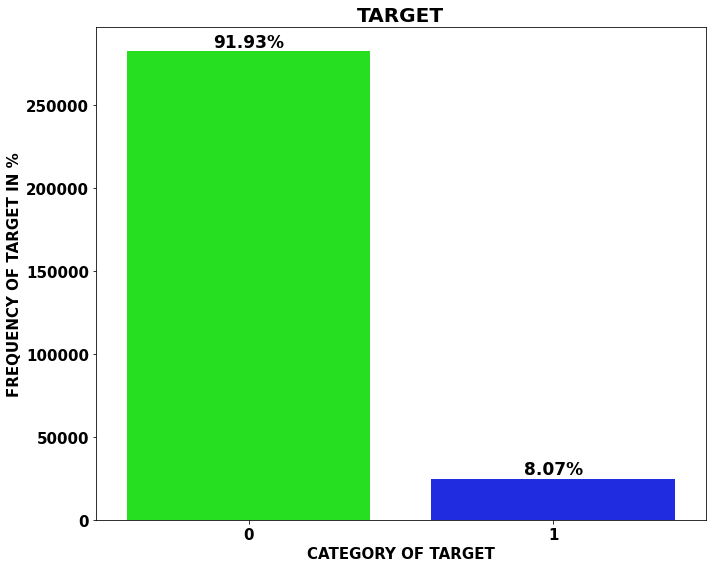

In [34]:
count_plot(curr_app, "TARGET", fig_size=(10, 8), annot_size  = 17)

### Insights:
- **With the given information it can be interpret that our dataset is imbalanced. Most clients doesn't have difficulties in payment.**
- **However our priority is to identify all those prospects which may lead a client to default. As even a single default will impact company profits negatively with huge loss.**
- **So every bit of information which will be roboust to default will be primary for us.**

### Start Exploring DataSet and ultimately the Data Mainpulation

In [35]:
curr_app.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count 307511.000000 307511.000000 307511.000000     307511.000000   
mean  278180.518577      0.080729      0.417052     168797.919297   
std   102790.175348      0.272419      0.722121     237123.146279   
min   100002.000000      0.000000      0.000000      25650.000000   
25%   189145.500000      0.000000      0.000000     112500.000000   
50%   278202.000000      0.000000      0.000000     147150.000000   
75%   367142.500000      0.000000      1.000000     202500.000000   
max   456255.000000      1.000000     19.000000  117000000.000000   

          AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  \
count  307511.000000 307499.000000    307233.000000   
mean   599025.999706  27108.573909    538396.207429   
std    402490.776996  14493.737315    369446.460540   
min     45000.000000   1615.500000     40500.000000   
25%    270000.000000  16524.000000    238500.000000   
50%    513531.000000  24903.000000    450000.000000   
75%    808650.000000  34596.000000    679500.000000   
max   4050000.000000 258025.500000   4050000.000000   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000 307511.000000  307511.000000   
mean                     0.020868 -16036.995067   63815.045904   
std                      0.013831   4363.988632  141275.766519   
min                      0.000290 -25229.000000  -17912.000000   
25%                      0.010006 -19682.000000   -2760.000000   
50%                      0.018850 -15750.000000   -1213.000000   
75%                      0.028663 -12413.000000    -289.000000   
max                      0.072508  -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH   OWN_CAR_AGE    FLAG_MOBIL  \
count      307511.000000    307511.000000 104582.000000 307511.000000   
mean        -4986.120328     -2994.202373     12.061091      0.999997   
std          3522.886321      1509.450419     11.944812      0.001803   
min        -24672.000000     -7197.000000      0.000000      0.000000   
25%         -7479.500000     -4299.000000      5.000000      1.000000   
50%         -4504.000000     -3254.000000      9.000000      1.000000   
75%         -2010.000000     -1720.000000     15.000000      1.000000   
max             0.000000         0.000000     91.000000      1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE    FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000 307511.000000   
mean         0.819889         0.199368          0.998133      0.281066   
std          0.384280         0.399526          0.043164      0.449521   
min          0.000000         0.000000          0.000000      0.000000   
25%          1.000000         0.000000          1.000000      0.000000   
50%          1.000000         0.000000          1.000000      0.000000   
75%          1.000000         0.000000          1.000000      1.000000   
max          1.000000         1.000000          1.000000      1.000000   

         FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count 307511.000000    307509.000000         307511.000000   
mean       0.056720         2.152665              2.052463   
std        0.231307         0.910682              0.509034   
min        0.000000         1.000000              1.000000   
25%        0.000000         2.000000              2.000000   
50%        0.000000         2.000000              2.000000   
75%        0.000000         3.000000              2.000000   
max        1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       2.000000                10.000000   
50%                       2.000000

In [36]:
curr_app.info(verbose =True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

- Seems like there are null values in data set

## Checking Null Columns

<AxesSubplot:>

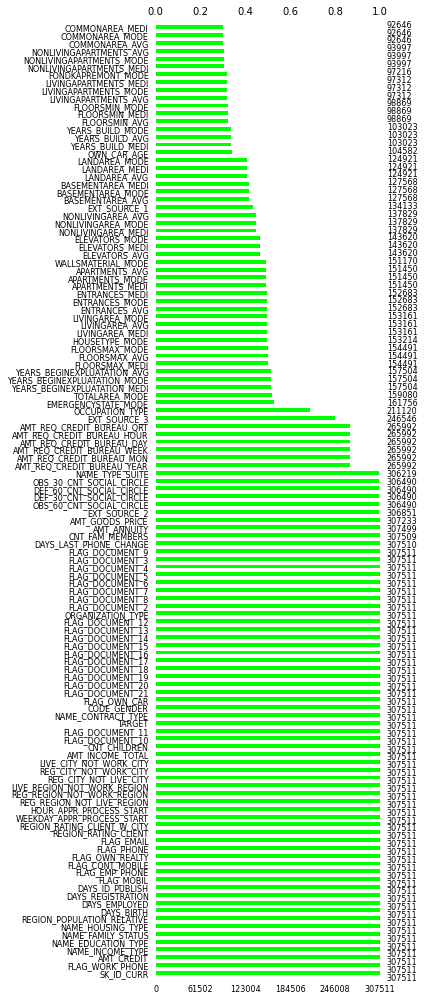

In [37]:
msno.bar(curr_app,  figsize=(6, 14), color = "lime", fontsize = 8, sort = "descending", labels = False)

**Insights**
- **With the given bar plot, It can be said there are around 40-50 columns which have missing values**
- **To support this, we created a data frame to represent columns with the null value and it's association with the target variable**.

### Let's create a function to check the null values with response to target variable

In [38]:
def null_count_comparison(df, target_col):
    my_dict = {}
    for i in df[target_col].unique():    
        my_dict[i]  = df[df[target_col] == i].isnull().sum()

    dd = pd.DataFrame(my_dict)
    dd = dd.loc[~(dd==0).all(axis=1)]
    dd["Total"] = dd.sum( axis =1)
    return round(dd/df.shape[0]*100, 4).sort_values(by="Total", ascending =False)


In [39]:
null_count= null_count_comparison(curr_app,"TARGET")
null_count

1         0     Total
COMMONAREA_MEDI              5.991000 63.881300 69.872300
COMMONAREA_AVG               5.991000 63.881300 69.872300
COMMONAREA_MODE              5.991000 63.881300 69.872300
NONLIVINGAPARTMENTS_MEDI     5.959800 63.473200 69.433000
NONLIVINGAPARTMENTS_MODE     5.959800 63.473200 69.433000
NONLIVINGAPARTMENTS_AVG      5.959800 63.473200 69.433000
FONDKAPREMONT_MODE           5.894100 62.492100 68.386200
LIVINGAPARTMENTS_MODE        5.893100 62.461800 68.355000
LIVINGAPARTMENTS_MEDI        5.893100 62.461800 68.355000
LIVINGAPARTMENTS_AVG         5.893100 62.461800 68.355000
FLOORSMIN_MODE               5.856100 61.992600 67.848600
FLOORSMIN_MEDI               5.856100 61.992600 67.848600
FLOORSMIN_AVG                5.856100 61.992600 67.848600
YEARS_BUILD_MODE             5.772500 60.725300 66.497800
YEARS_BUILD_MEDI             5.772500 60.725300 66.497800
YEARS_BUILD_AVG              5.772500 60.725300 66.497800
OWN_CAR_AGE                  5.609200 60.381600 65.990800
LANDAREA_AVG                 5.236900 54.139900 59.376700
LANDAREA_MEDI                5.236900 54.139900 59.376700
LANDAREA_MODE                5.236900 54.139900 59.376700
BASEMENTAREA_MEDI            5.215400 53.300500 58.516000
BASEMENTAREA_AVG             5.215400 53.300500 58.516000
BASEMENTAREA_MODE            5.215400 53.300500 58.516000
EXT_SOURCE_1                 4.803400 51.577700 56.381100
NONLIVINGAREA_MEDI           4.985200 50.194000 55.179200
NONLIVINGAREA_MODE           4.985200 50.194000 55.179200
NONLIVINGAREA_AVG            4.985200 50.194000 55.179200
ELEVATORS_MEDI               4.850200 48.445700 53.296000
ELEVATORS_MODE               4.850200 48.445700 53.296000
ELEVATORS_AVG                4.850200 48.445700 53.296000
WALLSMATERIAL_MODE           4.640800 46.200000 50.840800
APARTMENTS_MODE              4.645400 46.104400 50.749700
APARTMENTS_MEDI              4.645400 46.104400 50.749700
APARTMENTS_AVG               4.645400 46.104400 50.749700
ENTRANCES_MODE               4.621300 45.727500 50.348800
ENTRANCES_AVG                4.621300 45.727500 50.348800
ENTRANCES_MEDI               4.621300 45.727500 50.348800
LIVINGAREA_MEDI              4.588800 45.604500 50.193300
LIVINGAREA_MODE              4.588800 45.604500 50.193300
LIVINGAREA_AVG               4.588800 45.604500 50.193300
HOUSETYPE_MODE               4.591700 45.584400 50.176100
FLOORSMAX_MEDI               4.573500 45.187300 49.760800
FLOORSMAX_AVG                4.573500 45.187300 49.760800
FLOORSMAX_MODE               4.573500 45.187300 49.760800
YEARS_BEGINEXPLUATATION_AVG  4.490200 44.290800 48.781000
YEARS_BEGINEXPLUATATION_MEDI 4.490200 44.290800 48.781000
YEARS_BEGINEXPLUATATION_MODE 4.490200 44.290800 48.781000
TOTALAREA_MODE               4.457100 43.811400 48.268500
EMERGENCYSTATE_MODE          4.389400 43.008900 47.398300
OCCUPATION_TYPE              2.041600 29.304000 31.345500
EXT_SOURCE_3                 1.846100 17.979200 19.825300
AMT_REQ_CREDIT_BUREAU_WEEK   1.395700 12.105900 13.501600
AMT_REQ_CREDIT_BUREAU_DAY    1.395700 12.105900 13.501600
AMT_REQ_CREDIT_BUREAU_MON    1.395700 12.105900 13.501600
AMT_REQ_CREDIT_BUREAU_QRT    1.395700 12.105900 13.501600
AMT_REQ_CREDIT_BUREAU_HOUR   1.395700 12.105900 13.501600
AMT_REQ_CREDIT_BUREAU_YEAR   1.395700 12.105900 13.501600
NAME_TYPE_SUITE              0.022800  0.397400  0.420100
DEF_30_CNT_SOCIAL_CIRCLE     0.011700  0.320300  0.332000
OBS_60_CNT_SOCIAL_CIRCLE     0.011700  0.320300  0.332000
DEF_60_CNT_SOCIAL_CIRCLE     0.011700  0.320300  0.332000
OBS_30_CNT_SOCIAL_CIRCLE     0.011700  0.320300  0.332000
EXT_SOURCE_2                 0.016900  0.197700  0.214600
AMT_GOODS_PRICE              0.006800  0.083600  0.090400
AMT_ANNUITY                  0.000000  0.003900  0.003900
CNT_FAM_MEMBERS              0.000000  0.000700  0.000700
DAYS_LAST_PHONE_CHANGE       0.000000  0.000300  0.000300

In [40]:
len(null_count)

67

#### Total 67 columns which are null

In [41]:
# lets check columns which are greater than 40%

null_cols_above_40 = null_count[null_count.Total>40]
len(null_cols_above_40)

49

In [42]:
null_cols_above_40

1         0     Total
COMMONAREA_MEDI              5.991000 63.881300 69.872300
COMMONAREA_AVG               5.991000 63.881300 69.872300
COMMONAREA_MODE              5.991000 63.881300 69.872300
NONLIVINGAPARTMENTS_MEDI     5.959800 63.473200 69.433000
NONLIVINGAPARTMENTS_MODE     5.959800 63.473200 69.433000
NONLIVINGAPARTMENTS_AVG      5.959800 63.473200 69.433000
FONDKAPREMONT_MODE           5.894100 62.492100 68.386200
LIVINGAPARTMENTS_MODE        5.893100 62.461800 68.355000
LIVINGAPARTMENTS_MEDI        5.893100 62.461800 68.355000
LIVINGAPARTMENTS_AVG         5.893100 62.461800 68.355000
FLOORSMIN_MODE               5.856100 61.992600 67.848600
FLOORSMIN_MEDI               5.856100 61.992600 67.848600
FLOORSMIN_AVG                5.856100 61.992600 67.848600
YEARS_BUILD_MODE             5.772500 60.725300 66.497800
YEARS_BUILD_MEDI             5.772500 60.725300 66.497800
YEARS_BUILD_AVG              5.772500 60.725300 66.497800
OWN_CAR_AGE                  5.609200 60.381600 65.990800
LANDAREA_AVG                 5.236900 54.139900 59.376700
LANDAREA_MEDI                5.236900 54.139900 59.376700
LANDAREA_MODE                5.236900 54.139900 59.376700
BASEMENTAREA_MEDI            5.215400 53.300500 58.516000
BASEMENTAREA_AVG             5.215400 53.300500 58.516000
BASEMENTAREA_MODE            5.215400 53.300500 58.516000
EXT_SOURCE_1                 4.803400 51.577700 56.381100
NONLIVINGAREA_MEDI           4.985200 50.194000 55.179200
NONLIVINGAREA_MODE           4.985200 50.194000 55.179200
NONLIVINGAREA_AVG            4.985200 50.194000 55.179200
ELEVATORS_MEDI               4.850200 48.445700 53.296000
ELEVATORS_MODE               4.850200 48.445700 53.296000
ELEVATORS_AVG                4.850200 48.445700 53.296000
WALLSMATERIAL_MODE           4.640800 46.200000 50.840800
APARTMENTS_MODE              4.645400 46.104400 50.749700
APARTMENTS_MEDI              4.645400 46.104400 50.749700
APARTMENTS_AVG               4.645400 46.104400 50.749700
ENTRANCES_MODE               4.621300 45.727500 50.348800
ENTRANCES_AVG                4.621300 45.727500 50.348800
ENTRANCES_MEDI               4.621300 45.727500 50.348800
LIVINGAREA_MEDI              4.588800 45.604500 50.193300
LIVINGAREA_MODE              4.588800 45.604500 50.193300
LIVINGAREA_AVG               4.588800 45.604500 50.193300
HOUSETYPE_MODE               4.591700 45.584400 50.176100
FLOORSMAX_MEDI               4.573500 45.187300 49.760800
FLOORSMAX_AVG                4.573500 45.187300 49.760800
FLOORSMAX_MODE               4.573500 45.187300 49.760800
YEARS_BEGINEXPLUATATION_AVG  4.490200 44.290800 48.781000
YEARS_BEGINEXPLUATATION_MEDI 4.490200 44.290800 48.781000
YEARS_BEGINEXPLUATATION_MODE 4.490200 44.290800 48.781000
TOTALAREA_MODE               4.457100 43.811400 48.268500
EMERGENCYSTATE_MODE          4.389400 43.008900 47.398300

In [43]:
curr_app_desc.loc[null_cols_above_40.index,:]

Description
COMMONAREA_MEDI               Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
COMMONAREA_AVG                Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
COMMONAREA_MODE               Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
NONLIVINGAPARTMENTS_MEDI      Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
NONLIVINGAPARTMENTS_MODE      Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
NONLIVINGAPARTMENTS_AVG       Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
FONDKAPREMONT_MODE            Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
LIVINGAPARTMENTS_MODE         Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
LIVINGAPARTMENTS_MEDI         Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
LIVINGAPARTMENTS_AVG          Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
FLOORSMIN_MODE                Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
FLOORSMIN_MEDI                Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
FLOORSMIN_AVG                 Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of flo

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>
- All the null columns which are above 40 are normalised data and related to the client properties attributes.
        <br>
- No values can be found out of this.
        <br>
- Drop them.
    </span>    
</div>


In [44]:
curr_app.drop(null_cols_above_40.index, inplace  =True, axis =1)

In [45]:
curr_app.shape

(307511, 73)

In [46]:
### let's check the remaining nulls

remaining_nulls = null_count_comparison(curr_app, "TARGET")
print("Number of missing columns left ",len(remaining_nulls))
remaining_nulls

Number of missing columns left  18


1         0     Total
OCCUPATION_TYPE            2.041600 29.304000 31.345500
EXT_SOURCE_3               1.846100 17.979200 19.825300
AMT_REQ_CREDIT_BUREAU_YEAR 1.395700 12.105900 13.501600
AMT_REQ_CREDIT_BUREAU_QRT  1.395700 12.105900 13.501600
AMT_REQ_CREDIT_BUREAU_MON  1.395700 12.105900 13.501600
AMT_REQ_CREDIT_BUREAU_WEEK 1.395700 12.105900 13.501600
AMT_REQ_CREDIT_BUREAU_DAY  1.395700 12.105900 13.501600
AMT_REQ_CREDIT_BUREAU_HOUR 1.395700 12.105900 13.501600
NAME_TYPE_SUITE            0.022800  0.397400  0.420100
DEF_60_CNT_SOCIAL_CIRCLE   0.011700  0.320300  0.332000
OBS_60_CNT_SOCIAL_CIRCLE   0.011700  0.320300  0.332000
DEF_30_CNT_SOCIAL_CIRCLE   0.011700  0.320300  0.332000
OBS_30_CNT_SOCIAL_CIRCLE   0.011700  0.320300  0.332000
EXT_SOURCE_2               0.016900  0.197700  0.214600
AMT_GOODS_PRICE            0.006800  0.083600  0.090400
AMT_ANNUITY                0.000000  0.003900  0.003900
CNT_FAM_MEMBERS            0.000000  0.000700  0.000700
DAYS_LAST_PHONE_CHANGE     0.000000  0.000300  0.000300

### Let's plot all the ratio of missing values with respect to target variable

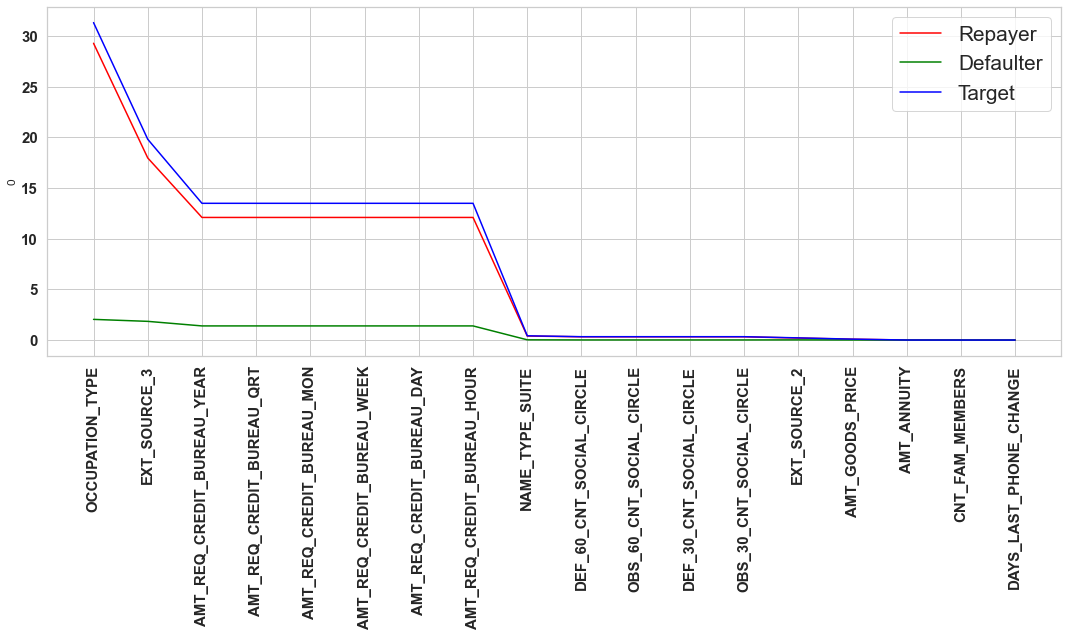

In [47]:
plt.figure(figsize= (15,9))
sns.set_theme(style="whitegrid")
sns.lineplot( x=remaining_nulls.index, y=remaining_nulls[0],markers=True, color ="red", legend = "auto")
sns.lineplot( x=remaining_nulls.index, y=remaining_nulls[1],markers=True, color ="green", legend = "auto")
sns.lineplot( x=remaining_nulls.index, y=remaining_nulls['Total'],markers=True, color ="blue", legend = "auto")

plt.xticks(rotation =90, fontsize  =15, weight = "bold")
plt.yticks( fontsize  =15, weight = "bold")
plt.legend(["Repayer", "Defaulter", "Target"], fontsize = "xx-large")
plt.show()

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>
        <br>
OCCUPATION_TYPE<br>
EXT_SOURCE_3<br>
AMT_REQ_CREDIT_BUREAU_YEAR<br>
AMT_REQ_CREDIT_BUREAU_QRT<br>
AMT_REQ_CREDIT_BUREAU_MON<br>
AMT_REQ_CREDIT_BUREAU_WEEK<br>
AMT_REQ_CREDIT_BUREAU_DAY<br>
AMT_REQ_CREDIT_BUREAU_HOUR<br>
        
- All these columns have high share of missing values in case of defaulter.
- Let's explore them one by one and check how can we impute them.
    </span>    
</div>

### Univariate Analysis for OCCUPATION_TYPE

In [48]:
curr_app.OCCUPATION_TYPE.isnull().sum()

96391

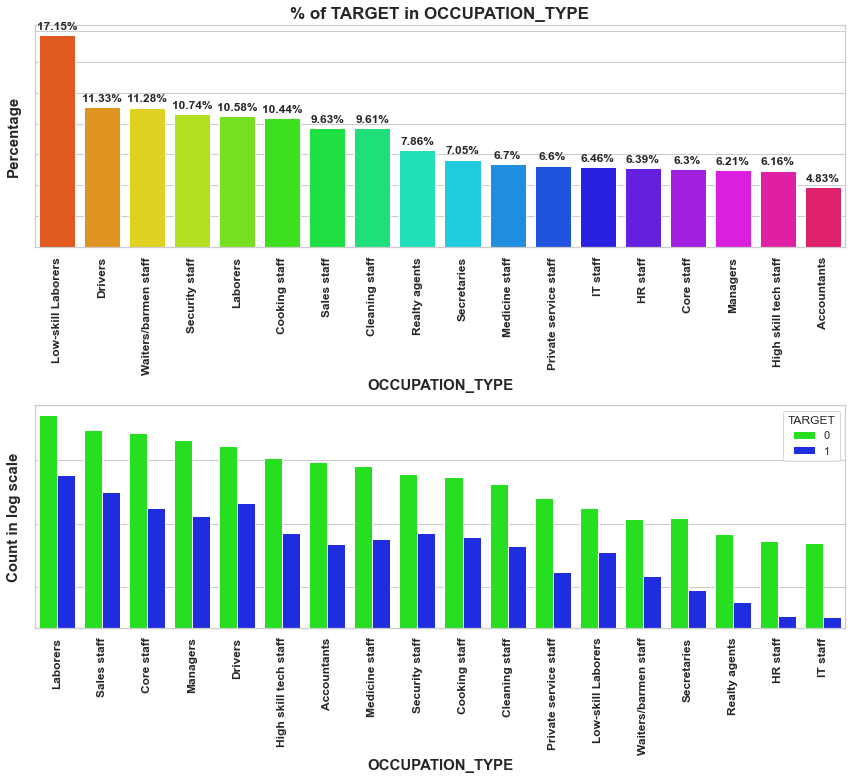

In [49]:
comparison_categorical_plot(curr_app, "TARGET", "OCCUPATION_TYPE", scale_log = True, 
                       y_Ticks_to_rotate = 360, x_Ticks_to_rotate = 90, layout_vert=True, annot_size = 12, fig_size = (12,11) )

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> <br>
            --- If we go by the count, then laboures has taken the most number of loans and then the sales staff.<br>
            --- However, Lowskill labourers, drivers and waiters has more chance of doing default.<br>
    </span>    
</div>

**Every occupation has its own relation of doing default. Hence replacing the null values with mode will bring bias to our dataset.**

**It would be better if make a separtae category for occupation and name it as Unknown occupation.**

In [50]:
curr_app["OCCUPATION_TYPE"].fillna("Unknown", inplace =True)

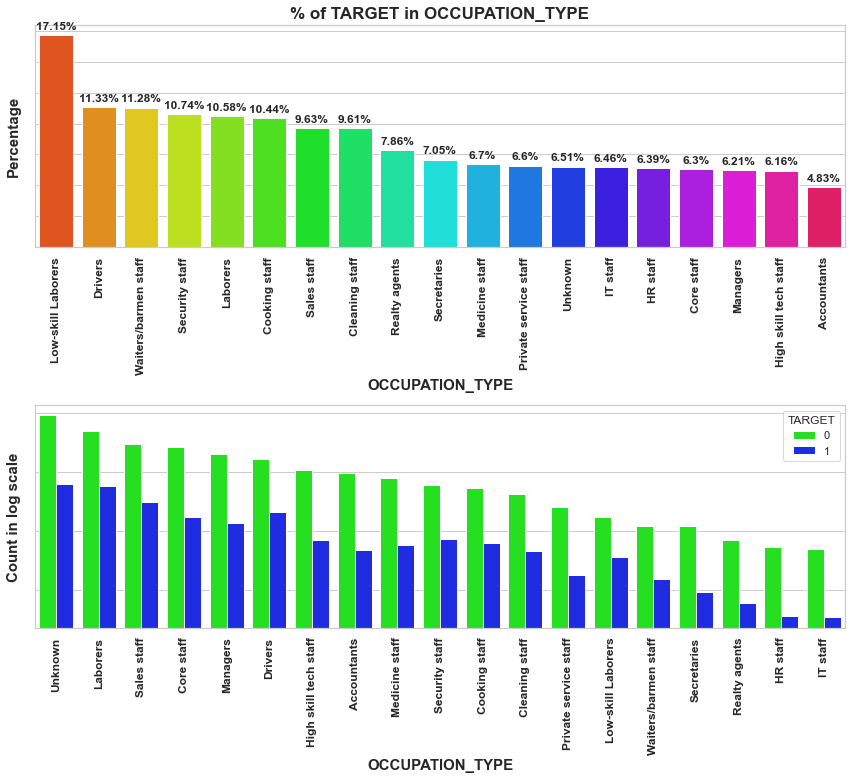

In [51]:
comparison_categorical_plot(curr_app, "TARGET", "OCCUPATION_TYPE", scale_log = True, 
                       y_Ticks_to_rotate = 360, x_Ticks_to_rotate = 90, layout_vert=True, annot_size = 12, fig_size = (12,11) )

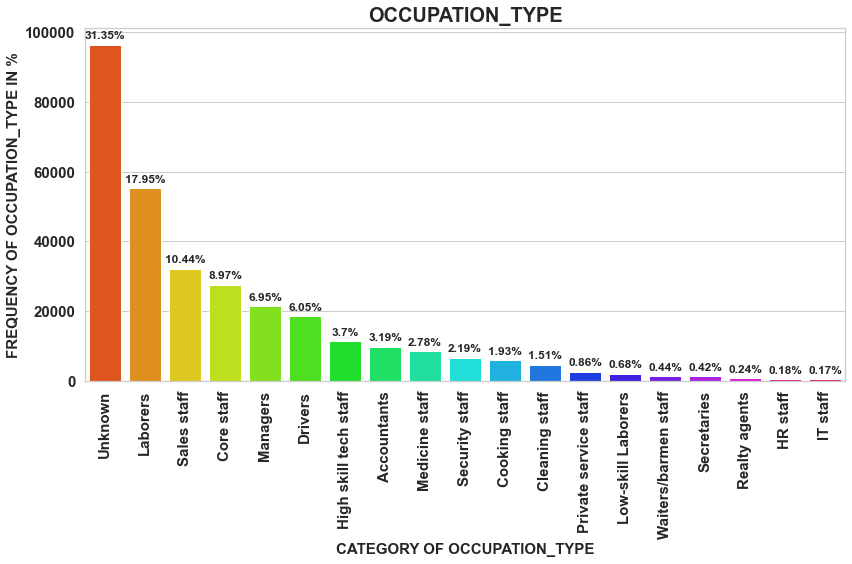

In [52]:
count_plot(curr_app, "OCCUPATION_TYPE", 
           fig_size = (12,8), 
           x_ticks_rotation = 90, 
           annot_size = 12, 
           hz = False,
           ticks_size = 15, 
           label_size = 15, 
           title_size = 20)

               

**Insights:**
- **Unknown category of occupation type has most number of loan applications%.**


### EXT_SOURCE_2 and EXT_SOURCE_3

In [53]:
curr_app_desc.loc[["EXT_SOURCE_2", "EXT_SOURCE_3"],]

Description
Row                                                     
EXT_SOURCE_2  Normalized score from external data source
EXT_SOURCE_3  Normalized score from external data source

In [54]:
curr_app["EXT_SOURCE_3"].isnull().sum()/len(curr_app)*100

19.825307062186393

In [55]:
curr_app["EXT_SOURCE_2"].isnull().sum()/len(curr_app)*100

0.21462646864665005

- **Exit Source 1 has already been dropped due to high % of null values.**
- **Now Exit Source 3 also has 20% null values.**

In [56]:
curr_app[["EXT_SOURCE_2", "EXT_SOURCE_3"]].describe()

EXT_SOURCE_2  EXT_SOURCE_3
count 306851.000000 246546.000000
mean       0.514393      0.510853
std        0.191060      0.194844
min        0.000000      0.000527
25%        0.392457      0.370650
50%        0.565961      0.535276
75%        0.663617      0.669057
max        0.855000      0.896010

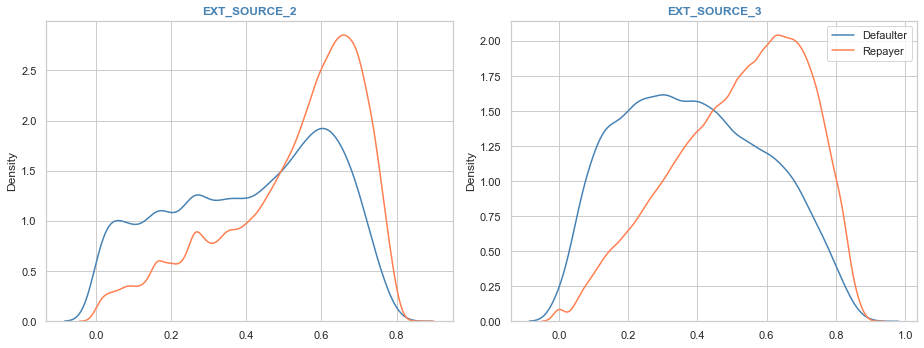

In [57]:
density_plot_comparison_curr_multiple(df = curr_app, column_lst =  ["EXT_SOURCE_2", "EXT_SOURCE_3"], n_rows = 1, n_cols = 2, fig_size= (13,5), title_size = 12)

**Insights**
- **For Ext_source_2, we can said that for repayer and defaulter distribution are left skewed.**
- **Same as the case for Exit_source_3.**
- **Better fill the na values for both the values with MEAN as mean lies before median in left skewed distribution.**

In [58]:
curr_app["EXT_SOURCE_2"].fillna(curr_app["EXT_SOURCE_2"].mean(), inplace =True)
curr_app["EXT_SOURCE_3"].fillna(curr_app["EXT_SOURCE_3"].mean(), inplace =True)

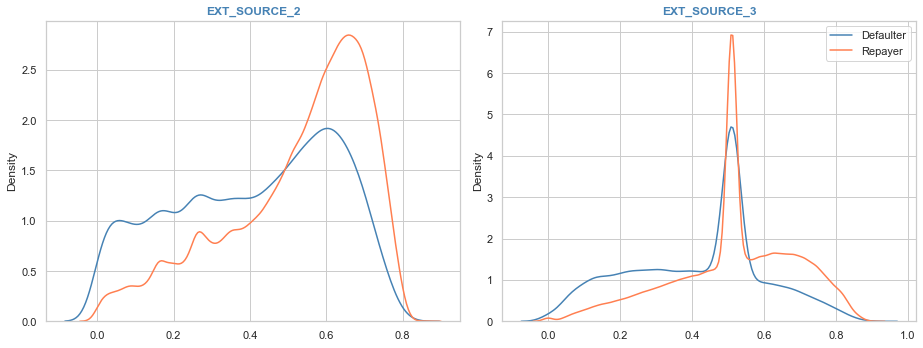

In [59]:
density_plot_comparison_curr_multiple(df = curr_app, column_lst = ["EXT_SOURCE_2", "EXT_SOURCE_3"], n_rows = 1, n_cols = 2, fig_size= (13,5), title_size = 12)

### Let's Strat with 

"AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR" 

In [60]:
cols = ["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON",
"AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR" ]
cols_target = ["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON",
"AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR" , "TARGET"]

In [61]:
curr_app_desc.loc[cols,]

Description
Row                                                                                                                                                   
AMT_REQ_CREDIT_BUREAU_HOUR                                           Number of enquiries to Credit Bureau about the client one hour before application
AMT_REQ_CREDIT_BUREAU_DAY     Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
AMT_REQ_CREDIT_BUREAU_WEEK    Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
AMT_REQ_CREDIT_BUREAU_MON   Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
AMT_REQ_CREDIT_BUREAU_QRT    Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
AMT_REQ_CREDIT_BUREAU_YEAR             Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)

In [62]:
null_count_comparison(curr_app[cols_target], "TARGET")

1         0     Total
AMT_REQ_CREDIT_BUREAU_HOUR 1.395700 12.105900 13.501600
AMT_REQ_CREDIT_BUREAU_DAY  1.395700 12.105900 13.501600
AMT_REQ_CREDIT_BUREAU_WEEK 1.395700 12.105900 13.501600
AMT_REQ_CREDIT_BUREAU_MON  1.395700 12.105900 13.501600
AMT_REQ_CREDIT_BUREAU_QRT  1.395700 12.105900 13.501600
AMT_REQ_CREDIT_BUREAU_YEAR 1.395700 12.105900 13.501600

#### All these columns has 13.5% null values

### Check does they have outliers??

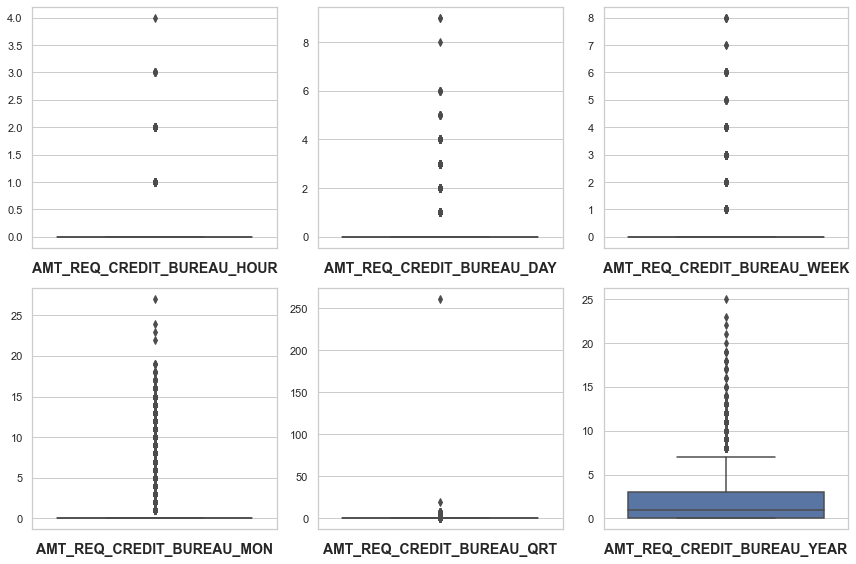

In [63]:
box_plot_check_multiple(curr_app, cols,n_rows = 2, n_cols = 3, x_label_size =14)

### Definately there are outliers as well

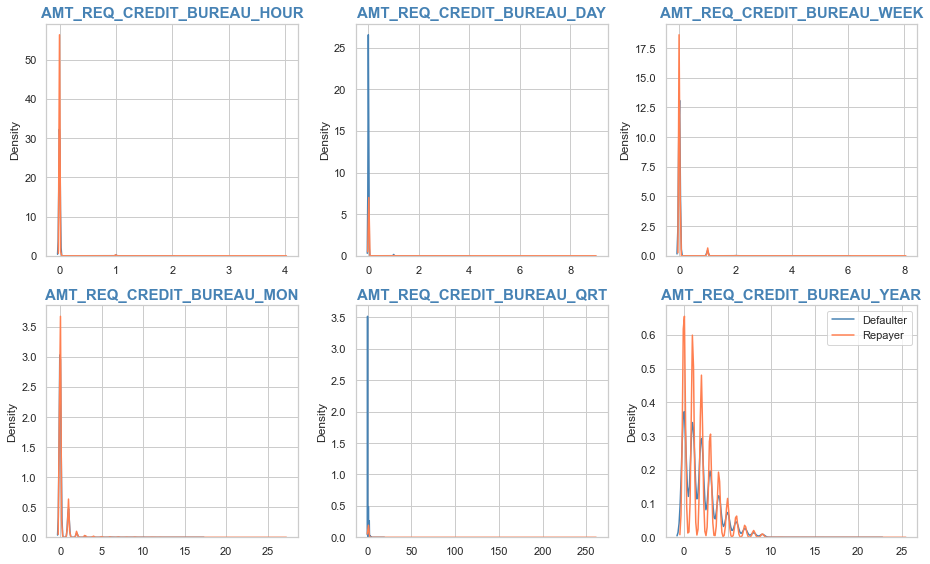

In [64]:
### Let's also check the distribution

density_plot_comparison_curr_multiple(df = curr_app, column_lst = cols, n_rows = 2, n_cols=3, title_size = 15, fig_size= (13,8),)

In [65]:
temp = curr_app[cols].describe()
temp.loc['IQR'] = temp.loc['75%'] - temp.loc['25%']
temp

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   
IQR                      0.000000                   0.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   
IQR                      0.000000                   0.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000  
IQR                     0.000000                    3.000000

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> <br>
            --- All the information about the enquiries to Credit Bureau about the client in different periods has outliers and missing values.<br>
            --- Except AMT_REQ_CREDIT_BUREAU_YEAR, almost all variables about the enquires to credit bureau have high peak over value 0.<br>
            --- Even the iqr value is 0.<br>
            --- As data is normalised, we can't even fix the outliers.<br>   
            --- All these variable share equal proportion of missing values so i decide to keep yearly enquiry column rest drop.
    </span>    
</div>

In [66]:
curr_app.drop(cols, inplace =True, axis =1)

In [67]:
curr_app.shape

(307511, 67)

### check null again

In [68]:
null_count_comparison(curr_app, "TARGET")

1        0    Total
NAME_TYPE_SUITE          0.022800 0.397400 0.420100
OBS_30_CNT_SOCIAL_CIRCLE 0.011700 0.320300 0.332000
DEF_30_CNT_SOCIAL_CIRCLE 0.011700 0.320300 0.332000
OBS_60_CNT_SOCIAL_CIRCLE 0.011700 0.320300 0.332000
DEF_60_CNT_SOCIAL_CIRCLE 0.011700 0.320300 0.332000
AMT_GOODS_PRICE          0.006800 0.083600 0.090400
AMT_ANNUITY              0.000000 0.003900 0.003900
CNT_FAM_MEMBERS          0.000000 0.000700 0.000700
DAYS_LAST_PHONE_CHANGE   0.000000 0.000300 0.000300

### NAME_TYPE_SUITE

In [69]:
curr_app["NAME_TYPE_SUITE"].isnull().sum()

1292

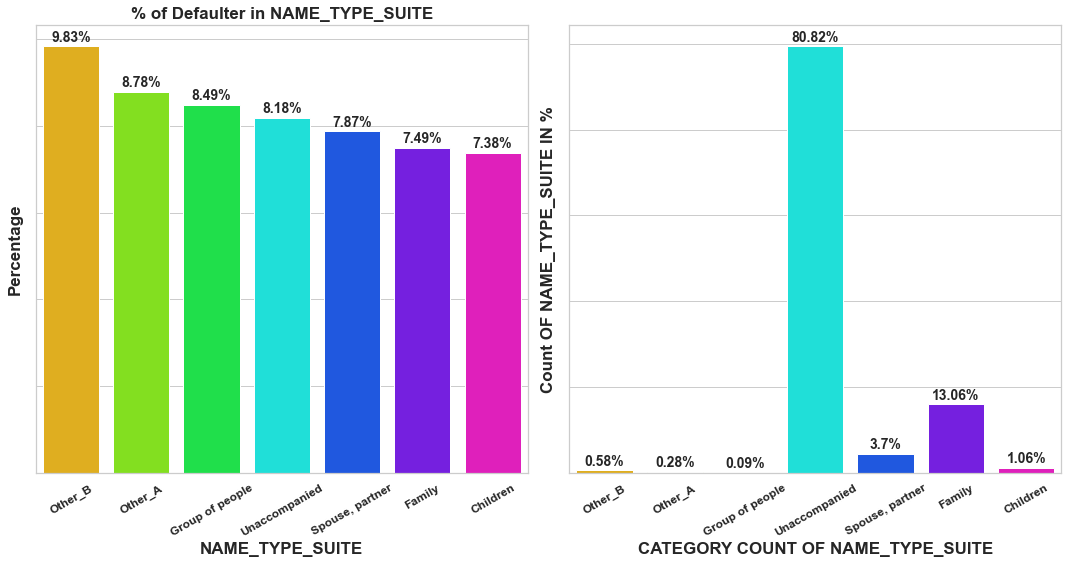

In [70]:
comparison_categorical_count_plot(df = curr_app, target_var = 'TARGET', attribute = "NAME_TYPE_SUITE",
                       y_Ticks_to_rotate = 360, x_Ticks_to_rotate = 30, layout_vert=False, annot_size = 14 , fig_size = (15,8))

**Insights**
- **Clients which did not accopmaine by anyone for taking laon are the ones who have applied for the most loans.**
- **Clients who accompained Other-B, Other-A, Group of People and cvhildren has applied for the least loans.**
- **Such client also has high default rate while comparing to others.**
- **Though who take children and family along with them has less default rate**


In [71]:
### There are some null values in it, lets fill it with the most repetative category.

mod = curr_app.NAME_TYPE_SUITE.mode()[0]
curr_app.NAME_TYPE_SUITE.fillna(mod, inplace =True)
curr_app.NAME_TYPE_SUITE.isnull().sum()

0

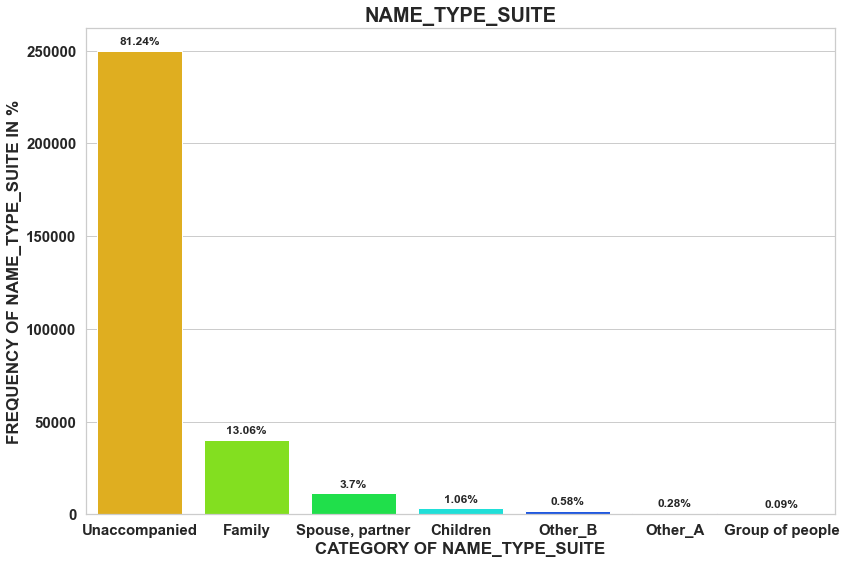

In [72]:
count_plot(df = curr_app, attribute = "NAME_TYPE_SUITE", fig_size = (12,8), x_ticks_rotation = 0, y_ticks_rotation = 0, annot_size = 12, hz =False, 
               ticks_size = 15, label_size = 17, title_size = 20)

#### Unaccoumpained now has incresed to 81.24 %

### Let's also check remaining null columns

In [73]:
null_count_comparison(curr_app, "TARGET")

1        0    Total
OBS_30_CNT_SOCIAL_CIRCLE 0.011700 0.320300 0.332000
DEF_30_CNT_SOCIAL_CIRCLE 0.011700 0.320300 0.332000
OBS_60_CNT_SOCIAL_CIRCLE 0.011700 0.320300 0.332000
DEF_60_CNT_SOCIAL_CIRCLE 0.011700 0.320300 0.332000
AMT_GOODS_PRICE          0.006800 0.083600 0.090400
AMT_ANNUITY              0.000000 0.003900 0.003900
CNT_FAM_MEMBERS          0.000000 0.000700 0.000700
DAYS_LAST_PHONE_CHANGE   0.000000 0.000300 0.000300

### Let's take top 4 columns and check them

In [74]:
to_check = ["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"]



In [75]:
curr_app_desc.loc[to_check]

Description
Row                                                                                                                          
OBS_30_CNT_SOCIAL_CIRCLE  How many observation of client's social surroundings with observable 30 DPD (days past due) default
DEF_30_CNT_SOCIAL_CIRCLE            How many observation of client's social surroundings defaulted on 30 DPD (days past due) 
OBS_60_CNT_SOCIAL_CIRCLE  How many observation of client's social surroundings with observable 60 DPD (days past due) default
DEF_60_CNT_SOCIAL_CIRCLE             How many observation of client's social surroundings defaulted on 60 (days past due) DPD

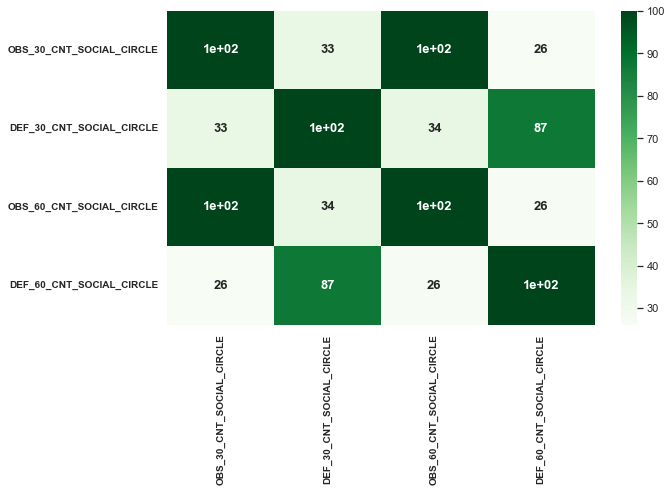

In [76]:
corr_map_multiple( df= curr_app[curr_app["TARGET"] == 1], col_name = to_check, fig_size = (10,7), ticks_font_size = 10, c_map = "Greens" )

**Insights**
- **With the given heatmap, a strange relationship has came out and to check it we did compare the distribution and found that obs_30 and obs_60 are 98% same and same was the case with def_30 and def_60, they are 95% same.**


In [77]:
(curr_app.OBS_30_CNT_SOCIAL_CIRCLE == curr_app.OBS_60_CNT_SOCIAL_CIRCLE).sum()/len(curr_app)*100

98.02836321302327

In [78]:
(curr_app.DEF_30_CNT_SOCIAL_CIRCLE == curr_app.DEF_60_CNT_SOCIAL_CIRCLE).sum()/len(curr_app)*100

95.79917466367057

- **It would be better to keep any one of them.**
- **Let's drop the def_30 and obs_30**

In [79]:
curr_app.drop(["OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE"], inplace  =True, axis =1)
curr_app.shape

(307511, 65)

### Let's draw the Density plot and check the distribution for remaining two

In [80]:
to_check =  [
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

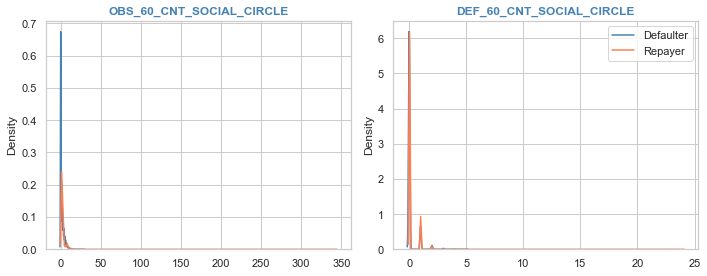

In [81]:
density_plot_comparison_curr_multiple(df = curr_app, column_lst = to_check, n_rows = 1, n_cols = 2, fig_size= (10,4), title_size = 12)

**Insights**
- **Extremely right skewed, lets fill na values with mode as values are less too and defaulters are also at mode side.**

#### LET'S FILL THE NA VALUES WITH MODE

In [82]:
mod = curr_app.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0]
curr_app.DEF_60_CNT_SOCIAL_CIRCLE.fillna(mod, inplace =True)
curr_app.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [83]:
mod = curr_app.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0]
curr_app.OBS_60_CNT_SOCIAL_CIRCLE.fillna(mod, inplace =True)
curr_app.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

### As there are outliers as well in OBS_60_CNT_SOCIAL_CIRCLE, let's cap it with the the 99th percentile value.

In [84]:
cap_value = np.percentile(curr_app.OBS_60_CNT_SOCIAL_CIRCLE,99)
cap_value

10.0

In [85]:
curr_app.OBS_60_CNT_SOCIAL_CIRCLE[curr_app.OBS_60_CNT_SOCIAL_CIRCLE>cap_value] = cap_value

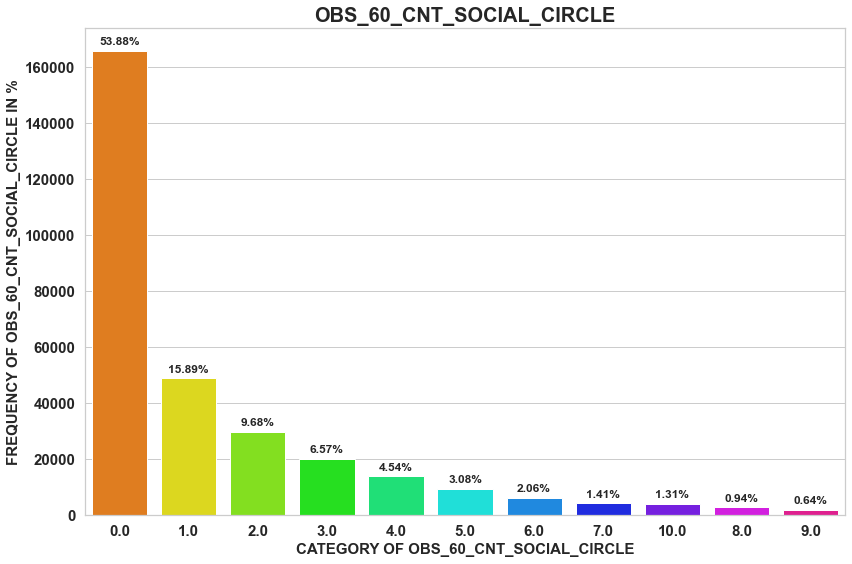

In [86]:
count_plot(df = curr_app, attribute = "OBS_60_CNT_SOCIAL_CIRCLE", fig_size = (12,8), x_ticks_rotation = 0, y_ticks_rotation = 0, annot_size = 12, hz =False, 
               ticks_size = 15, label_size = 15, title_size = 20)

#### As there are outliers as well in DEF_60_CNT_SOCIAL_CIRCLE, let's cap it with the the 99th percentile value.

In [87]:
cap_value = np.percentile(curr_app.DEF_60_CNT_SOCIAL_CIRCLE,99.9)

cap_value

3.0

In [88]:
curr_app.DEF_60_CNT_SOCIAL_CIRCLE[curr_app.DEF_60_CNT_SOCIAL_CIRCLE>cap_value] = cap_value

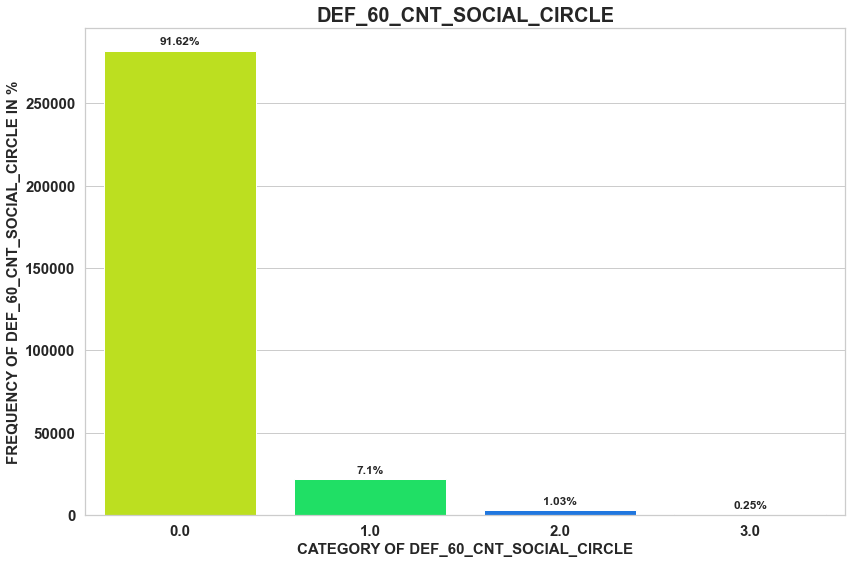

In [89]:
count_plot(df = curr_app, attribute = "DEF_60_CNT_SOCIAL_CIRCLE", fig_size = (12,8), x_ticks_rotation = 0, y_ticks_rotation = 0, annot_size = 12, hz =False, 
               ticks_size = 15, label_size = 15, title_size = 20)

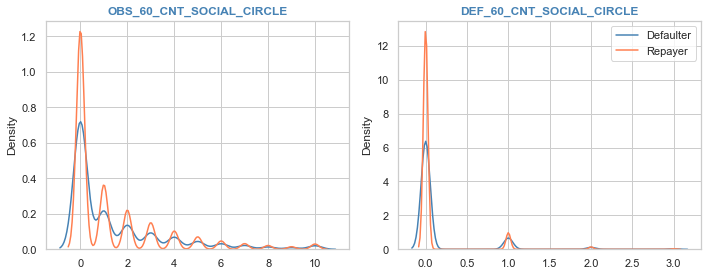

In [90]:
density_plot_comparison_curr_multiple(df = curr_app, column_lst = to_check, n_rows = 1, n_cols = 2, fig_size= (10,4), title_size = 12)

**Insights**
- **Definately an overall improvement in both the distribution with presence of true outliers.**

### check null count again.

In [91]:
null_count_comparison(curr_app, "TARGET")

1        0    Total
AMT_GOODS_PRICE        0.006800 0.083600 0.090400
AMT_ANNUITY            0.000000 0.003900 0.003900
CNT_FAM_MEMBERS        0.000000 0.000700 0.000700
DAYS_LAST_PHONE_CHANGE 0.000000 0.000300 0.000300

### AMT_GOODS_PRICE

In [92]:
TEMP = curr_app[["AMT_GOODS_PRICE", "TARGET"]][curr_app["AMT_GOODS_PRICE"].isnull()]
round(null_count_comparison(TEMP, "TARGET")*TEMP.shape[0]/100, 0)

0         1      Total
AMT_GOODS_PRICE 257.000000 21.000000 278.000000

### We cant drop rows as 21 rows are those which have default cases. Let's Impute it.

In [93]:
curr_app["AMT_GOODS_PRICE"].describe()

count    307233.000000
mean     538396.207429
std      369446.460540
min       40500.000000
25%      238500.000000
50%      450000.000000
75%      679500.000000
max     4050000.000000
Name: AMT_GOODS_PRICE, dtype: float64

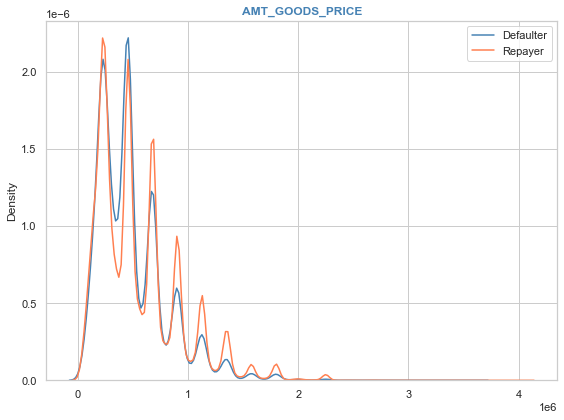

In [94]:
density_plot_comparison_curr_multiple(df = curr_app, column_lst = ["AMT_GOODS_PRICE"], n_rows = 1, n_cols = 1, fig_size= (8,6), title_size = 12)

**Insights**
- **AMT_GOODS_PRICE has outliers and null values as well.**
- **Before treating outliers we have to fill null values.**
- **It is rightly skewed, Thus we can fill null values with the median**

In [95]:
med = curr_app.AMT_GOODS_PRICE.median()
curr_app.AMT_GOODS_PRICE.fillna(med, inplace =True)
curr_app.AMT_GOODS_PRICE.isnull().sum()

0

In [96]:
### lets cap the extreme values with 99.97%.
val = np.percentile(curr_app.AMT_GOODS_PRICE, 99.97 )
val

2254500.0

In [97]:
(curr_app.AMT_GOODS_PRICE > val).sum()


73

In [98]:
curr_app.AMT_GOODS_PRICE[curr_app.AMT_GOODS_PRICE > val] = val

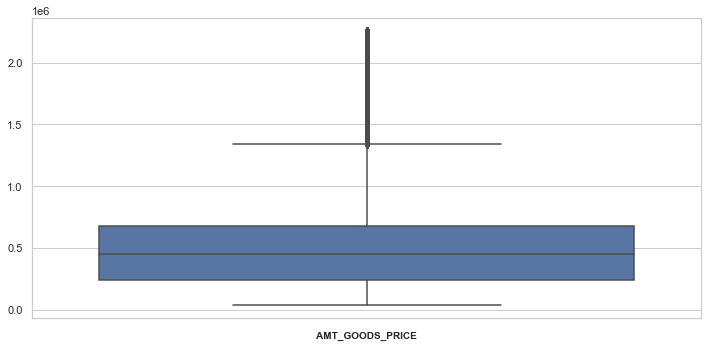

In [99]:
box_plot_check_multiple(df = curr_app,
    column_lst = ["AMT_GOODS_PRICE"],
    n_rows=1,
    n_cols=1,
    x_label_size=10, x_tick_rotation = 0,y_tick_rotation = 0, fig_size = (10, 5))


### Now it looks soughted with true outliers.

In [100]:
nn = null_count_comparison(curr_app, "TARGET")
nn

1        0    Total
AMT_ANNUITY            0.000000 0.003900 0.003900
CNT_FAM_MEMBERS        0.000000 0.000700 0.000700
DAYS_LAST_PHONE_CHANGE 0.000000 0.000300 0.000300

**Insights**
- **Now if you could see that in these 3 columns, there are very low null values and on top of it, they are fully associated with repayers.**
- **Hence we can drop these rows.**

In [101]:
curr_app = curr_app[~curr_app.AMT_ANNUITY.isnull()]
curr_app = curr_app[~curr_app.CNT_FAM_MEMBERS.isnull()]
curr_app = curr_app[~curr_app.DAYS_LAST_PHONE_CHANGE.isnull()]

In [102]:
curr_app.shape

(307496, 65)

#### No More null in our data set


In [103]:
null_count_comparison(curr_app, "TARGET")

Empty DataFrame
Columns: [1, 0, Total]
Index: []

### Check XAP or XAN values in dataset by defining a function

In [104]:
def check_xna_xap(df):
    xna_lst = []
    for i in df.columns:
        for j in df[i]:
            if ( (j == 'XNA') or (j == 'XAP')):
                xna_lst.append(i)
    return list(set(xna_lst))

In [105]:
xx = check_xna_xap(curr_app)
xx

['CODE_GENDER', 'ORGANIZATION_TYPE']

In [106]:
curr_app_desc.loc[xx]

Description
Row                                                       
CODE_GENDER                           Gender of the client
ORGANIZATION_TYPE  Type of organization where client works

### CODE_GENDER

In [107]:
curr_app["CODE_GENDER"].value_counts()

F      202439
M      105053
XNA         4
Name: CODE_GENDER, dtype: int64

### Replace it with the "F" as mostly are female

In [108]:
curr_app["CODE_GENDER"].replace("XNA", 'F', inplace =True)

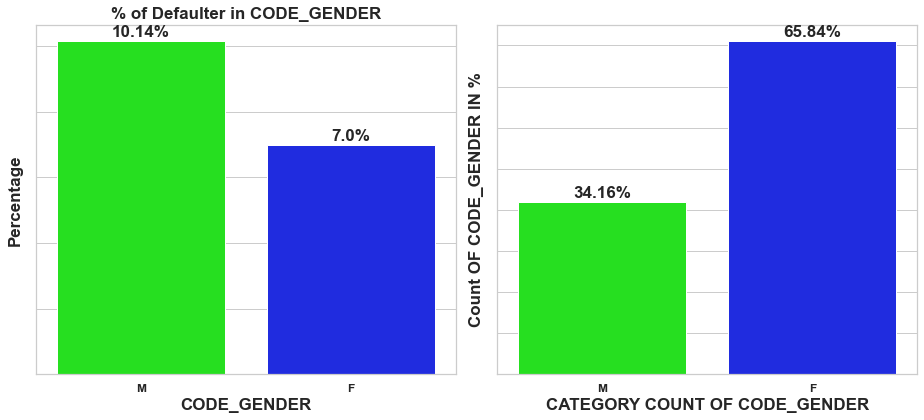

In [109]:
comparison_categorical_count_plot(df = curr_app, target_var = "TARGET", attribute = "CODE_GENDER", scale_log = False, 
                       y_Ticks_to_rotate = 360, x_Ticks_to_rotate = 360, layout_vert=False, annot_size = 17, fig_size=(13, 6) )


**Insights**
- **The given information tells that 66% loans are taken from female and 34% loans are taken male.**
- **However male client's are more prone to default.**

### ORGANIZATION_TYPE

In [110]:
curr_app.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67989
XNA                       55374
Self-employed             38409
Other                     16681
Medicine                  11192
Business Entity Type 2    10552
Government                10403
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3491
Industry: type 9           3368
Industry: type 3           3278
Security                   3246
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

### Let's check does the occupation type and gender has any associativity with the Organization Type for otherS and XNA

In [111]:
temp1 = curr_app[(curr_app["ORGANIZATION_TYPE"] == 'XNA')]
temp2 = curr_app[(curr_app["ORGANIZATION_TYPE"] == 'Other')]
final_temp = pd.concat([temp1,temp2], axis =0)
pd.pivot_table(data = final_temp, index = ["ORGANIZATION_TYPE","OCCUPATION_TYPE"], columns = ["CODE_GENDER"], aggfunc = "count").iloc[:,0:2]

AMT_ANNUITY             
CODE_GENDER                                        F            M
ORGANIZATION_TYPE OCCUPATION_TYPE                                
Other             Accountants             723.000000    15.000000
                  Cleaning staff          442.000000    36.000000
                  Cooking staff           361.000000    20.000000
                  Core staff              607.000000   122.000000
                  Drivers                  72.000000   874.000000
                  HR staff                 40.000000     3.000000
                  High skill tech staff   517.000000   266.000000
                  IT staff                 17.000000    31.000000
                  Laborers               1116.000000  1899.000000
                  Low-skill Laborers       25.000000    90.000000
                  Managers                821.000000   508.000000
                  Medicine staff          982.000000    52.000000
                  Private service staff   121.000000    17.000000
                  Realty agents            41.000000     6.000000
                  Sales staff             814.000000   109.000000
                  Secretaries             131.000000     5.000000
                  Security staff          202.000000   323.000000
                  Unknown                3691.000000  1501.000000
                  Waiters/barmen staff     71.000000    10.000000
XNA               Cleaning staff            2.000000          NaN
                  Unknown               45269.000000 10103.000000

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>
-- It is evident that xna organisation type is aslo not known for occupation type.<br>
-- Hence it is not possible to impute with any others.<br>
-- Better to keep it as separate category and name it "Unknown".**<br>
    </span>    
</div>







In [112]:
curr_app["ORGANIZATION_TYPE"].replace("XNA", 'Unknown', inplace =True)

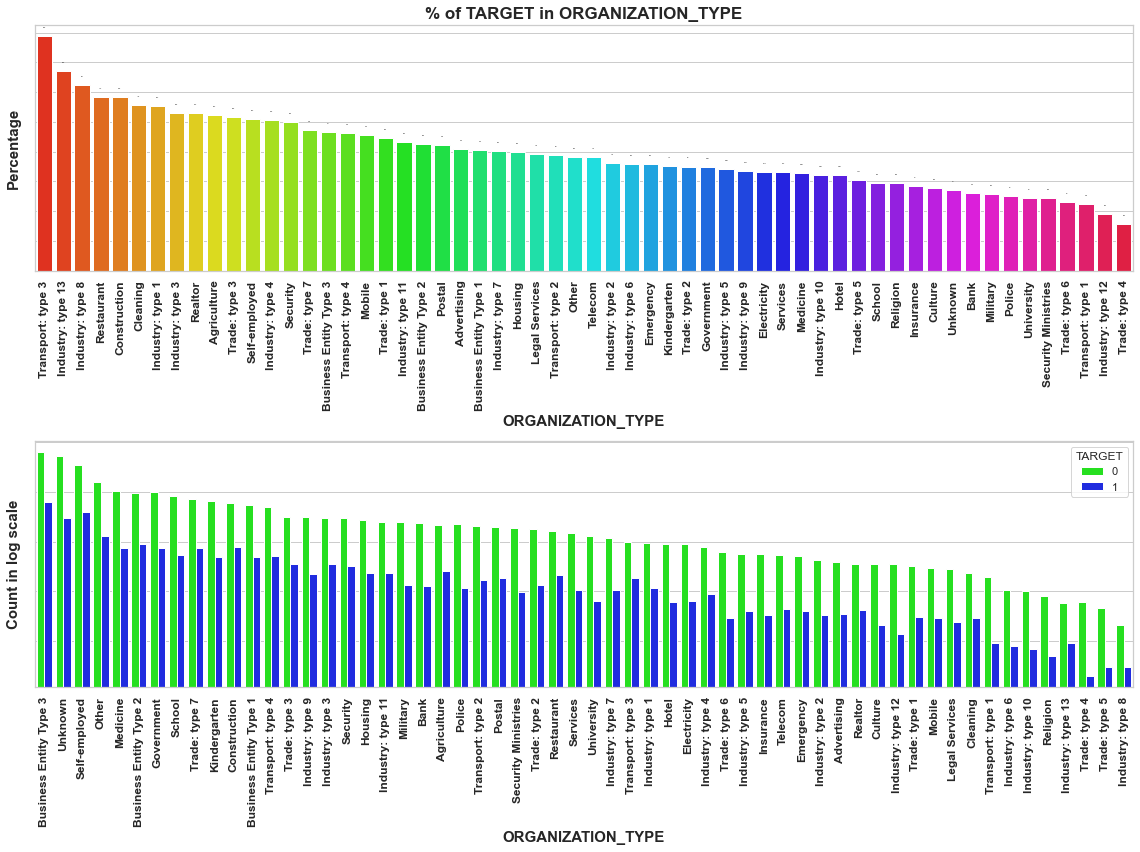

In [113]:
comparison_categorical_plot( df = curr_app,
    target_var = "TARGET",
    attribute = "ORGANIZATION_TYPE",
    y_Ticks_to_rotate=360,
    x_Ticks_to_rotate=90,
     scale_log=True,
    annot_size=0,
    fig_size=(16, 12),
    layout_vert=True,                 
    palettes  ="hsv"
                                )

**Insights**
- **Transport type 3 and industry type 13 are most prone to default.**
- **Whereas Industry type 4 and Trade Type 4 are least prone to default.**
- **However Business entity Type 3 has applied for most loans and industry type 8 has applied for least loans.**

### No more columns with XAP and XAN values

In [114]:
check_xna_xap(curr_app)

[]

In [115]:
curr_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_C

### Let's Take all the flag_documets columns

In [116]:
flag_docs = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
             'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9', 
             'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
             'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
             'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [117]:
len(flag_docs)

20

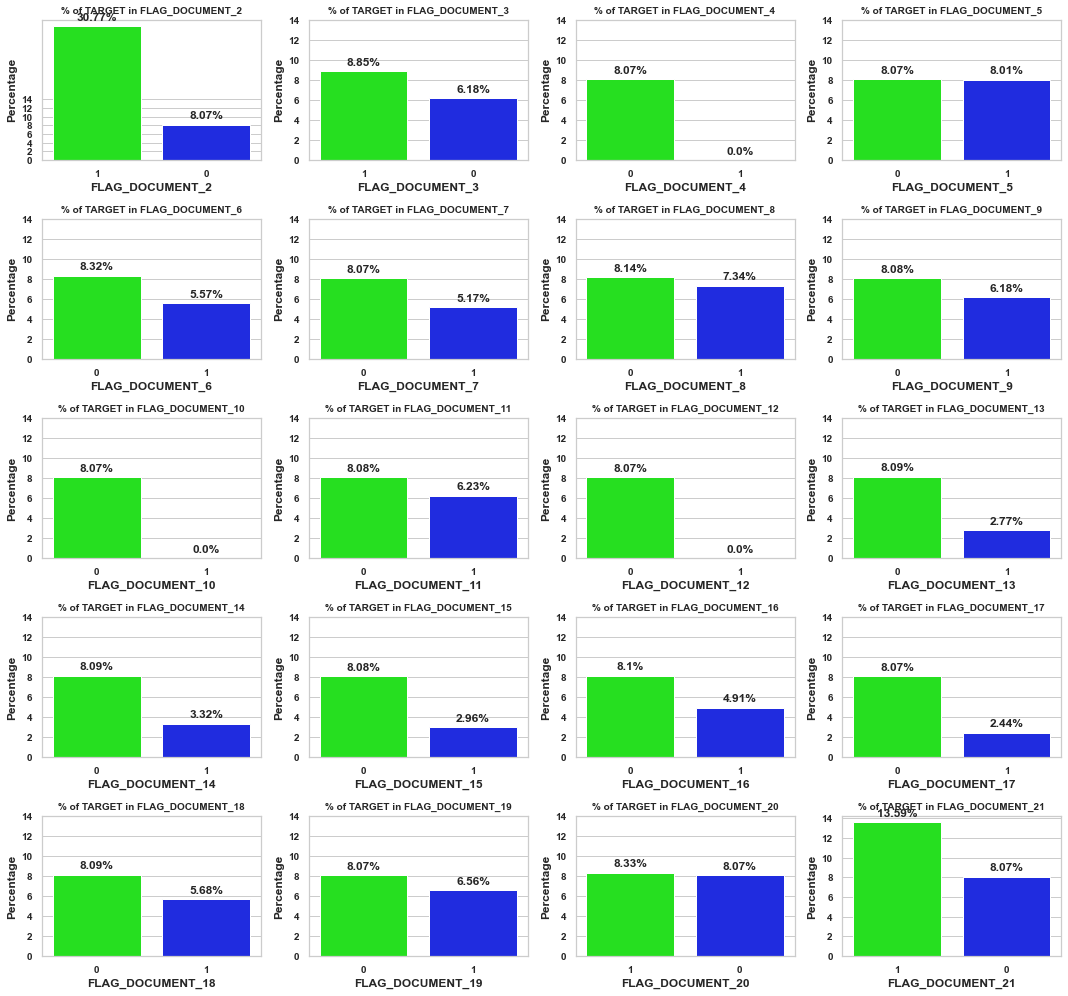

In [118]:
comparison_categorical_single_multiple(df  =curr_app, 
                                           target_var = "TARGET", 
                                           column_lst = flag_docs, 
                                           n_rows = 5, 
                                           n_cols = 4,
                                           fig_size = (15,14),
                                           y_Ticks_to_rotate = 360, 
                                           x_Ticks_to_rotate = 360,  
                                           tick_size = 10,
                                           annot_size = 12,
                                           title_size =10, 
                                           label_size =12 )

**Insights**
- **'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_10' and 'FLAG_DOCUMENT_12' have no associativity with the default rate.**
- **Though all other flag_documents has some associativty of being default**
- **For us even a small percatge which may lead to default is crucial.**
- **Hence we would keep all the rest flag documents columns and will drop these 3 columns**

In [119]:
flag_del = ['FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12']

In [120]:
curr_app.drop(flag_del, inplace =True, axis =1)
curr_app.shape

(307496, 62)

### Let's take all flag columns related to contact details.

In [121]:
Flag_contact_details =  [ "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL"]

In [122]:
len(Flag_contact_details)

6

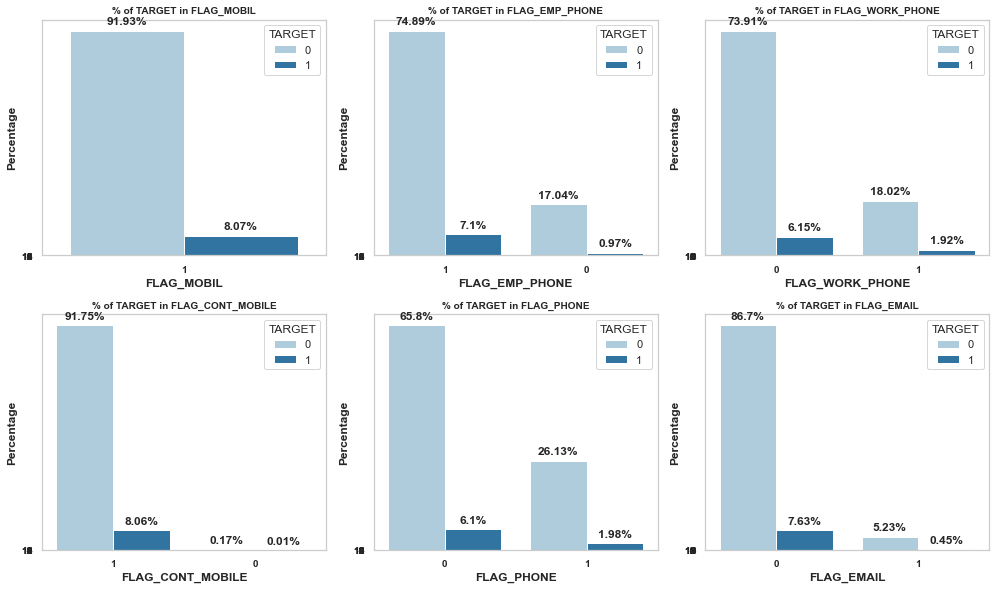

In [125]:
Multiple_countplot( df = curr_app,
    target_var  ="TARGET",
    column_lst = Flag_contact_details,
    n_rows=3,
    n_cols=3,
    fig_size=(14, 12),
    y_Ticks_to_rotate=360,
    x_Ticks_to_rotate=360,
    tick_size=10,
    annot_size=12,
    title_size=10,
    label_size=12,
)

**Insights**
- **The given graph depicts that every client has provided his phone number, So keeping it will not serve any purpose. Thus we can drop it.**
- **With it we can also drop flag_cont_mobile as almost every client phone was reachable and in case if for few client phone was not reachable then those clients have not even default.**

In [126]:
curr_app.drop(["FLAG_MOBIL","FLAG_CONT_MOBILE"], inplace =True, axis =1)
curr_app.shape

(307496, 60)

### Hour and week related columns

In [127]:
curr_app["WEEKDAY_APPR_PROCESS_START"].value_counts()

TUESDAY      53901
WEDNESDAY    51928
MONDAY       50713
THURSDAY     50590
FRIDAY       50333
SATURDAY     33850
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

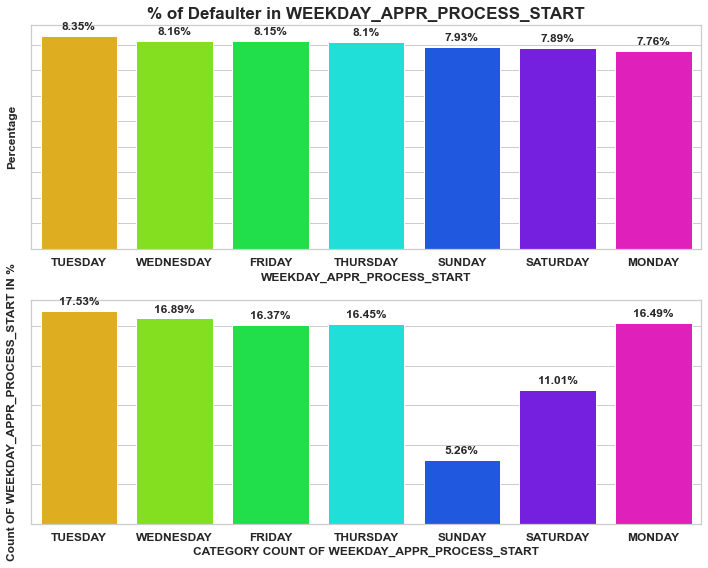

In [128]:
comparison_categorical_count_plot(df = curr_app, attribute = "WEEKDAY_APPR_PROCESS_START", target_var = "TARGET",
                                  scale_log=False,
                                y_Ticks_to_rotate=360,
                                x_Ticks_to_rotate=360,
                                layout_vert=True,
                                annot_size=12,
                                fig_size=(10, 8),
                                palettes='hsv',
                                label_size = 12
                            )


**Insights**
- **On Tuesday maximum number of loan applications are filled.**
- **On Saturday and sunday least number of loan applications are filled as these are weekends as well**
- **Almost all days share same probability to default.**
- **However Tuesday are more prone to default cases whereas Monday are less prone to default case**

### HOUR_APPR_PROCESS_START

In [129]:
curr_app["HOUR_APPR_PROCESS_START"].value_counts()

10    37722
11    37227
12    34232
13    30955
14    27680
9     27384
15    24834
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1195
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64



<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>
- A loan can be applied in any hour of a day and keeping a note of very hour would not serve the purpose of knowing what are the peak hours of loans application
        <br>
- Better bin it
    </span>    
</div>

In [130]:
def bin_time(x):
    
    midnight = [0,1,2,3]
    early_morning = [4,5,6,7]
    mid_morning = [8,9,10,11]
    noon = [12,13,14,15]
    early_evening  = [16,17,18,19]
    late_evening = [20,21,22,23]
    
    if x in midnight:
        return "Mid-Night"
    elif x in early_morning:
        return "Early-Morning"
    elif x in mid_morning:
        return "Mid-Morning"
    elif x in noon:
        return "Noon"
    elif x in early_evening:
        return "Early Evening"
    else:
        return "Late Evening"
    
curr_app["HOUR_APPR_PROCESS_START"] = curr_app["HOUR_APPR_PROCESS_START"].apply(bin_time)

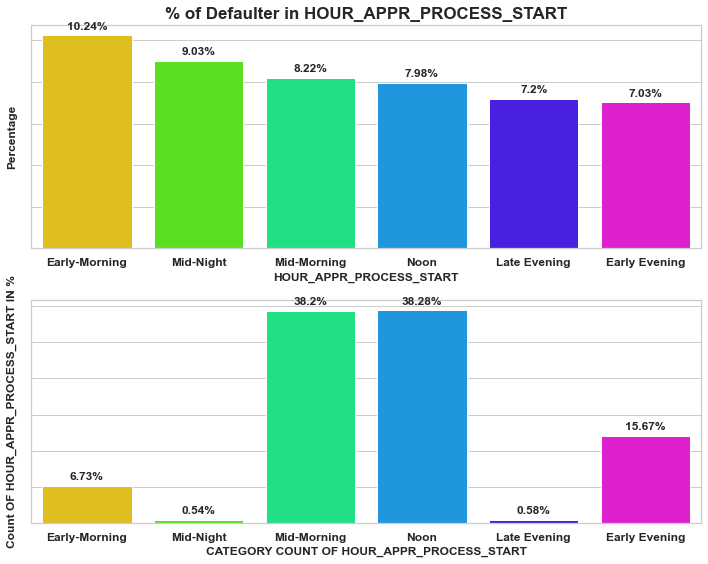

In [131]:
comparison_categorical_count_plot(df = curr_app, attribute = "HOUR_APPR_PROCESS_START", target_var = "TARGET",
                                  scale_log=False,
                                y_Ticks_to_rotate=360,
                                x_Ticks_to_rotate=360,
                                layout_vert=True,
                                annot_size=12,
                                fig_size=(10, 8),
                                palettes='hsv',
                                label_size = 12
                            )

**Insights**

- **With the given graph we can say that Most of the clients apply loans at first half of the day.**
- **And to be precise in collectively 76% people apply loan at Mid Morning and at Noon hours.**
- **Clients who apply loans at Earning Morning are more prone to default.**
- **Whereas clienst who apply at late early evening are less prone to default.**

### Region related cols

In [132]:
reg_city_cols =  ["REG_CITY_NOT_LIVE_CITY",
                  "REG_CITY_NOT_WORK_CITY",
                  "LIVE_CITY_NOT_WORK_CITY",
                  "REG_REGION_NOT_LIVE_REGION",
                  "REG_REGION_NOT_WORK_REGION",
                  "LIVE_REGION_NOT_WORK_REGION"
                ]

In [133]:
curr_app_desc.loc[reg_city_cols]

Description
Row                                                                                                                                  
REG_CITY_NOT_LIVE_CITY         Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)
REG_CITY_NOT_WORK_CITY            Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
LIVE_CITY_NOT_WORK_CITY             Flag if client's contact address does not match work address (1=different, 0=same, at city level)
REG_REGION_NOT_LIVE_REGION   Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
REG_REGION_NOT_WORK_REGION      Flag if client's permanent address does not match work address (1=different, 0=same, at region level)
LIVE_REGION_NOT_WORK_REGION       Flag if client's contact address does not match work address (1=different, 0=same, at region level)

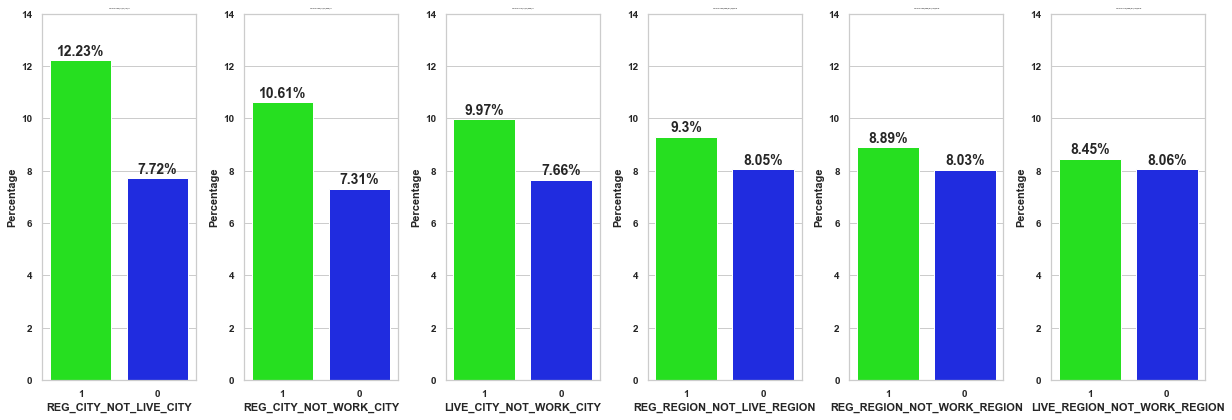

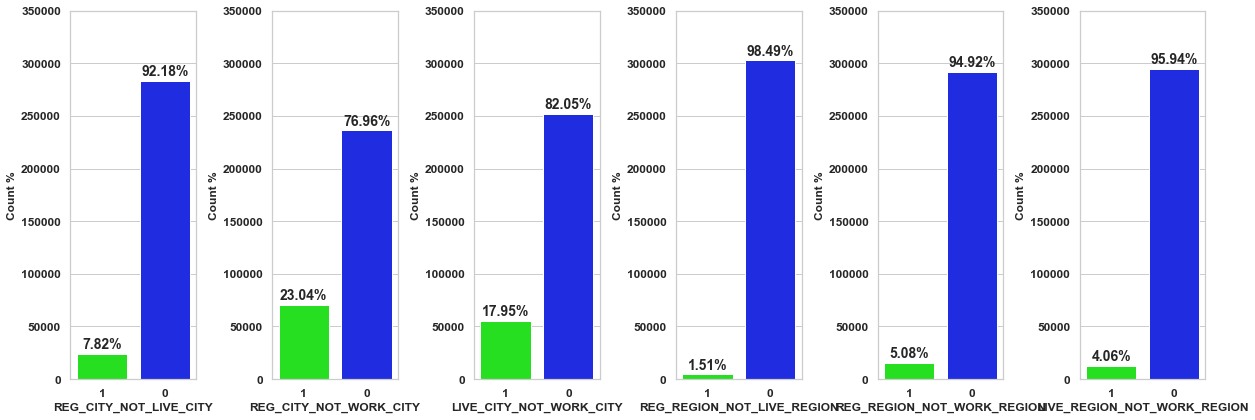

In [134]:
comparison_categorical_single_multiple(    df = curr_app, 
                                           target_var = "TARGET", 
                                           column_lst = reg_city_cols, 
                                           n_rows = 1, 
                                           n_cols = 6,
                                           fig_size = (17,6),
                                           y_Ticks_to_rotate = 360, 
                                           x_Ticks_to_rotate = 360,  
                                           tick_size = 10,
                                           annot_size = 14,
                                           title_size =0, 
                                           label_size =11 
                                      )
count_plot_multiple1(    df = curr_app, 
                        column_lst = reg_city_cols, 
                        fig_size = (17,6),
                        n_rows = 1, 
                        n_cols = 6,
                        x_ticks_rotation = 360, 
                        y_ticks_rotation = 360, 
                        tick_size = 10,
                        annot_size = 14,
                        title_size = 0, 
                        label_size =12 )

**Insights**
- **The proportions of permanent address and contact that does not match is high at city level while comparing to the rigion level.**
- **Moreover, if the addreess doesnt match then they are also more prone to defaulter cases at city level comparing to region level.**

### Days Related cols 

In [135]:
days_cols = ['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
len(days_cols)

4

In [136]:
curr_app_desc.loc[days_cols,:]

Description
Row                                                                                                                               
DAYS_BIRTH                                                                         Client's age in days at the time of application
DAYS_EMPLOYED                                           How many days before the application the person started current employment
DAYS_REGISTRATION                                          How many days before the application did client change his registration
DAYS_ID_PUBLISH    How many days before the application did client change the identity document with which he applied for the loan

#### DAYS_BIRTH

In [137]:
curr_app["DAYS_BIRTH"]

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307496, dtype: int64

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>
- The given age is negative in number.
        <br>
- We also need to change it to in years.
        <br>
- We will also try to create bins for age.
    </span>    
</div>


In [138]:
def change_days(x):
    x = abs(x//365)
    return x

curr_app["DAYS_BIRTH"]= curr_app["DAYS_BIRTH"].apply(change_days)

In [139]:
curr_app["DAYS_BIRTH"] = pd.cut(x=curr_app["DAYS_BIRTH"], 
                                bins=np.arange(20, 77, 6), 
                                labels=['20-26', '27-32', '33-38', '39-44', '45-50', '51-56', '57-62', '63-68','69-74'], 
                                right=False) 

In [140]:
curr_app["DAYS_BIRTH"].value_counts()

39-44    51723
33-38    48039
45-50    44624
51-56    41579
27-32    40676
57-62    39346
63-68    26436
20-26    12157
69-74     2916
Name: DAYS_BIRTH, dtype: int64

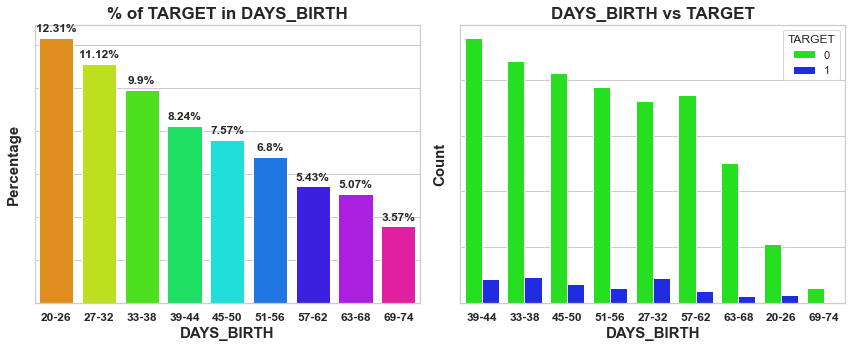

In [141]:
comparison_categorical_plot(df = curr_app, target_var = 'TARGET', attribute = "DAYS_BIRTH", scale_log = False, 
                       y_Ticks_to_rotate = 360, x_Ticks_to_rotate = 360, layout_vert=False, annot_size = 12,  palettes = "hsv", fig_size=(12, 5) )


**Insights**
- **Client's at age between 39-44 has applied the most numbe of LOANS**
- **Moreover their probabilty of getting default is 7.5%, which is not that good but also not bad.**

- **Clients at age between 20-26 have applied for second least loans, though their prob of doing default is high.**
- **Clients whose age is 69-44 has applied most least loans, Though they are least prone to default.**

In [142]:
### Let's do the same for all three days columns

In [143]:
curr_app["DAYS_EMPLOYED"] = curr_app["DAYS_EMPLOYED"].apply(change_days)
curr_app["DAYS_REGISTRATION"] = curr_app["DAYS_REGISTRATION"].apply(change_days)
curr_app["DAYS_ID_PUBLISH"] = curr_app["DAYS_ID_PUBLISH"].apply(change_days)

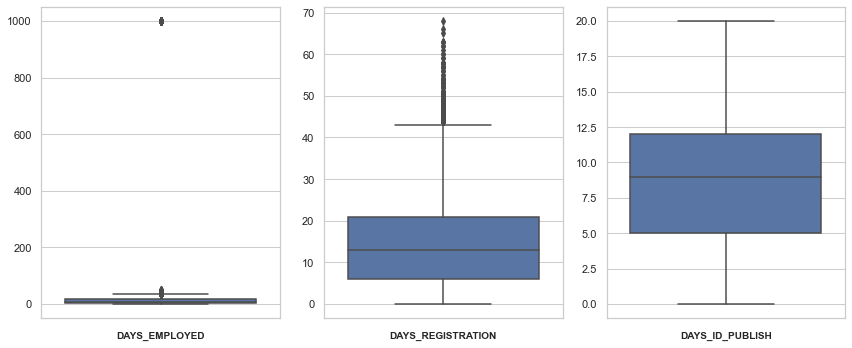

In [144]:
days = ["DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]
box_plot_check_multiple(df = curr_app, 
                        column_lst =days, n_rows = 1, n_cols = 3, 
                        x_label_size =10, 
                        fig_size = (12,5))

### Days employed and days_registaraion has the outliers

In [145]:
curr_app[["DAYS_EMPLOYED", "DAYS_REGISTRATION"]].describe()

DAYS_EMPLOYED  DAYS_REGISTRATION
count  307496.000000      307496.000000
mean      185.848261          14.165742
std       381.596141           9.647089
min         0.000000           0.000000
25%         3.000000           6.000000
50%         7.000000          13.000000
75%        16.000000          21.000000
max      1000.000000          68.000000

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Inferences: </b> 
        <br>
- Clearly it is evident that there is a misleading 1000 value becuase any perosn cannot be emoployed f0r 1000 years.
        <br>
- Let's draw a density plot for all the data points other than 1000.
    </span>    
</div>


In [146]:
temp = curr_app["DAYS_EMPLOYED"][curr_app["DAYS_EMPLOYED"]!=1000]

In [147]:
temp.describe()

count   252122.000000
mean         7.034678
std          6.415953
min          0.000000
25%          3.000000
50%          5.000000
75%          9.000000
max         50.000000
Name: DAYS_EMPLOYED, dtype: float64

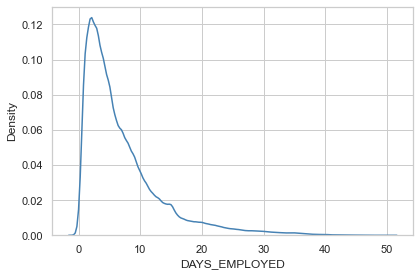

In [148]:
sns.distplot(temp, hist=False, color='steelblue')
plt.show()

**Insights**

- **The distribution looks good now with some true outliers. As these are true outliers**
- **Let's impute all the values which are 1000 with median**

In [149]:
curr_app["DAYS_EMPLOYED"].replace(1000, int(temp.median()), inplace = True)

In [150]:
curr_app["DAYS_EMPLOYED"].describe()

count   307496.000000
mean         6.668272
std          5.861978
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         50.000000
Name: DAYS_EMPLOYED, dtype: float64

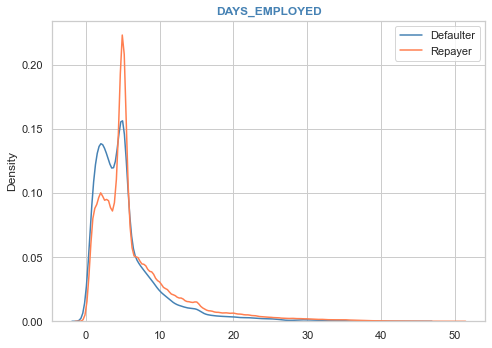

In [151]:
density_plot_comparison_curr_multiple(df = curr_app, column_lst = ["DAYS_EMPLOYED"], n_rows = 1, n_cols = 1, fig_size= (7,5), title_size = 12)

In [152]:
curr_app["DAYS_EMPLOYED"] = pd.cut(x=curr_app["DAYS_EMPLOYED"], 
                                bins=[0,5,10,15,20,25,51], 
                                labels=['0-5', '6-10', '11-15', '16-20', '21-25','26-51'], 
                                right=False)

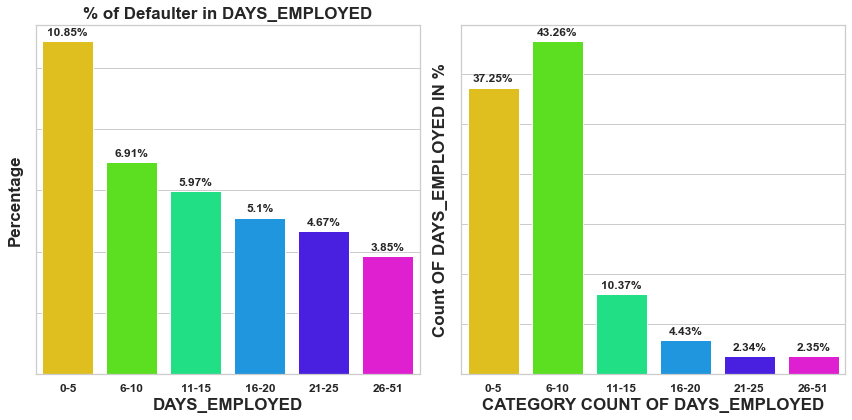

In [153]:
comparison_categorical_count_plot(df = curr_app, target_var = 'TARGET', attribute = "DAYS_EMPLOYED", scale_log = False, 
                       y_Ticks_to_rotate = 360, x_Ticks_to_rotate = 360, layout_vert=False, annot_size = 12 , fig_size = (12, 6))

**Insights**
- **Client's WHO ARE EMPLOYED FOR 6-10 YEARS AND FOLLOWED BY 0-5 YEARS HAS COLLECTIVELY AAPLIED FOR 80 OF LOANS%**
- **Clients whose job employed years is in 0-5 years are mostly prone to default**
- **As the years of work experience increases loans are required less for those applicants and even the default ratio also increases**

#### Day's Registration

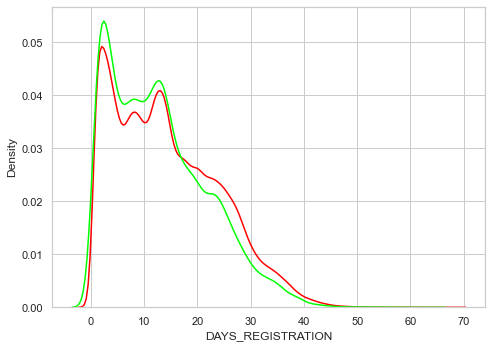

In [154]:
temp_0 = curr_app["DAYS_REGISTRATION"][curr_app["TARGET"] == 0]
temp_1 = curr_app["DAYS_REGISTRATION"][curr_app["TARGET"] == 1]

plt.figure(figsize = (7,5))
sns.distplot(temp_0, hist = False, color ="red" )
sns.distplot(temp_1, hist = False, color ="lime")
plt.show()


### Let's create a bin of it as well


In [155]:
curr_app["DAYS_REGISTRATION"] = pd.cut(x=curr_app["DAYS_REGISTRATION"], 
                                bins=[ 0,  6, 12, 18, 24, 30, 40, 70], 
                                labels=['0-6', '7-12', '13-18', '19-24', '25-30', '31-40', '41-70'], 
                                right=False) 


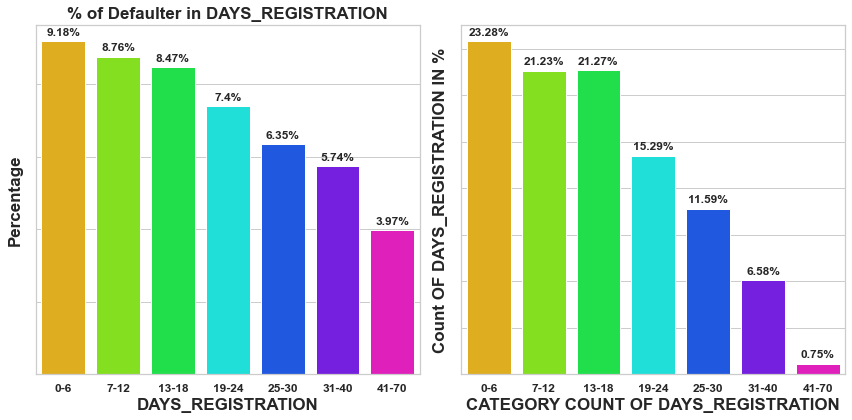

In [156]:
comparison_categorical_count_plot(df = curr_app, target_var = 'TARGET', attribute = "DAYS_REGISTRATION", scale_log = False, 
                       y_Ticks_to_rotate = 360, x_Ticks_to_rotate = 360, layout_vert=False, annot_size = 12,  fig_size = (12, 6))

**Insights**

- **Out of total applications, 23% of clients have changed the registation 0-6 years followed by 7-12 years.**
- **As the years of registartion increases default ratio also decreases.**

### DAYS_ID_PUBLISH

In [157]:
curr_app["DAYS_ID_PUBLISH"] = pd.cut(x=curr_app["DAYS_ID_PUBLISH"], 
                                bins=[ 0,  5, 10, 15, 20], 
                                labels=['0-5', '6-10', '11-15', '16-20'], 
                                right=False) 

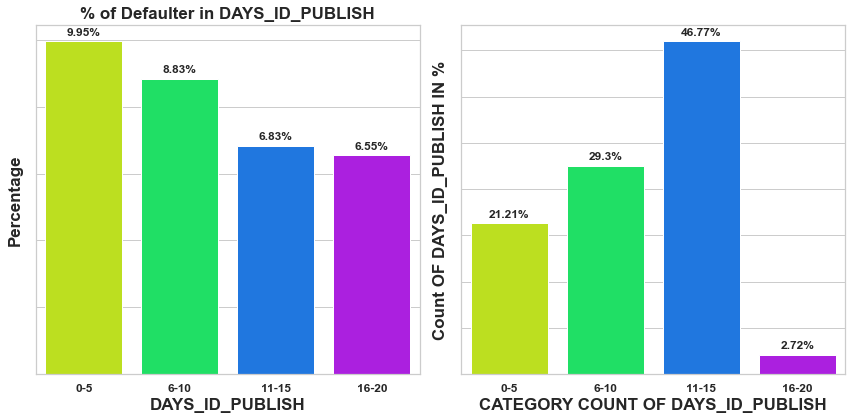

In [158]:
comparison_categorical_count_plot(df = curr_app, target_var = 'TARGET', attribute = "DAYS_ID_PUBLISH", scale_log = False, 
                       y_Ticks_to_rotate = 360, x_Ticks_to_rotate = 360, layout_vert=False, annot_size = 12, fig_size = (12,6) )

**Insights**

- **Out of all the client's clients who changes his document 11-15 times are highest and lowest id for 16-20 times.**
- **However such clients are not prone to defualt when compare to clients who change their identity documents 0-5 times.** 
- **Their probability of defaulting is 10% whereas for 11-15 times category it is 7%.**

### Let's change the column names from days to year.

In [159]:
curr_app.rename(columns = {"DAYS_BIRTH":"YEARS_BIRTH", 
                           "DAYS_EMPLOYED":"YEARS_EMPLOYED", 
                           "DAYS_REGISTRATION":"YEARS_REGISTRATION", 
                           "DAYS_ID_PUBLISH":"YEARS_ID_PUBLISH"}, inplace = True)

In [160]:
curr_app.shape

(307496, 60)

### Count Familly related cols

In [161]:
members_cols = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']
len(members_cols)

2

In [162]:
curr_app_desc.loc[members_cols,:]

Description
Row                                                      
CNT_CHILDREN            Number of children the client has
CNT_FAM_MEMBERS  How many family members does client have

### CNT_CHILDREN

In [163]:
curr_app.CNT_CHILDREN.value_counts()

0     215356
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

**It would be better if we bin the count of children above 4 in one group as they are less in numbers and may affect the predictive model further.**

In [164]:
def make_bin(x):
    if x>3:
        return "4 and above children"
    else:
        return str(x) + " children" 
    
curr_app.CNT_CHILDREN = curr_app.CNT_CHILDREN.apply(make_bin)

In [165]:
curr_app.CNT_CHILDREN.value_counts()

0 children              215356
1 children               61119
2 children               26749
3 children                3717
4 and above children       555
Name: CNT_CHILDREN, dtype: int64

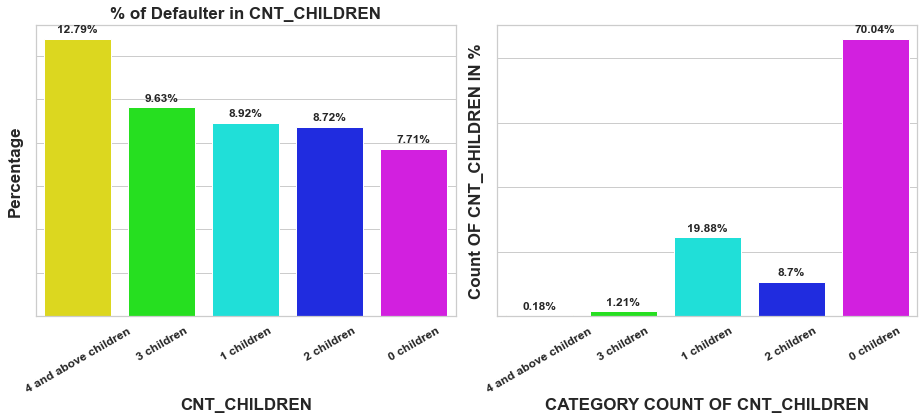

In [166]:
comparison_categorical_count_plot(df = curr_app, target_var = 'TARGET', attribute = "CNT_CHILDREN", scale_log = True, 
                       y_Ticks_to_rotate = 360, x_Ticks_to_rotate = 30, layout_vert=False, annot_size = 12, fig_size = (13,6) )

**Insights**
- **Client's which have zero children has applied for the most loans and on top of it they have less default rate.**
- **3 and above children have applied for least loans and to the given information they have high default case**

### CNT_FAM_MEMBERS

In [167]:
curr_app["CNT_FAM_MEMBERS"]

0        1.000000
1        2.000000
2        1.000000
3        2.000000
4        1.000000
           ...   
307506   1.000000
307507   1.000000
307508   1.000000
307509   2.000000
307510   2.000000
Name: CNT_FAM_MEMBERS, Length: 307496, dtype: float64

### let's also make a bin for the count of family members.

In [168]:
def make_members_bin(x):
    if x>5:
        return "6 members and above"
    else:
        return str(int(x)) + " members" 
curr_app.CNT_FAM_MEMBERS = curr_app.CNT_FAM_MEMBERS.apply(make_members_bin)

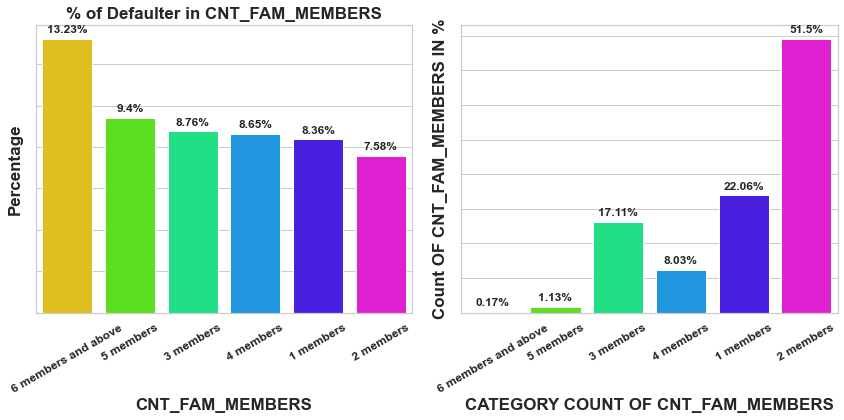

In [169]:
comparison_categorical_count_plot(df = curr_app, target_var = 'TARGET', attribute = "CNT_FAM_MEMBERS", scale_log = True, 
                       y_Ticks_to_rotate = 360, x_Ticks_to_rotate = 30, layout_vert=False, annot_size = 12, fig_size = (12,6) )

**Insights**
- **Clients with 2 family members has applied for the maximum loans and they also have less default rate.**
- **Clients having family members above 6 have worst default rate comparing to other family member groups**

### Amount Related cols 

In [170]:
amt_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
len(amt_cols)

4

In [171]:
curr_app_desc.loc[amt_cols,:]

Description
Row                                                                                          
AMT_INCOME_TOTAL                                                         Income of the client
AMT_CREDIT                                                          Credit amount of the loan
AMT_ANNUITY                                                                      Loan annuity
AMT_GOODS_PRICE   For consumer loans it is the price of the goods for which the loan is given

### let's check if there are any outliers

In [172]:
curr_app[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]].describe()

AMT_INCOME_TOTAL     AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE
count     307496.000000  307496.000000 307496.000000    307496.000000
mean      168796.348443  599028.133909  27108.549241    538147.639309
std       237127.963961  402494.185718  14493.802393    368236.500305
min        25650.000000   45000.000000   1615.500000     40500.000000
25%       112500.000000  270000.000000  16524.000000    238500.000000
50%       146904.750000  513531.000000  24903.000000    450000.000000
75%       202500.000000  808650.000000  34596.000000    679500.000000
max    117000000.000000 4050000.000000 258025.500000   2254500.000000

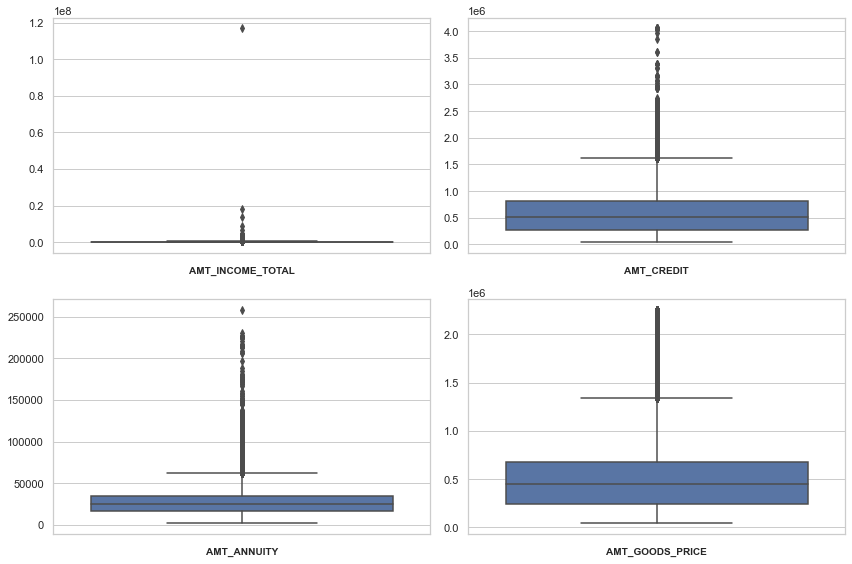

In [173]:
box_plot_check_multiple(df =curr_app, column_lst = amt_cols, n_rows = 2, n_cols = 2, x_label_size =10, fig_size = (12,8))

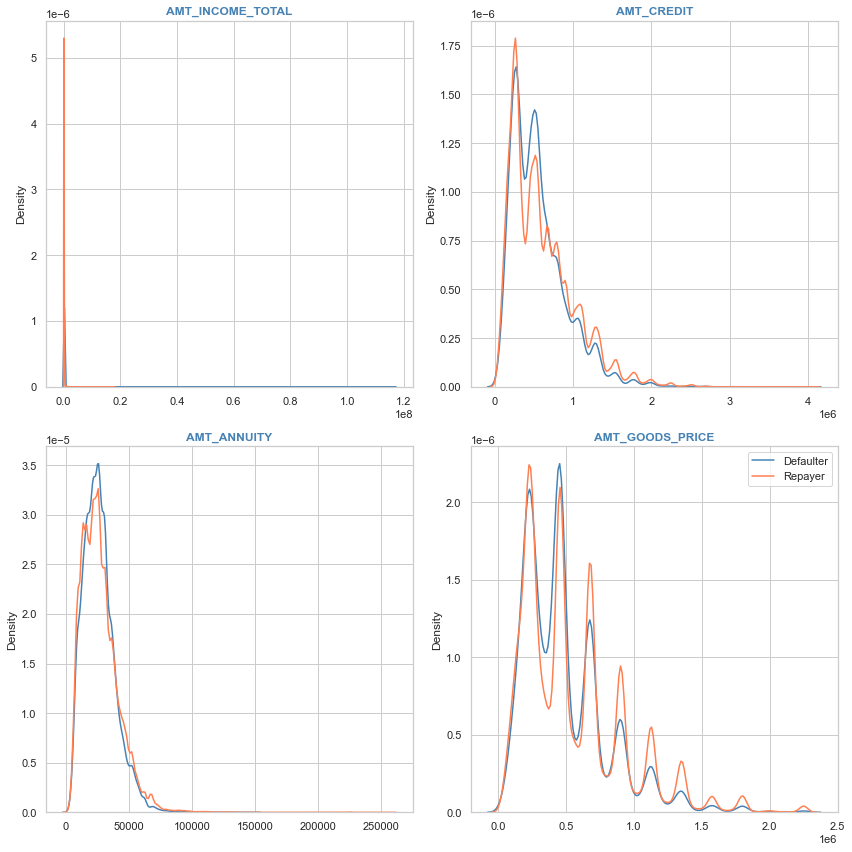

In [174]:

density_plot_comparison_curr_multiple(df = curr_app, column_lst = amt_cols, n_rows = 2, n_cols = 2, fig_size= (12,12), title_size = 12)

### Let's cap the extreme values of AMT_INCOME_TOTAL with 99.9 percentile value. 

In [175]:
curr_app.AMT_INCOME_TOTAL.describe()

count      307496.000000
mean       168796.348443
std        237127.963961
min         25650.000000
25%        112500.000000
50%        146904.750000
75%        202500.000000
max     117000000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [176]:
aa = np.percentile(curr_app.AMT_INCOME_TOTAL, 99.9)
aa

900000.0

In [177]:
curr_app.AMT_INCOME_TOTAL[curr_app.AMT_INCOME_TOTAL  > aa] = aa

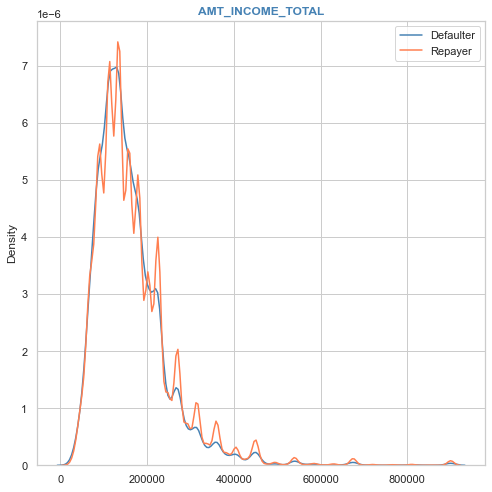

In [178]:
density_plot_comparison_curr_multiple(df = curr_app,  column_lst =["AMT_INCOME_TOTAL"], n_rows = 1, n_cols = 1, fig_size= (7,7), title_size = 12)

### Let's cap the extreme values of AMT_CREDIT with 99.9 percentile value. 

In [179]:
curr_app.AMT_CREDIT.describe()

count    307496.000000
mean     599028.133909
std      402494.185718
min       45000.000000
25%      270000.000000
50%      513531.000000
75%      808650.000000
max     4050000.000000
Name: AMT_CREDIT, dtype: float64

In [180]:
aa = np.percentile(curr_app.AMT_CREDIT, 99.9)
aa

2517300.0

In [181]:
### Let's cap it to 99.9 percentie
(curr_app.AMT_CREDIT  > aa).sum()

134

In [182]:
curr_app.AMT_CREDIT[curr_app.AMT_CREDIT  > aa] = aa


In [183]:
curr_app.AMT_CREDIT.describe()

count    307496.000000
mean     598859.788066
std      401518.233984
min       45000.000000
25%      270000.000000
50%      513531.000000
75%      808650.000000
max     2517300.000000
Name: AMT_CREDIT, dtype: float64

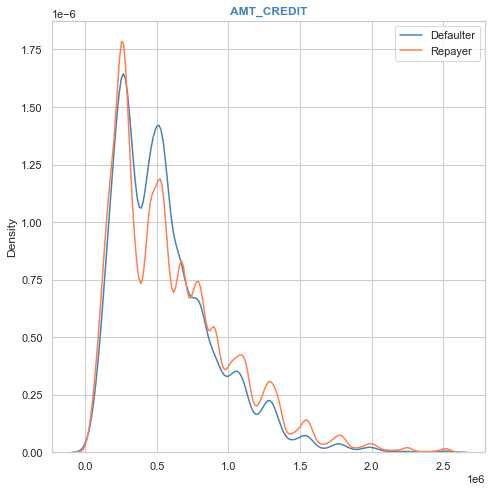

In [184]:
density_plot_comparison_curr_multiple(df = curr_app,  column_lst =["AMT_CREDIT"], n_rows = 1, n_cols = 1, fig_size= (7,7), title_size = 12)

### Let's cap the extreme values of AMT_ANNUITY with 99.9 percentile value. 

In [185]:
curr_app.AMT_ANNUITY.describe()

count   307496.000000
mean     27108.549241
std      14493.802393
min       1615.500000
25%      16524.000000
50%      24903.000000
75%      34596.000000
max     258025.500000
Name: AMT_ANNUITY, dtype: float64

In [186]:
aa = np.percentile(curr_app.AMT_ANNUITY, 99.9)
aa

110047.5

In [187]:
(curr_app.AMT_ANNUITY  > aa).sum()

306

In [188]:
curr_app.AMT_ANNUITY[curr_app.AMT_ANNUITY  > aa] = aa


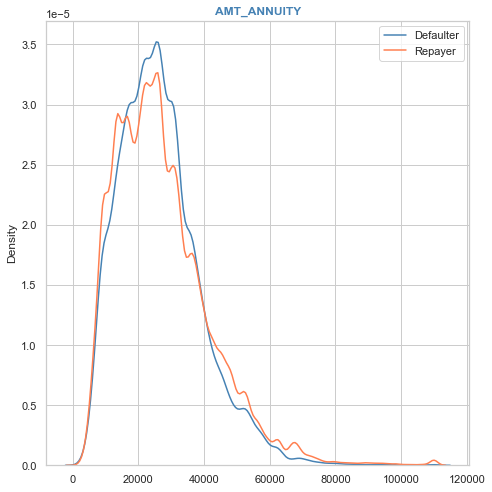

In [189]:
density_plot_comparison_curr_multiple(df = curr_app,  column_lst =["AMT_ANNUITY"], n_rows = 1, n_cols = 1, fig_size= (7,7), title_size = 12)

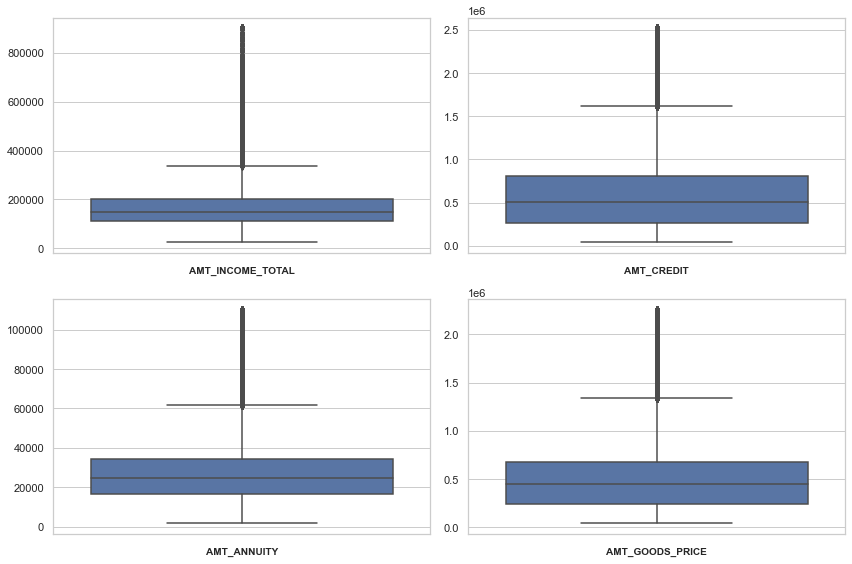

In [190]:
box_plot_check_multiple(df =curr_app, column_lst = amt_cols, n_rows = 2, n_cols = 2, x_label_size =10, fig_size = (12,8))


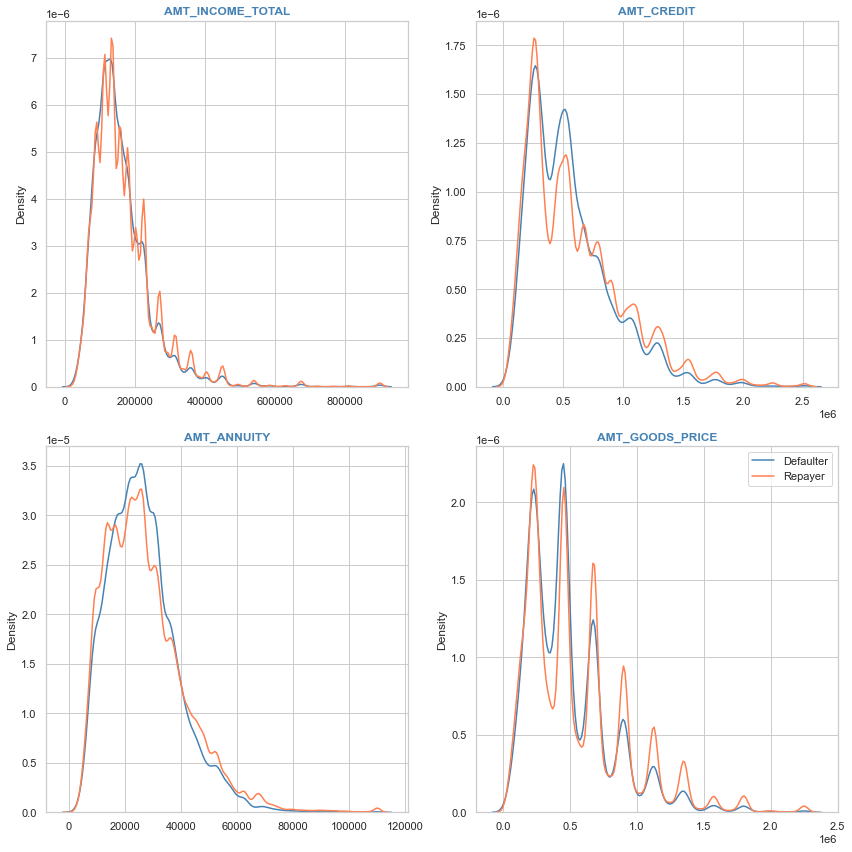

In [191]:
density_plot_comparison_curr_multiple(df = curr_app, column_lst = amt_cols, n_rows = 2, n_cols = 2, fig_size= (12,12), title_size = 12)

**Insights**
- **With the given tretmeant we can said that only true outliers have been there all extreme outlers are removed.**
- **On top of it, distributions keeps the shape as it were.**

### Let's find a correlation among them.

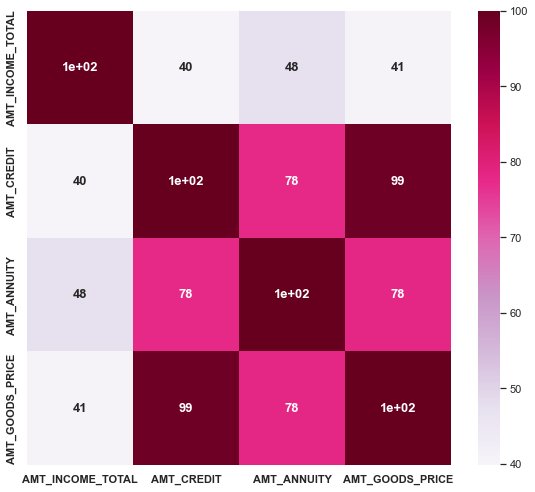

In [192]:
corr_map_multiple( curr_app[curr_app["TARGET"]==0], amt_cols, fig_size = (8,7), ticks_font_size = 11, c_map = "PuRd")

- **amt_credit and amt_annuity -78**
- **amt_goods_price and amt_annuity - 78**
- **amt_goods_price and amt_credit - 99**

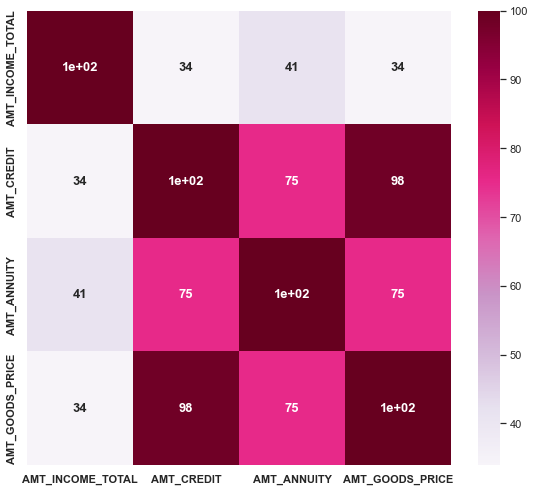

In [193]:
corr_map_multiple( curr_app[curr_app["TARGET"]==1], amt_cols, fig_size = (8,7), ticks_font_size = 11, c_map = "PuRd")

**Insights**
- **amt_credit and amt_annuity -75**
- **amt_goods_price and amt_annuity - 75**
- **amt_goods_price and amt_credit - 98**
<br>
- **Other than Income, amt_credit, amt_goods_price and amt_annuity has good correlation.**
- **Though amt_goods_price and amt_annuity has strong possitive relationship.**
- **The given scenario is same for repayer and defaulter.**

### LETS CREATE A PAIR PLOT TO REPRESENT THE RELATIONSHIP.

<Figure size 1296x504 with 0 Axes>

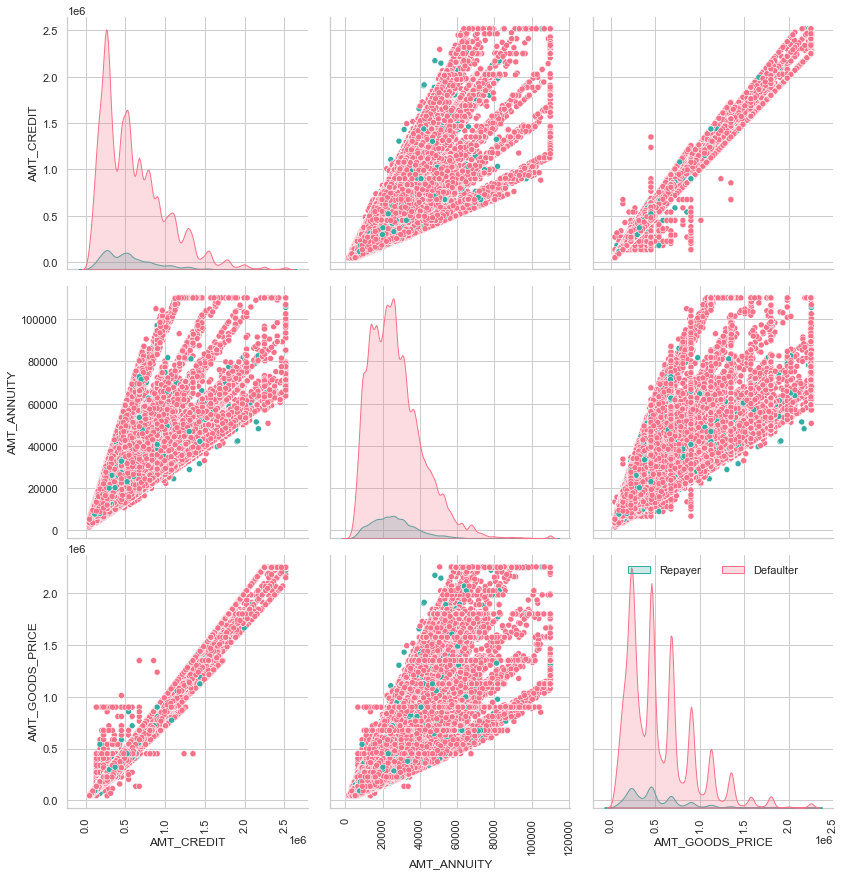

In [194]:
plt.figure(figsize = (18,7))

p1 = sns.pairplot(data = curr_app, vars = ["AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"],
             hue = "TARGET", palette = "husl", diag_kind = "kde",  height = 4)

p1._legend.remove()

for ax in p1.axes.flatten():
    ax.tick_params(axis = "x",rotation = 90)

plt.legend( loc = "upper center", labels= ["Repayer", "Defaulter"], ncol = 2, frameon = False)

plt.show()

### Loan type cols

In [195]:
loan_type_col =     ['NAME_CONTRACT_TYPE']
len(loan_type_col)

1

In [196]:
curr_app_desc.loc[loan_type_col,:]

Description
Row                                                            
NAME_CONTRACT_TYPE  Identification if loan is cash or revolving

In [197]:
curr_app.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278219
Revolving loans     29277
Name: NAME_CONTRACT_TYPE, dtype: int64

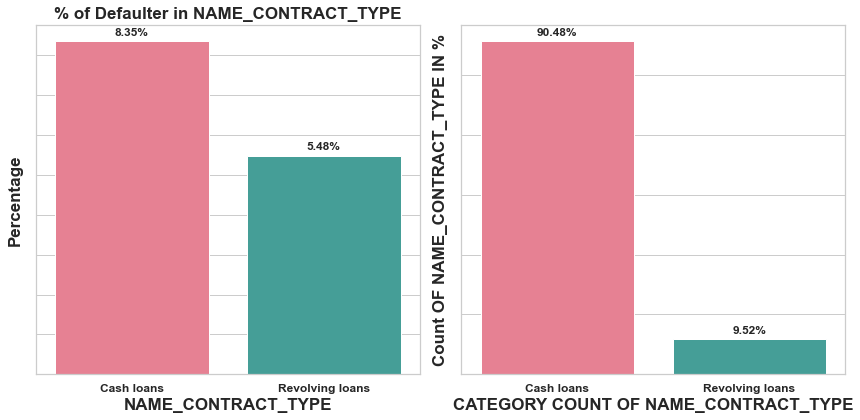

In [198]:
comparison_categorical_count_plot(df  =curr_app,
    target_var = "TARGET",
    attribute = "NAME_CONTRACT_TYPE",
    scale_log=False,
    y_Ticks_to_rotate=360,
    x_Ticks_to_rotate=360,
    layout_vert=False,
    annot_size=12,
    fig_size=(12, 6),
    palettes='husl',
    label_size=17,)

**Insights**
- **90% loans are cash loans and only 10% laons are revoilving loans.**
- **As cash loans are high in number, thus probabilty of default is more with it as comapre to revolving loans.**
- **Cash loan default rate is 8.35% and revolving loans has default rate is 5.5%.**

### Region cols

In [199]:
region_cols = [ 'REGION_POPULATION_RELATIVE',  'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY' ]
len(region_cols)

3

In [200]:
curr_app_desc.loc[region_cols,:]

Description
Row                                                                                                                                            
REGION_POPULATION_RELATIVE   Normalized population of region where client lives (higher number means the client lives in more populated region)
REGION_RATING_CLIENT                                                                        Our rating of the region where client lives (1,2,3)
REGION_RATING_CLIENT_W_CITY                                   Our rating of the region where client lives with taking city into account (1,2,3)

In [201]:
curr_app.REGION_RATING_CLIENT.value_counts()

2    226973
3     48330
1     32193
Name: REGION_RATING_CLIENT, dtype: int64

In [202]:
curr_app.REGION_RATING_CLIENT_W_CITY.value_counts()

2    229473
3     43860
1     34163
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

### Both city regions type have same numbers, lets drop one.

In [203]:
curr_app.drop("REGION_RATING_CLIENT_W_CITY", inplace =True, axis =1)

In [204]:
curr_app.shape

(307496, 59)

#### REGION_POPULATION_RELATIVE

In [205]:
curr_app.REGION_POPULATION_RELATIVE.describe()

count   307496.000000
mean         0.020868
std          0.013831
min          0.000290
25%          0.010006
50%          0.018850
75%          0.028663
max          0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

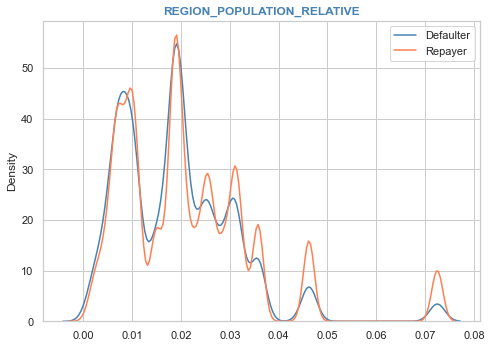

In [206]:
density_plot_comparison_curr_multiple(df = curr_app, column_lst = ["REGION_POPULATION_RELATIVE"], n_rows = 1, n_cols = 1, fig_size= (7,5), title_size = 12)

**Insights**
- **Distribution Looks fine. There exists some true outliers, However through normalisation they have been transformed.**

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
<h3>Let's change the type into categorical type for all those variables which acts as an categorical variable but is either of numeric type or of object type.</h3>
    </span>    
</div>




In [207]:
curr_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH',
       'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2

In [208]:
#Conversion of Object and Numerical columns to Categorical Columns
cat_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
                       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
                       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_11',
                       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
                       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
                       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 
                       "TARGET","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION",
                        "YEARS_BIRTH","YEARS_EMPLOYED", "YEARS_REGISTRATION","YEARS_ID_PUBLISH",
                        "FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_PHONE","FLAG_EMAIL"]
                        

for col in cat_columns:
    curr_app[col] =pd.Categorical(curr_app[col])

In [209]:
curr_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307496 entries, 0 to 307510
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307496 non-null  int64   
 1   TARGET                       307496 non-null  category
 2   NAME_CONTRACT_TYPE           307496 non-null  category
 3   CODE_GENDER                  307496 non-null  category
 4   FLAG_OWN_CAR                 307496 non-null  category
 5   FLAG_OWN_REALTY              307496 non-null  category
 6   CNT_CHILDREN                 307496 non-null  object  
 7   AMT_INCOME_TOTAL             307496 non-null  float64 
 8   AMT_CREDIT                   307496 non-null  float64 
 9   AMT_ANNUITY                  307496 non-null  float64 
 10  AMT_GOODS_PRICE              307496 non-null  float64 
 11  NAME_TYPE_SUITE              307496 non-null  category
 12  NAME_INCOME_TYPE             307496 non-null

# Let's start exploring previous application dataset.

In [210]:
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans  1730.430000     17145.000000   
1     2802425      108129         Cash loans 25188.615000    607500.000000   
2     2523466      122040         Cash loans 15060.735000    112500.000000   
3     2819243      176158         Cash loans 47041.335000    450000.000000   
4     1784265      202054         Cash loans 31924.395000    337500.000000   

     AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.000000          0.000000     17145.000000                   SATURDAY   
1 679671.000000               NaN    607500.000000                   THURSDAY   
2 136444.500000               NaN    112500.000000                    TUESDAY   
3 470790.000000               NaN    450000.000000                     MONDAY   
4 404055.000000               NaN    337500.000000                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1           0.000000               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0    12.000000           middle  POS mobile with interest       365243.000000   
1    36.000000       low_action          Cash X-Sell: low       365243.000000   
2    12.000000             high         Cash X-Sell: high       365243.000000   
3    12.000000           middle       Cash X-Sell: middle       365243.000000   
4    24.000000             high         Cash Street: high                 

In [211]:
prev_app.shape

(1670214, 37)

In [212]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [213]:
aa = obj_cols(prev_app)
print("Number of object type columns = ",aa.shape[0])
aa

Number of object type columns =  16


Number of Category
NAME_CONTRACT_TYPE                            4
WEEKDAY_APPR_PROCESS_START                    7
FLAG_LAST_APPL_PER_CONTRACT                   2
NAME_CASH_LOAN_PURPOSE                       25
NAME_CONTRACT_STATUS                          4
NAME_PAYMENT_TYPE                             4
CODE_REJECT_REASON                            9
NAME_TYPE_SUITE                               7
NAME_CLIENT_TYPE                              4
NAME_GOODS_CATEGORY                          28
NAME_PORTFOLIO                                5
NAME_PRODUCT_TYPE                             3
CHANNEL_TYPE                                  8
NAME_SELLER_INDUSTRY                         11
NAME_YIELD_GROUP                              5
PRODUCT_COMBINATION                          17

In [214]:
aa = num_cols(prev_app)
print("Number of num type columns = ",aa.shape[0])
aa

Number of num type columns =  21


Number of Unique Values
SK_ID_PREV                                 1670214
SK_ID_CURR                                  338857
AMT_ANNUITY                                 357959
AMT_APPLICATION                              93885
AMT_CREDIT                                   86803
AMT_DOWN_PAYMENT                             29278
AMT_GOODS_PRICE                              93885
HOUR_APPR_PROCESS_START                         24
NFLAG_LAST_APPL_IN_DAY                           2
RATE_DOWN_PAYMENT                           207033
RATE_INTEREST_PRIMARY                          148
RATE_INTEREST_PRIVILEGED                        25
DAYS_DECISION                                 2922
SELLERPLACE_AREA                              2097
CNT_PAYMENT                                     49
DAYS_FIRST_DRAWING                            2838
DAYS_FIRST_DUE                                2892
DAYS_LAST_DUE_1ST_VERSION                     4605
DAYS_LAST_DUE                                 2873
DAYS_TERMINATION                              2830
NFLAG_INSURED_ON_APPROVAL                        2

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <b>Inferences</b><br>
--- 37 columns.<br>
--- Some null columns are there too.<br>
--- 16 columns are of object type and 21 are of numeric type.<br>
    </span>    
</div>





### Assuming NAME CONTRACT STATUS as the Target variable of this data set.

In [215]:
prev_app_desc.loc["NAME_CONTRACT_STATUS"]

Description    Contract status (approved, cancelled, ...) of previous application
Name: NAME_CONTRACT_STATUS, dtype: object

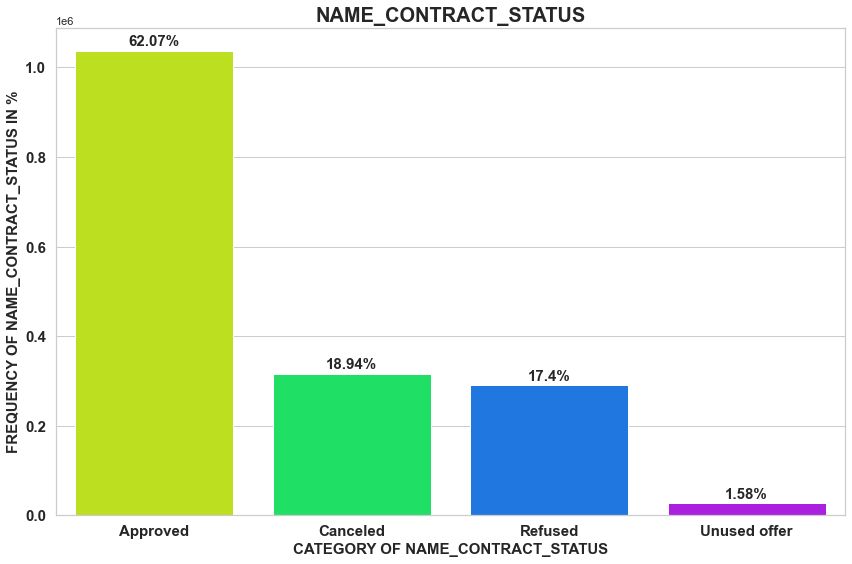

In [216]:
count_plot(prev_app, "NAME_CONTRACT_STATUS", annot_size = 15)

<h3>Insights</h3>

- **About 62% loans were accepted and 17% applicants were refused to get loan.**
- **Around 19% loans were canceled by the applicants during the applocation process due to reason like interest rate, or they might have good option or theu changes their mind, and 1% of applicants opt out to take loan**

### Let's cheeck the null values

<AxesSubplot:>

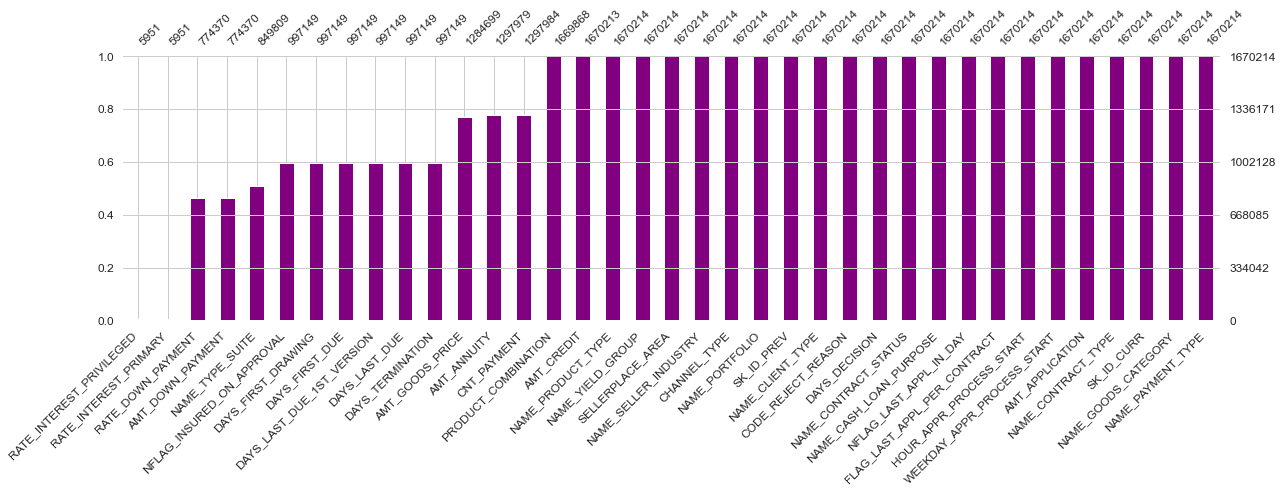

In [217]:
msno.bar(prev_app,  figsize=(18, 7), color= "purple", sort="ascending", fontsize =12)

#### Clearly there are 18-19 columns where there are null values.

In [218]:
mm = null_count_comparison(prev_app,"NAME_CONTRACT_STATUS")
mm

Approved   Refused  Canceled  Unused offer  \
RATE_INTEREST_PRIMARY     61.718400 17.403600 18.938800      1.582800   
RATE_INTEREST_PRIVILEGED  61.718400 17.403600 18.938800      1.582800   
AMT_DOWN_PAYMENT          22.416300 12.173600 18.900300      0.146200   
RATE_DOWN_PAYMENT         22.416300 12.173600 18.900300      0.146200   
NAME_TYPE_SUITE           22.299200  7.231800 18.341300      1.247500   
DAYS_FIRST_DRAWING         2.372900 17.403600 18.938800      1.582800   
DAYS_FIRST_DUE             2.372900 17.403600 18.938800      1.582800   
DAYS_LAST_DUE_1ST_VERSION  2.372900 17.403600 18.938800      1.582800   
DAYS_LAST_DUE              2.372900 17.403600 18.938800      1.582800   
DAYS_TERMINATION           2.372900 17.403600 18.938800      1.582800   
NFLAG_INSURED_ON_APPROVAL  2.372900 17.403600 18.938800      1.582800   
AMT_GOODS_PRICE            2.564600  2.221600 18.295300      0.000300   
AMT_ANNUITY                0.000500  2.448700 18.309300      1.528200   
CNT_PAYMENT                0.000200  2.448600 18.309300      1.528200   
PRODUCT_COMBINATION        0.000000  0.001900  0.018900      0.000000   
AMT_CREDIT                 0.000100  0.000000  0.000000      0.000000   

                              Total  
RATE_INTEREST_PRIMARY     99.643700  
RATE_INTEREST_PRIVILEGED  99.643700  
AMT_DOWN_PAYMENT          53.636500  
RATE_DOWN_PAYMENT         53.636500  
NAME_TYPE_SUITE           49.119800  
DAYS_FIRST_DRAWING        40.298100  
DAYS_FIRST_DUE            40.298100  
DAYS_LAST_DUE_1ST_VERSION 40.298100  
DAYS_LAST_DUE             40.298100  
DAYS_TERMINATION          40.298100  
NFLAG_INSURED_ON_APPROVAL 40.298100  
AMT_GOODS_PRICE           23.081800  
AMT_ANNUITY               22.286700  
CNT_PAYMENT               22.286400  
PRODUCT_COMBINATION        0.020700  
AMT_CREDIT                 0.000100

### Dropping Columns

- **"RATE_INTEREST_PRIVILEGED" and "RATE_INTEREST_PRIMARY" can be dropped immediately as they are 99 % null.**

In [219]:
prev_app.drop(["RATE_INTEREST_PRIVILEGED" , "RATE_INTEREST_PRIMARY"],inplace = True, axis =1)

In [220]:
prev_app.shape

(1670214, 35)

- **There are some other columns as well who has 50% of their value as null.**

- **But i would first like to check them separeately and then take a conclusion wether to drop them or not.**

### AMT_DOWN_PAYMENT

In [221]:
prev_app_desc.loc["AMT_DOWN_PAYMENT"]

Description    Down payment on the previous application
Name: AMT_DOWN_PAYMENT, dtype: object

In [222]:
prev_app.AMT_DOWN_PAYMENT.isnull().sum()

895844

### Why values are missing? Let's Check
- **Missing at random**
- **Missing not at random**

In [223]:
(prev_app["NAME_CONTRACT_STATUS"][prev_app.AMT_DOWN_PAYMENT.isnull()]).value_counts()

Approved        374400
Canceled        315676
Refused         203326
Unused offer      2442
Name: NAME_CONTRACT_STATUS, dtype: int64

**Insights**

- **Missing of down payment can not be infer**
- **because if we even assume, that people whose loan got cancelled or refused for them**
- **then there can be possibility that there will be down payments**
- **as application is either in process or refuses.**

- **However it shares the same relation with Approved.**

<AxesSubplot:>

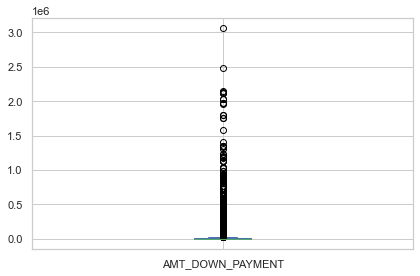

In [224]:
prev_app["AMT_DOWN_PAYMENT"].plot.box()

#### The given distribution has outliers as well which may also skewed the model. 

In [225]:
prev_app["AMT_DOWN_PAYMENT"].describe()

count    774370.000000
mean       6697.402139
std       20921.495410
min          -0.900000
25%           0.000000
50%        1638.000000
75%        7740.000000
max     3060045.000000
Name: AMT_DOWN_PAYMENT, dtype: float64

- **Out of 7.7 lakhs value 75% of down payments less than 7740.**
- **Check how many walues are outlier**

In [226]:
temp = prev_app[~prev_app["AMT_DOWN_PAYMENT"].isnull()]
iqr = np.quantile(temp["AMT_DOWN_PAYMENT"], 0.75) - np.quantile(temp["AMT_DOWN_PAYMENT"], 0.25) 
(temp["AMT_DOWN_PAYMENT"]> (np.quantile(temp["AMT_DOWN_PAYMENT"], 0.75) +iqr*1.5)).sum()

64402

In [227]:
prev_app.AMT_DOWN_PAYMENT.isnull().sum()

895844

In [228]:
prev_app["AMT_DOWN_PAYMENT"][prev_app["AMT_DOWN_PAYMENT"]<0]

368107    -0.900000
1519595   -0.450000
Name: AMT_DOWN_PAYMENT, dtype: float64

- **Around 65000 VALUES are outliers and on top of it 9 lakh values are missing.**
- **Hence it is not at all viable to keep this column better drop it.**
- **There is also humman error in two values. Negative values.**
- **Because imputing outliers and the missing values may bias the model better drop it.**
- **Rate down payment is also the normalised form of it. and there too is missing values.**
- **Drop it too.**

In [229]:
prev_app.drop(["RATE_DOWN_PAYMENT", "AMT_DOWN_PAYMENT"],inplace = True, axis =1)

In [230]:
prev_app.shape

(1670214, 33)

### NAME_TYPE_SUITE

In [231]:
prev_app_desc.loc["NAME_TYPE_SUITE"]

Description    Who accompanied client when applying for the previous application
Name: NAME_TYPE_SUITE, dtype: object

In [232]:
prev_app.NAME_TYPE_SUITE.isnull().sum()/len(prev_app)

0.4911975351661524

- **First of all who accompanied client is not at all important for us to give loan to someone**
- **Secondly 8 lakh value are not known**
- **Better to drop it**

In [233]:
prev_app.drop("NAME_TYPE_SUITE", inplace =True, axis =1)
prev_app.shape

(1670214, 32)

In [234]:
prev_app.NFLAG_INSURED_ON_APPROVAL.isnull().sum()

673065

In [235]:
prev_app["NFLAG_INSURED_ON_APPROVAL"].isnull().sum()/len(prev_app)*100

40.29812946125467

In [236]:
prev_app["NFLAG_INSURED_ON_APPROVAL"] = prev_app["NFLAG_INSURED_ON_APPROVAL"].apply(str)

In [237]:
prev_app["NFLAG_INSURED_ON_APPROVAL"].isnull().sum()

0

[]

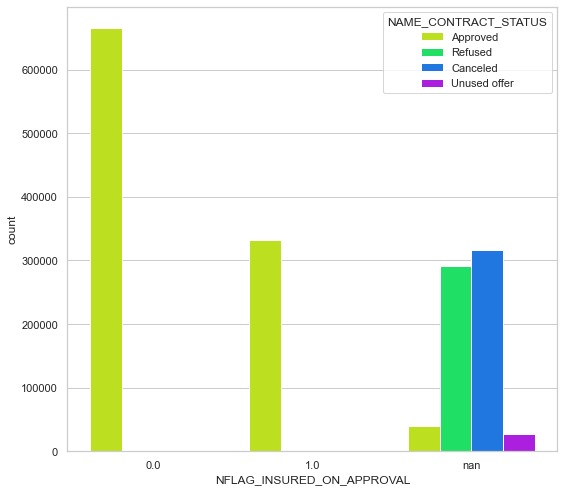

In [238]:
plt.figure(figsize = (8,7))
sns.countplot(data = prev_app ,x = "NFLAG_INSURED_ON_APPROVAL", hue = "NAME_CONTRACT_STATUS", palette = 'hsv' )
plt.plot()

- **A bizzare information has come out of this, the values which are known and wether they have opted for insurance or not, all those loans got approved. However which are not known then have some large % of applicants whose loan get rejected or they didn't accepted.**
- **So considering this..it is not viable to change the not known values with the mode value.**
- **Better would be making a new category named unknown and keep that there.**

In [239]:
prev_app.NFLAG_INSURED_ON_APPROVAL[prev_app.NFLAG_INSURED_ON_APPROVAL == "nan"] = "Unknown"
prev_app.NFLAG_INSURED_ON_APPROVAL[prev_app.NFLAG_INSURED_ON_APPROVAL == "1.0"] = "Yes"
prev_app.NFLAG_INSURED_ON_APPROVAL[prev_app.NFLAG_INSURED_ON_APPROVAL == "0.0"] = "No"

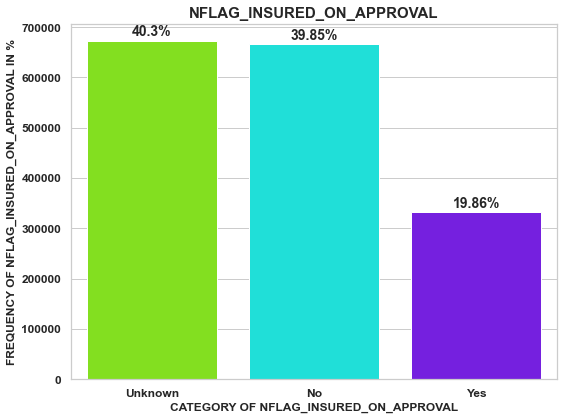

In [240]:
count_plot(df = prev_app,
    attribute = "NFLAG_INSURED_ON_APPROVAL",
    fig_size=(8, 6),
    x_ticks_rotation=0,
    y_ticks_rotation=0,
    annot_size=14,
    hz=False,
    ticks_size=12,
    label_size=12,
    title_size=15,
    palettes='hsv',
)

### CNT_PAYMENT

In [241]:
prev_app_desc.loc["CNT_PAYMENT"]

Description    Term of previous credit at application of the previous application
Name: CNT_PAYMENT, dtype: object

In [242]:
prev_app.CNT_PAYMENT.describe()

count   1297984.000000
mean         16.054082
std          14.567288
min           0.000000
25%           6.000000
50%          12.000000
75%          24.000000
max          84.000000
Name: CNT_PAYMENT, dtype: float64

In [243]:
## number of null values of cnt payment with respect to contract status

prev_app.NAME_CONTRACT_STATUS[prev_app.CNT_PAYMENT.isnull()].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [244]:
prev_app.NAME_CONTRACT_STATUS[~prev_app.CNT_PAYMENT.isnull()].value_counts()

Approved        1036777
Refused          249781
Canceled          10514
Unused offer        912
Name: NAME_CONTRACT_STATUS, dtype: int64

- **Most of those null values which are null has big share in cancelled loans.**
- **The values which are not null has big share with the approved loans**
- **We can also not drop all those rows as it will drop all cancelled loans.**
- **But in order to avoid the role of it  we can impute it with zero for cancelled loans as loans which got cancelled is majorly because of higher intereset offered and the customer didnt allow the company to process the application**
- **So better if we could impute all those CNT_PAYMENT which are cancelled loans with zero and others with their respective medians.**

In [245]:
### lets fill the null values with their respective medians

med_approved = prev_app.CNT_PAYMENT[prev_app.NAME_CONTRACT_STATUS == "Approved"].median()
med_refused = prev_app.CNT_PAYMENT[prev_app.NAME_CONTRACT_STATUS == "Refused"].median()
med_Unused = prev_app.CNT_PAYMENT[prev_app.NAME_CONTRACT_STATUS == "Unused offer"].median()

prev_app.CNT_PAYMENT[ (prev_app.CNT_PAYMENT.isnull())& (prev_app.NAME_CONTRACT_STATUS == "Approved")] = med_approved
prev_app.CNT_PAYMENT[ (prev_app.CNT_PAYMENT.isnull())& (prev_app.NAME_CONTRACT_STATUS == "Refused")] = med_refused
prev_app.CNT_PAYMENT[ (prev_app.CNT_PAYMENT.isnull())& (prev_app.NAME_CONTRACT_STATUS == "Canceled")] = 0
prev_app.CNT_PAYMENT[ (prev_app.CNT_PAYMENT.isnull())& (prev_app.NAME_CONTRACT_STATUS == "Unused offer")] = med_Unused

In [246]:
prev_app.CNT_PAYMENT.isnull().sum()

0

### Check are there any outliers

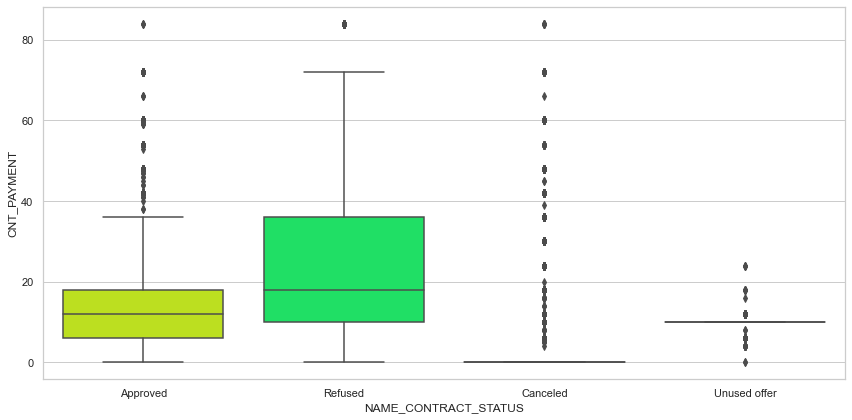

In [247]:
plt.figure(figsize = (12,6))
sns.boxplot(data = prev_app, x = "NAME_CONTRACT_STATUS", y="CNT_PAYMENT", palette = "hsv")
plt.show()

#### Better to impute the extreme outlier with the 99th percentile so that some high bias must not be introduced.

In [248]:
np.percentile(prev_app.CNT_PAYMENT,99)

60.0

In [249]:
prev_app.CNT_PAYMENT[(prev_app.CNT_PAYMENT>60)]=60

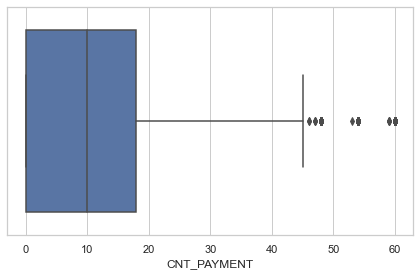

In [250]:
sns.boxplot(prev_app.CNT_PAYMENT)
plt.show()

In [251]:
### AMT_GOODS_PRICE

In [252]:
prev_app_desc.loc["AMT_GOODS_PRICE"]

Description    Goods price of good that client asked for (if applicable) on the previous application
Name: AMT_GOODS_PRICE, dtype: object

In [253]:
prev_app.AMT_GOODS_PRICE.isnull().sum()

385515

In [254]:
prev_app.NAME_CONTRACT_STATUS[prev_app.AMT_GOODS_PRICE.isnull()].value_counts()

Canceled        305570
Approved         42835
Refused          37105
Unused offer         5
Name: NAME_CONTRACT_STATUS, dtype: int64

In [255]:
prev_app.NAME_GOODS_CATEGORY[prev_app.AMT_GOODS_PRICE.isnull()].value_counts()

XNA    385515
Name: NAME_GOODS_CATEGORY, dtype: int64

- **With the given analysis, it is clearly evident that amount of goods price which are null is because the goods category for such goods is also not known.**

- **Moreover amount of goods price which are null are mostly null. Maybe applicant cancelled the loan application and didnt fill this information. Hence null too.**

- **Better impute with zero where loans get cancelled and where it is approved and refused fill it with the median.**

In [256]:
med_approved = prev_app.AMT_GOODS_PRICE[prev_app.NAME_CONTRACT_STATUS == "Approved"].median()
med_refused = prev_app.AMT_GOODS_PRICE[prev_app.NAME_CONTRACT_STATUS == "Refused"].median()
med_Unused = prev_app.AMT_GOODS_PRICE[prev_app.NAME_CONTRACT_STATUS == "Unused offer"].median()

prev_app.AMT_GOODS_PRICE[ (prev_app.AMT_GOODS_PRICE.isnull()) & (prev_app.NAME_CONTRACT_STATUS == "Approved")    ] = med_approved
prev_app.AMT_GOODS_PRICE[ (prev_app.AMT_GOODS_PRICE.isnull()) & (prev_app.NAME_CONTRACT_STATUS == "Refused")     ] = med_refused
prev_app.AMT_GOODS_PRICE[ (prev_app.AMT_GOODS_PRICE.isnull()) & (prev_app.NAME_CONTRACT_STATUS == "Canceled")    ] = 0
prev_app.AMT_GOODS_PRICE[ (prev_app.AMT_GOODS_PRICE.isnull()) & (prev_app.NAME_CONTRACT_STATUS == "Unused offer")] = med_Unused

In [257]:
prev_app.AMT_GOODS_PRICE.isnull().sum()

0

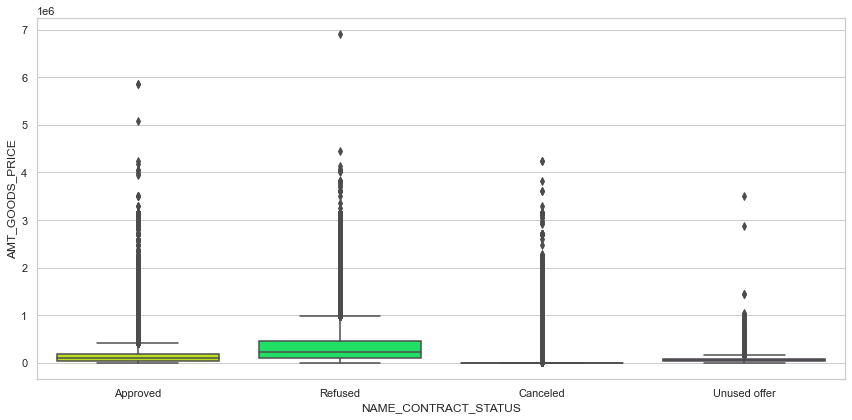

In [258]:
plt.figure(figsize = (12,6))
sns.boxplot(data = prev_app, x = "NAME_CONTRACT_STATUS", y="AMT_GOODS_PRICE", palette = "hsv")
plt.show()

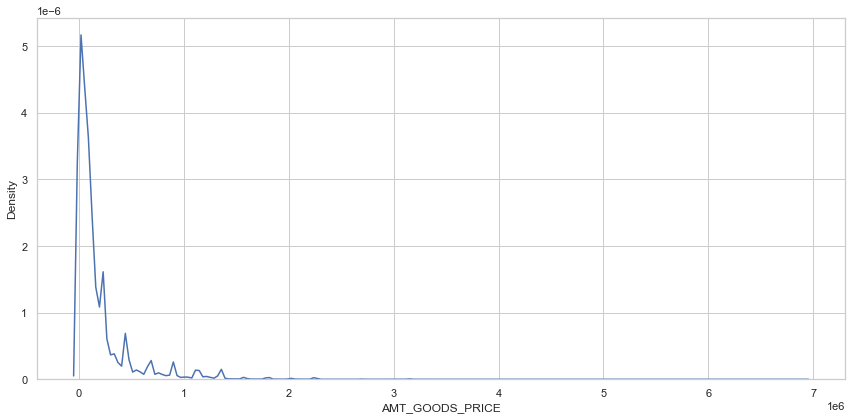

In [259]:
plt.figure(figsize=(12,6))
sns.kdeplot(prev_app['AMT_GOODS_PRICE'])
plt.show()

#### Capping the outliers with the value at 99th percentile

In [260]:
aa = np.percentile(prev_app.AMT_GOODS_PRICE,99)
aa

1350000.0

In [261]:
prev_app.AMT_GOODS_PRICE[prev_app.AMT_GOODS_PRICE>aa] = aa

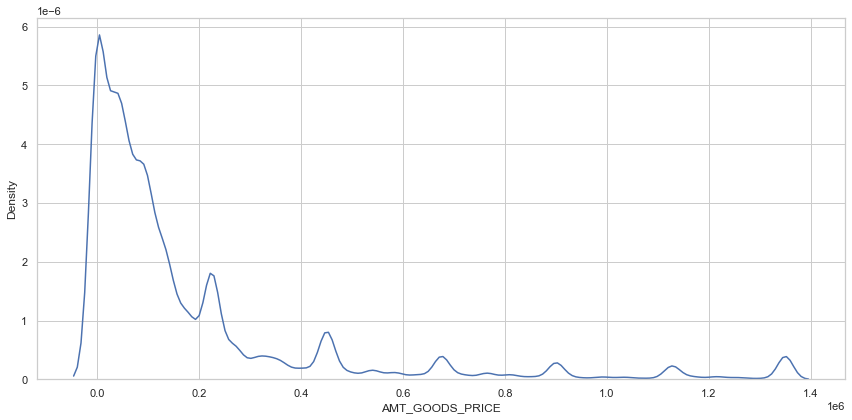

In [262]:
plt.figure(figsize=(12,6))
sns.kdeplot(prev_app['AMT_GOODS_PRICE'])
plt.show()

### check null values again

In [263]:
mm = null_count_comparison(prev_app,"NAME_CONTRACT_STATUS")
mm

Approved   Refused  Canceled  Unused offer  \
DAYS_FIRST_DRAWING         2.372900 17.403600 18.938800      1.582800   
DAYS_FIRST_DUE             2.372900 17.403600 18.938800      1.582800   
DAYS_LAST_DUE_1ST_VERSION  2.372900 17.403600 18.938800      1.582800   
DAYS_LAST_DUE              2.372900 17.403600 18.938800      1.582800   
DAYS_TERMINATION           2.372900 17.403600 18.938800      1.582800   
AMT_ANNUITY                0.000500  2.448700 18.309300      1.528200   
PRODUCT_COMBINATION        0.000000  0.001900  0.018900      0.000000   
AMT_CREDIT                 0.000100  0.000000  0.000000      0.000000   

                              Total  
DAYS_FIRST_DRAWING        40.298100  
DAYS_FIRST_DUE            40.298100  
DAYS_LAST_DUE_1ST_VERSION 40.298100  
DAYS_LAST_DUE             40.298100  
DAYS_TERMINATION          40.298100  
AMT_ANNUITY               22.286700  
PRODUCT_COMBINATION        0.020700  
AMT_CREDIT                 0.000100

### AMT_ANNUITY

In [264]:
prev_app.AMT_ANNUITY.isnull().sum()

372235

In [265]:
prev_app.NAME_CONTRACT_STATUS[prev_app.AMT_ANNUITY.isnull()].value_counts()

Canceled        305805
Refused          40898
Unused offer     25524
Approved             8
Name: NAME_CONTRACT_STATUS, dtype: int64

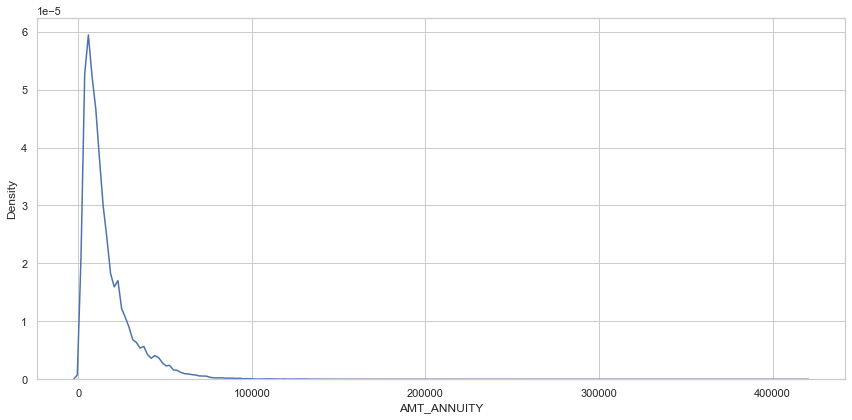

In [266]:
plt.figure(figsize=(12,6))
sns.kdeplot(prev_app['AMT_ANNUITY'])
plt.show()

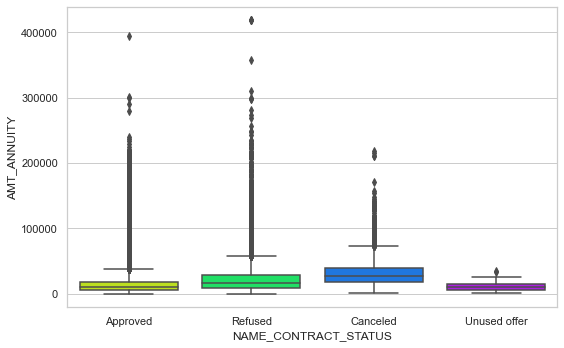

In [267]:
plt.figure(figsize=(8,5))
sns.boxplot(data = prev_app, x = "NAME_CONTRACT_STATUS", y="AMT_ANNUITY", palette = 'hsv')
plt.show()

### Let's check how to change the values of nan mode/median?

In [268]:
med = prev_app['AMT_ANNUITY'].median()
med

11250.0

In [269]:
mod = prev_app['AMT_ANNUITY'].mode()[0]
mod

2250.0

In [270]:
temp1 = prev_app['AMT_ANNUITY'].copy()
temp2 = prev_app['AMT_ANNUITY'].copy()

In [271]:
temp1.fillna(med, inplace = True)
temp2.fillna(mod, inplace = True)

In [272]:
temp1.isnull().sum()

0

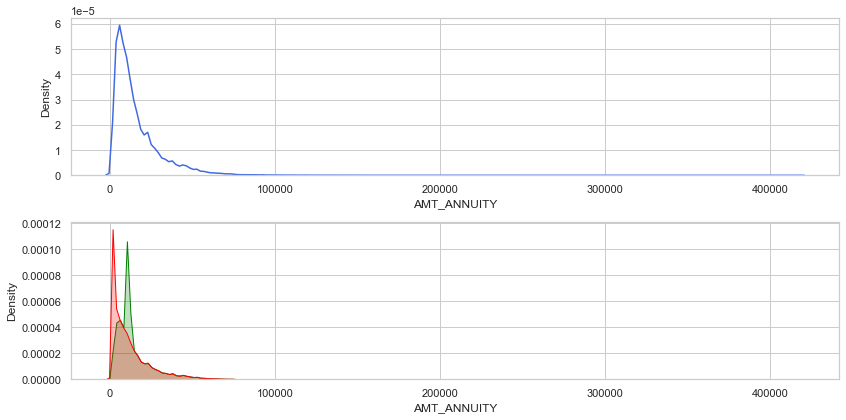

In [273]:
fig, axes = plt.subplots(nrows = 2, ncols =1, figsize=(12,6))

sns.kdeplot(ax = axes[0], x = prev_app['AMT_ANNUITY'], color = "royalblue")
sns.kdeplot(ax = axes[1], x = temp1, color = "green",fill = "green")
sns.kdeplot(ax = axes[1], x = temp2, color = "red", fill = "red")

plt.show()

In [274]:
# lets change it with respect to median value asscoicte with loan status.

In [275]:
temp3 = prev_app[['AMT_ANNUITY', "NAME_CONTRACT_STATUS"]].copy()

In [276]:
med_approved = temp3.AMT_ANNUITY[temp3.NAME_CONTRACT_STATUS == "Approved"].median()
med_refused =  temp3.AMT_ANNUITY[temp3.NAME_CONTRACT_STATUS == "Refused"].median()
med_Unused =   temp3.AMT_ANNUITY[temp3.NAME_CONTRACT_STATUS == "Unused offer"].median()
med_Canceled = temp3.AMT_ANNUITY[temp3.NAME_CONTRACT_STATUS == "Canceled"].median()

temp3.AMT_ANNUITY[ (temp3.AMT_ANNUITY.isnull()) & (temp3.NAME_CONTRACT_STATUS == "Approved")] = med_approved
temp3.AMT_ANNUITY[ (temp3.AMT_ANNUITY.isnull()) & (temp3.NAME_CONTRACT_STATUS == "Refused")] = med_refused
temp3.AMT_ANNUITY[ (temp3.AMT_ANNUITY.isnull()) & (temp3.NAME_CONTRACT_STATUS == "Canceled")] = med_Canceled
temp3.AMT_ANNUITY[ (temp3.AMT_ANNUITY.isnull()) & (temp3.NAME_CONTRACT_STATUS == "Unused offer")] = med_Unused

In [277]:
temp3.AMT_ANNUITY.isnull().sum()

0

In [278]:
temp4 = prev_app[['AMT_ANNUITY', "NAME_CONTRACT_STATUS"]].copy()

In [279]:
mod_approved = temp4.AMT_ANNUITY[temp4.NAME_CONTRACT_STATUS == "Approved"].mode()[0]
mod_refused =  temp4.AMT_ANNUITY[temp4.NAME_CONTRACT_STATUS == "Refused"].mode()[0]
mod_Unused =   temp4.AMT_ANNUITY[temp4.NAME_CONTRACT_STATUS == "Unused offer"].mode()[0]
mod_Canceled = temp4.AMT_ANNUITY[temp4.NAME_CONTRACT_STATUS == "Canceled"].mode()[0]

temp4.AMT_ANNUITY[ (temp4.AMT_ANNUITY.isnull()) & (temp4.NAME_CONTRACT_STATUS == "Approved")] = mod_approved
temp4.AMT_ANNUITY[ (temp4.AMT_ANNUITY.isnull()) & (temp4.NAME_CONTRACT_STATUS == "Refused")] = mod_refused
temp4.AMT_ANNUITY[ (temp4.AMT_ANNUITY.isnull()) & (temp4.NAME_CONTRACT_STATUS == "Canceled")] = mod_Canceled
temp4.AMT_ANNUITY[ (temp4.AMT_ANNUITY.isnull()) & (temp4.NAME_CONTRACT_STATUS == "Unused offer")] = mod_Unused

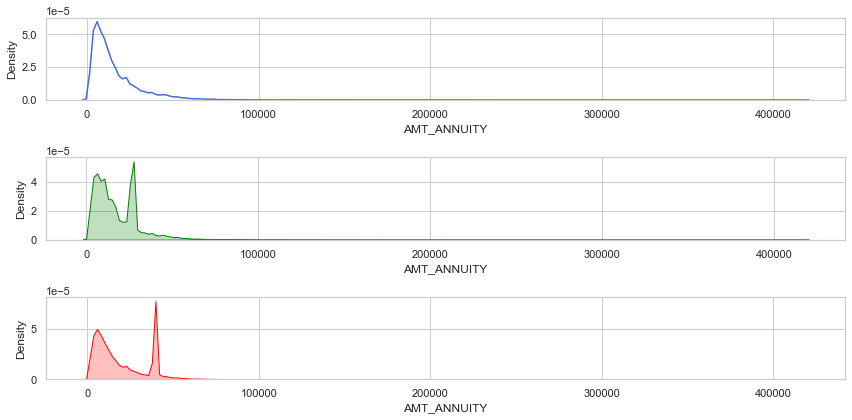

In [280]:
fig, axes = plt.subplots(nrows = 3, ncols =1, figsize=(12,6))

sns.kdeplot(ax = axes[0], x = prev_app['AMT_ANNUITY'], color = "royalblue")
sns.kdeplot(ax = axes[1], x = temp3.AMT_ANNUITY, color = "green",fill = "green")
sns.kdeplot(ax = axes[2], x = temp4.AMT_ANNUITY, color = "red", fill = "red")

plt.show()

## Clearly median will be the better method in this case as it keeps shape the distribution as it is before.

In [281]:
med_approved = prev_app.AMT_ANNUITY[prev_app.NAME_CONTRACT_STATUS == "Approved"].median()
med_refused =  prev_app.AMT_ANNUITY[prev_app.NAME_CONTRACT_STATUS == "Refused"].median()
med_Unused =   prev_app.AMT_ANNUITY[prev_app.NAME_CONTRACT_STATUS == "Unused offer"].median()
med_Canceled = prev_app.AMT_ANNUITY[prev_app.NAME_CONTRACT_STATUS == "Canceled"].median()

prev_app.AMT_ANNUITY[ (prev_app.AMT_ANNUITY.isnull()) & (prev_app.NAME_CONTRACT_STATUS == "Approved")] = med_approved
prev_app.AMT_ANNUITY[ (prev_app.AMT_ANNUITY.isnull()) & (prev_app.NAME_CONTRACT_STATUS == "Refused")] = med_refused
prev_app.AMT_ANNUITY[ (prev_app.AMT_ANNUITY.isnull()) & (prev_app.NAME_CONTRACT_STATUS == "Canceled")] = med_Canceled
prev_app.AMT_ANNUITY[ (prev_app.AMT_ANNUITY.isnull()) & (prev_app.NAME_CONTRACT_STATUS == "Unused offer")] = med_Unused

In [282]:
prev_app['AMT_ANNUITY'].isnull().sum()

0

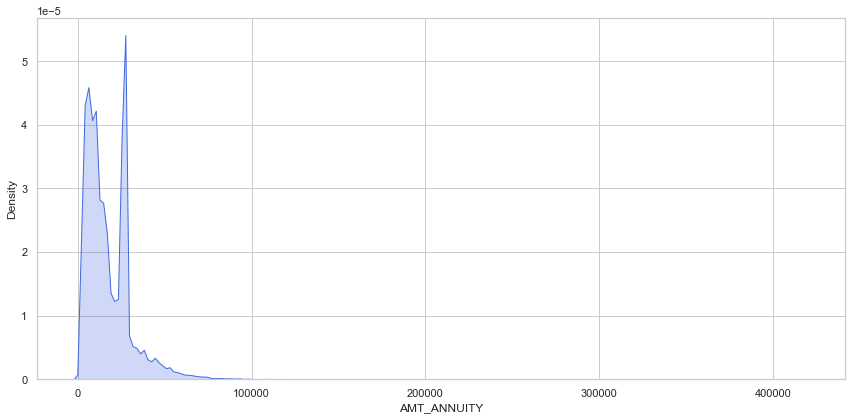

In [283]:
plt.figure(figsize=(12,6))

sns.kdeplot( x = prev_app['AMT_ANNUITY'], color = "royalblue", fill="red")

plt.show()

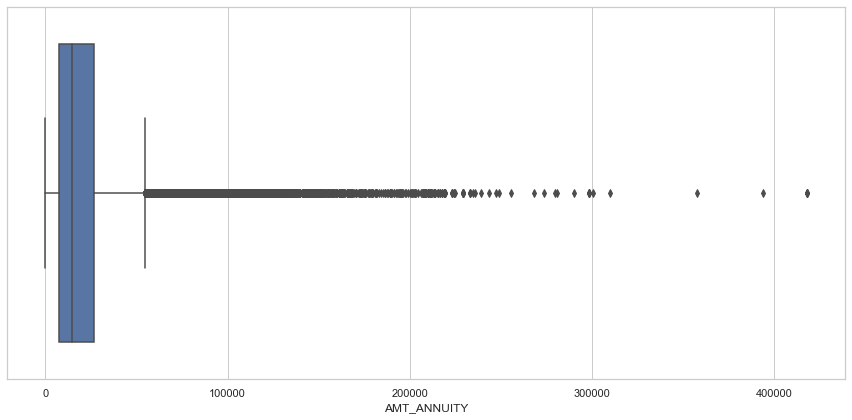

In [284]:
plt.figure(figsize=(12,6))

sns.boxplot( prev_app['AMT_ANNUITY'])

plt.show()

In [285]:
pd.set_option('float_format', '{:f}'.format)

In [286]:
prev_app['AMT_ANNUITY'].describe()

count   1670214.000000
mean      17782.467120
std       13685.115049
min           0.000000
25%        7547.096250
50%       14692.342500
75%       26474.625000
max      418058.145000
Name: AMT_ANNUITY, dtype: float64

In [287]:
## CAPING OUTLIERS WITH 99 PERCENTILE

In [288]:

cap_value = np.percentile(prev_app.AMT_ANNUITY,90)
prev_app.AMT_ANNUITY[prev_app.AMT_ANNUITY>cap_value] = cap_value

In [289]:
print(prev_app['AMT_ANNUITY'].describe())

count   1670214.000000
mean      16163.097030
std        9437.102014
min           0.000000
25%        7547.096250
50%       14692.342500
75%       26474.625000
max       30219.930000
Name: AMT_ANNUITY, dtype: float64


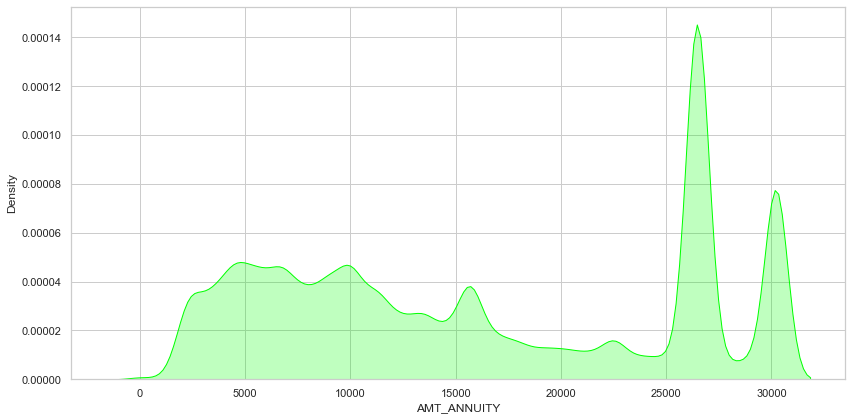

In [290]:
plt.figure(figsize=(12,6))

sns.kdeplot( x = prev_app['AMT_ANNUITY'], color = "lime", fill="lime")

plt.show()

In [291]:
null_count_comparison(prev_app, "NAME_CONTRACT_STATUS")

Approved   Refused  Canceled  Unused offer  \
DAYS_FIRST_DRAWING         2.372900 17.403600 18.938800      1.582800   
DAYS_FIRST_DUE             2.372900 17.403600 18.938800      1.582800   
DAYS_LAST_DUE_1ST_VERSION  2.372900 17.403600 18.938800      1.582800   
DAYS_LAST_DUE              2.372900 17.403600 18.938800      1.582800   
DAYS_TERMINATION           2.372900 17.403600 18.938800      1.582800   
PRODUCT_COMBINATION        0.000000  0.001900  0.018900      0.000000   
AMT_CREDIT                 0.000100  0.000000  0.000000      0.000000   

                              Total  
DAYS_FIRST_DRAWING        40.298100  
DAYS_FIRST_DUE            40.298100  
DAYS_LAST_DUE_1ST_VERSION 40.298100  
DAYS_LAST_DUE             40.298100  
DAYS_TERMINATION          40.298100  
PRODUCT_COMBINATION        0.020700  
AMT_CREDIT                 0.000100

In [292]:
prev_app.shape

(1670214, 32)

### Dropping rows where product_combination and amt credit is null

In [293]:
prev_app = prev_app[~prev_app.PRODUCT_COMBINATION.isnull()]
prev_app = prev_app[~prev_app.AMT_CREDIT.isnull()]
prev_app.shape

(1669867, 32)

In [294]:
null_count_comparison(prev_app, "NAME_CONTRACT_STATUS")

Approved   Refused  Canceled  Unused offer  \
DAYS_FIRST_DRAWING         2.373300 17.405400 18.923900      1.583100   
DAYS_FIRST_DUE             2.373300 17.405400 18.923900      1.583100   
DAYS_LAST_DUE_1ST_VERSION  2.373300 17.405400 18.923900      1.583100   
DAYS_LAST_DUE              2.373300 17.405400 18.923900      1.583100   
DAYS_TERMINATION           2.373300 17.405400 18.923900      1.583100   

                              Total  
DAYS_FIRST_DRAWING        40.285700  
DAYS_FIRST_DUE            40.285700  
DAYS_LAST_DUE_1ST_VERSION 40.285700  
DAYS_LAST_DUE             40.285700  
DAYS_TERMINATION          40.285700

In [295]:
days_col = ["DAYS_FIRST_DRAWING", "DAYS_FIRST_DUE", "DAYS_LAST_DUE_1ST_VERSION", "DAYS_LAST_DUE", "DAYS_TERMINATION"]
prev_app_desc.loc[days_col,:]

Description
Row                                                                                                                                             
DAYS_FIRST_DRAWING               Relative to application date of current application when was the first disbursement of the previous application
DAYS_FIRST_DUE             Relative to application date of current application when was the first due supposed to be of the previous application
DAYS_LAST_DUE_1ST_VERSION                 Relative to application date of current application when was the first due of the previous application
DAYS_LAST_DUE                         Relative to application date of current application when was the last due date of the previous application
DAYS_TERMINATION               Relative to application date of current application when was the expected termination of the previous application

In [296]:
for i in days_col:
    print(prev_app.NAME_CONTRACT_STATUS[prev_app[i].isnull()].value_counts())

Canceled        316004
Refused         290647
Approved         39631
Unused offer     26436
Name: NAME_CONTRACT_STATUS, dtype: int64
Canceled        316004
Refused         290647
Approved         39631
Unused offer     26436
Name: NAME_CONTRACT_STATUS, dtype: int64
Canceled        316004
Refused         290647
Approved         39631
Unused offer     26436
Name: NAME_CONTRACT_STATUS, dtype: int64
Canceled        316004
Refused         290647
Approved         39631
Unused offer     26436
Name: NAME_CONTRACT_STATUS, dtype: int64
Canceled        316004
Refused         290647
Approved         39631
Unused offer     26436
Name: NAME_CONTRACT_STATUS, dtype: int64


- **As expected, days for due, disburment or termination will only be there if loan is approved.**
- **Otherwise it is said be no value.**
- **Hence if we impute all such days with 0 then our problem will be solved.**
- **But imputing days with zero should only be viable for those loans which are not approved.**
- **For approved loans, we can impute it either with median or mode.**

### Making Changes

In [297]:
for i in days_col:
    prev_app[i][ (prev_app[i].isnull() ) & (prev_app.NAME_CONTRACT_STATUS == "Canceled") ] = 0
    prev_app[i][ (prev_app[i].isnull() ) & (prev_app.NAME_CONTRACT_STATUS == "Refused") ] = 0
    prev_app[i][ (prev_app[i].isnull() ) & (prev_app.NAME_CONTRACT_STATUS == "Unused offer") ] = 0
    
    medi = prev_app[i][ (prev_app.NAME_CONTRACT_STATUS == "Approved") ].median()
    prev_app[i][ (prev_app[i].isnull() ) & (prev_app.NAME_CONTRACT_STATUS == "Approved") ] = medi

In [298]:
null_count_comparison(prev_app, "NAME_CONTRACT_STATUS")

Empty DataFrame
Columns: [Approved, Refused, Canceled, Unused offer, Total]
Index: []

- **Problem of Null values are solved now.**
- **But there are negative values in days as it was respect to the current application.**
- **Convert it to a +ve and moreover in years**

In [299]:
for i in days_col:
    prev_app[i] = prev_app[i].apply(lambda x:abs(int(x//365)))

### Let's change the column names from days to year.

In [300]:
prev_app.rename(columns = {"DAYS_FIRST_DRAWING":"YEARS_FIRST_DRAWING", 
                           "DAYS_FIRST_DUE":"YEARS_FIRST_DUE", 
                           "DAYS_LAST_DUE_1ST_VERSION":"YEARS_LAST_DUE_1ST_VERSION", 
                           "DAYS_LAST_DUE":"YEARS_LAST_DUE",
                           "DAYS_TERMINATION":"YEARS_TERMINATION"
                          }, inplace = True)

In [301]:
years_col = ["YEARS_FIRST_DRAWING", "YEARS_FIRST_DUE", "YEARS_LAST_DUE_1ST_VERSION", "YEARS_LAST_DUE","YEARS_TERMINATION"]

prev_app[years_col].describe()

YEARS_FIRST_DRAWING  YEARS_FIRST_DUE  YEARS_LAST_DUE_1ST_VERSION  \
count       1669867.000000   1669867.000000              1669867.000000   
mean            583.449199        26.431919                   57.671120   
std             492.861777       153.791031                  229.980599   
min               0.000000         0.000000                    0.000000   
25%               0.000000         0.000000                    0.000000   
50%            1000.000000         2.000000                    1.000000   
75%            1000.000000         4.000000                    3.000000   
max            1000.000000      1000.000000                 1000.000000   

       YEARS_LAST_DUE  YEARS_TERMINATION  
count  1669867.000000     1669867.000000  
mean       128.065445         136.813655  
std        331.807288         341.433568  
min          0.000000           0.000000  
25%          0.000000           0.000000  
50%          1.000000           1.000000  
75%          5.000000           5.000000  
max       1000.000000        1000.000000

- **Each year column has max years has 1000, which we can say as misleading or error**

In [302]:
### let's see how many of them are such.

In [303]:
for i in years_col:
    print(i, "--", (prev_app[i]>=1000).sum())

YEARS_FIRST_DRAWING -- 974075
YEARS_FIRST_DUE -- 40645
YEARS_LAST_DUE_1ST_VERSION -- 93864
YEARS_LAST_DUE -- 211221
YEARS_TERMINATION -- 225913


### It would be better if we drop all of them as first we imputed 40% values and now all these cols have some misleading values.

In [304]:
prev_app.drop(years_col, inplace = True, axis =1)

In [305]:
prev_app.shape

(1669867, 27)

### Dropping WEEKDAY and HOURS application process starts Columns

- Before disbursing any loan, a person financial backgroud is checked rather than on which date or hour the process gets started.
- It may be useful for the managment in tracking the the time taken by loan disbursing team to decide wether to disburse the loan or not, but not for the loan disbursement check.
- So considering this, I better choose to drop these two columns.

In [306]:
prev_app.drop(["WEEKDAY_APPR_PROCESS_START" , "HOUR_APPR_PROCESS_START"],inplace = True, axis =1)

In [307]:
prev_app.shape

(1669867, 25)

## Finally no more null valuees. However there were xan and xap values.
- **Check all those columns which have xap or xan values**

In [308]:
xna_lst = check_xna_xap(prev_app)
xna_lst

['NAME_GOODS_CATEGORY',
 'NAME_PAYMENT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PRODUCT_TYPE',
 'NAME_CLIENT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'CODE_REJECT_REASON',
 'NAME_PORTFOLIO',
 'NAME_YIELD_GROUP']

In [309]:
prev_app_desc.loc[xna_lst,:]

Description
Row                                                                                                 
NAME_GOODS_CATEGORY          What kind of goods did the client apply for in the previous application
NAME_PAYMENT_TYPE               Payment method that client chose to pay for the previous application
NAME_CASH_LOAN_PURPOSE                                                      Purpose of the cash loan
NAME_PRODUCT_TYPE                                      Was the previous application x-sell o walk-in
NAME_CLIENT_TYPE         Was the client old or new client when applying for the previous application
NAME_SELLER_INDUSTRY                                                      The industry of the seller
CODE_REJECT_REASON                                         Why was the previous application rejected
NAME_PORTFOLIO                                    Was the previous application for CASH, POS, CAR, 

NAME_YIELD_GROUP        Grouped interest rate into small medium and high of the previous application

In [310]:
prev_app[xna_lst].head(20)

NAME_GOODS_CATEGORY      NAME_PAYMENT_TYPE NAME_CASH_LOAN_PURPOSE  \
0                     Mobile  Cash through the bank                    XAP   
1                        XNA                    XNA                    XNA   
2                        XNA  Cash through the bank                    XNA   
3                        XNA  Cash through the bank                    XNA   
4                        XNA  Cash through the bank                Repairs   
5                        XNA  Cash through the bank      Everyday expenses   
6                        XNA                    XNA                    XNA   
7                        XNA                    XNA                    XNA   
8                        XNA                    XNA                    XNA   
9                        XNA                    XNA                    XNA   
10                       XNA  Cash through the bank                    XNA   
11                       XNA  Cash through the bank                    XNA   
12                       XNA  Cash through the bank                    XNA   
13      Consumer Electronics  Cash through the bank                    XAP   
14    Construction Materials  Cash through the bank                    XAP   
15          Auto Accessories  Cash through the bank                    XAP   
16  Photo / Cinema Equipment  Cash through the bank                    XAP   
17                       XNA                    XNA                    XAP   
18                       XNA  Cash through the bank                    XNA   
19                       XNA                    XNA      Everyday expenses   

   NAME_PRODUCT_TYPE NAME_CLIENT_TYPE  NAME_SELLER_INDUSTRY  \
0                XNA         Repeater          Connectivity   
1             x-sell         Repeater                   XNA   
2             x-sell         Repeater                   XNA   
3             x-sell         Repeater                   XNA   
4            walk-in         Repeater                   XNA   
5             x-sell         Repeater                   XNA   
6                XNA         Repeater                   XNA   
7                XNA         Repeater                   XNA   
8                XNA         Repeater                   XNA   
9                XNA         Repeater                   XNA   
10            x-sell         Repeater                   XNA   
11            x-sell         Repeater                   XNA   
12            x-sell         Repeater                   XNA   
13               XNA              New  Consumer electronics   
14               XNA              New  Consumer electronics   
15               XNA              New              Industry   
16               XNA         Repeater  Consumer electronics   
17            x-sell         Repeater                   XNA   
18            x-sell         Repeater                   XNA   
19           walk-in         Repeater                   XNA   

   CODE_REJECT_REASON NAME_PORTFOLIO NAME_YIELD_GROUP  
0                 XAP            POS           middle  
1                 XAP           Cash       low_action  
2                 XAP           Cash             high  
3                 XAP           Cash           middle  
4                  HC           Cash             high  
5                 XAP           Cash       low_normal  
6                 XAP            XNA              XNA  
7                 XAP            XNA              XNA  
8                 XAP            XNA              XNA  
9                 XAP            XNA              XNA  
10                XAP           Cash       low_normal  
11                XAP           Cash           middle  
12                XAP           Cash             high  
13                XAP            POS       low_action  
14                XAP            POS           middle  
15                XAP            POS       low_normal  
16                XAP            POS             high  
17                XAP          Cards  

### NAME_PAYMENT_TYPE

In [311]:
prev_app.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        1033552
XNA                                           627037
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

In [312]:
aa = pd.pivot_table(data = prev_app, index = "NAME_PAYMENT_TYPE", columns = "NAME_CONTRACT_STATUS",  aggfunc = "count").iloc[:,0:4]
aa

AMT_ANNUITY                   \
NAME_CONTRACT_STATUS                         Approved Canceled Refused   
NAME_PAYMENT_TYPE                                                        
Cash through the bank                          817174     3190  187307   
Cashless from the account of the employer         862       20     195   
Non-cash from your account                       6938       35    1187   
XNA                                            211806   312759  101958   

                                                        
NAME_CONTRACT_STATUS                      Unused offer  
NAME_PAYMENT_TYPE                                       
Cash through the bank                            25881  
Cashless from the account of the employer            8  
Non-cash from your account                          33  
XNA                                                514

### First of all change the XNA to new category "Unknown"  because xna value shares relation with all the categories of contract status

In [313]:
prev_app.NAME_PAYMENT_TYPE.replace("XNA", "Unknown", inplace = True)

### Let's draw a stacked bar charchart representing the share of each payment type in respect of contract status

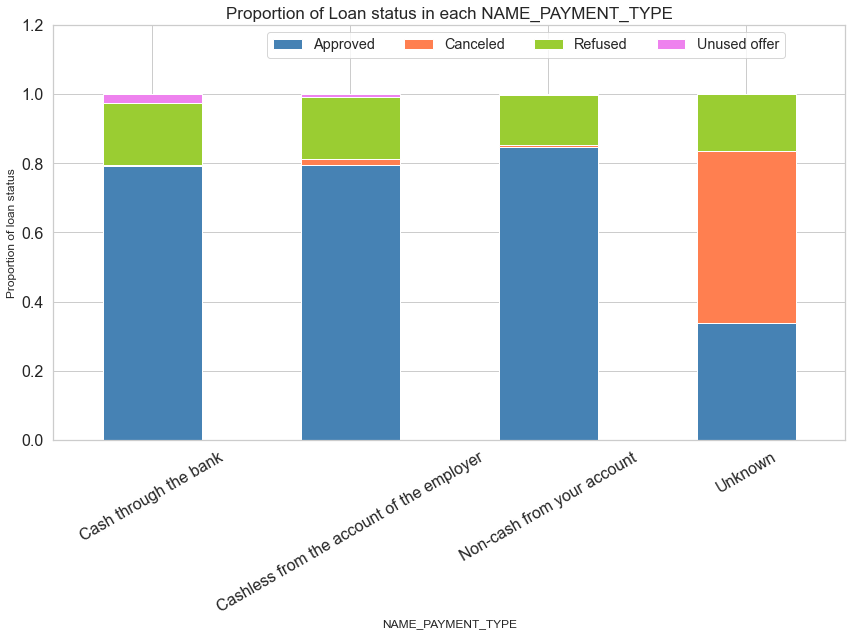

In [314]:
stackbarchart(df = prev_app, 
                  attribute = "NAME_PAYMENT_TYPE", 
                  target_var = "NAME_CONTRACT_STATUS",  
                  fig_size = (12,9), 
                  annot_size = 30, 
                  label_size =12, 
                  title_size =17, 
                  x_tick_rotation  = 30)

**Insights**
- **It is clearly evident that for unknown payment are the ones where most loans are cancelled.**
- **Cashless payment from account has respectively more chance of loan getting default.**
- **Though the cash via bank and cashless from emoloyes has the maximum refusal rate comparing to others two payment type**

### NAME_PORTFOLIO and NAME_CONTRACT_TYPE

In [315]:
prev_app_desc.loc[["NAME_PORTFOLIO", "NAME_CONTRACT_TYPE"], :]

Description
Row                                                                                                        
NAME_PORTFOLIO                                           Was the previous application for CASH, POS, CAR, 

NAME_CONTRACT_TYPE  Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application

In [316]:
prev_app.NAME_PORTFOLIO.value_counts()

POS      691011
Cash     461563
XNA      371884
Cards    144984
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [317]:
prev_app.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193163
Name: NAME_CONTRACT_TYPE, dtype: int64

In [318]:
aa = pd.pivot_table(data = prev_app, index = "NAME_PORTFOLIO", columns = "NAME_CONTRACT_TYPE",  aggfunc = "count").iloc[:,0:3]
aa = aa.T.reset_index(level =0, drop =True)
aa

NAME_PORTFOLIO             Cards       Cars          Cash           POS  \
NAME_CONTRACT_TYPE                                                        
Cash loans                   NaN        NaN 461563.000000           NaN   
Consumer loans               NaN 425.000000           NaN 691011.000000   
Revolving loans    144984.000000        NaN           NaN           NaN   

NAME_PORTFOLIO               XNA  
NAME_CONTRACT_TYPE                
Cash loans         285990.000000  
Consumer loans      37715.000000  
Revolving loans     48179.000000

#### With the given information, we can conclude that 

- **For cash loans there is only cash portfolio. Hence we can replace XNA with cash where contract type is CASH LOANS.**
- **Similarly for Revolving loans there is only card portfolios. Hence we can replace XNA with cards where contract type is Revolving loans.**
- **THE XNA values for consumer loan has major share with POS. Hence we can replace XNA with POS where contract type is CONSUMER LOANS.**


In [319]:
prev_app.NAME_PORTFOLIO[(prev_app.NAME_PORTFOLIO == 'XNA') & (prev_app.NAME_CONTRACT_TYPE == "Cash loans")     ] ='Cash'
prev_app.NAME_PORTFOLIO[(prev_app.NAME_PORTFOLIO == 'XNA') & (prev_app.NAME_CONTRACT_TYPE == "Consumer loans") ] = 'POS'
prev_app.NAME_PORTFOLIO[(prev_app.NAME_PORTFOLIO == 'XNA') & (prev_app.NAME_CONTRACT_TYPE == "Revolving loans")] = 'Cards'

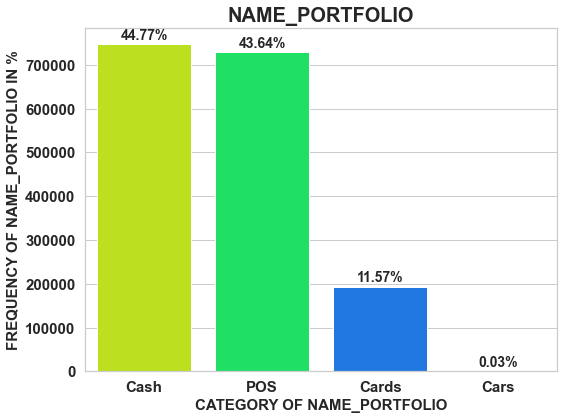

In [320]:
count_plot( df = prev_app,
    attribute = "NAME_PORTFOLIO",
    fig_size=(8, 6),
    x_ticks_rotation=0,
    y_ticks_rotation=0,
    annot_size=14,
    hz=False,
    ticks_size=15,
    label_size=15,
    title_size=20,
    palettes='hsv',
)

**Insight**

- **Loan is mostly for cash and point of sale financing.**
- **About 12% for cards payment.**
- **Least for cars only 0.03%.**

#### NAME_CONTRACT_TYPE

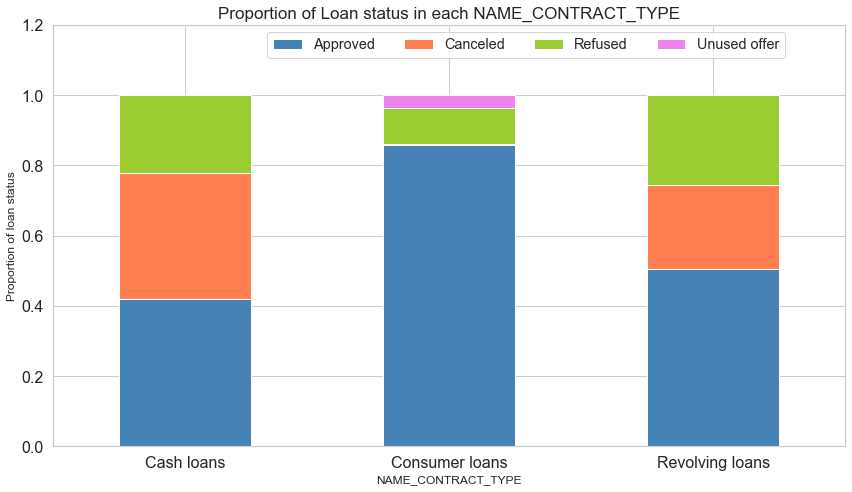

In [321]:
stackbarchart(df = prev_app, 
                  attribute = "NAME_CONTRACT_TYPE", 
                  target_var = "NAME_CONTRACT_STATUS",  
                  fig_size = (12,7), 
                  annot_size = 30, 
                  label_size =12, 
                  title_size =17, 
                  x_tick_rotation  =0)

**Insights**
- **revolving Loans has the high refused rate of all contarct types.**
- **85% of Consumer loans are approved.**
- **35% cash loans and 23% of revolving loans are cancelled by client.**


### NAME_CASH_LOAN_PURPOSE

In [323]:
prev_app.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922314
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

**Inferences:**
- **Loan purpose has high number of unknown values (XAP, XNA) let's convert them in Unknown.**

In [324]:
prev_app.NAME_CASH_LOAN_PURPOSE.replace("XAP", "Unknown", inplace =True)
prev_app.NAME_CASH_LOAN_PURPOSE.replace("XNA", "Unknown", inplace =True)

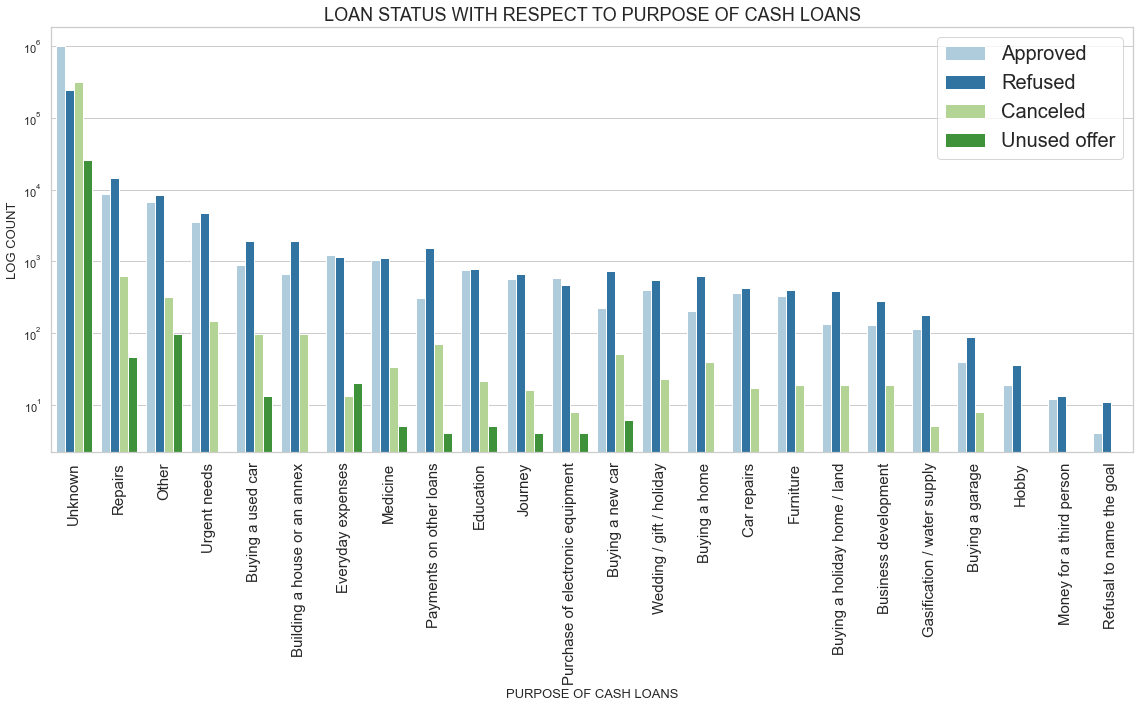

In [325]:
plt.figure(figsize=(16,10))
plt.yscale('log')
sns.countplot(data = prev_app, x= 'NAME_CASH_LOAN_PURPOSE', 
              order=prev_app['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
              hue = 'NAME_CONTRACT_STATUS',
              palette='Paired') 

plt.xticks(fontsize = 15,rotation=90)
plt.legend(loc ='upper right',fontsize =20)
plt.xlabel("PURPOSE OF CASH LOANS",fontsize = 13)
plt.ylabel("LOG COUNT",fontsize = 13)
plt.title("LOAN STATUS WITH RESPECT TO PURPOSE OF CASH LOANS", fontsize = 18)
plt.show()


**Insights**
- **Unknown purpose of loans are approved and cancel the most.**
- **Payments for other loans are approved the least and refused the man.**
- **Loans for Everday expenses are cancelled the least.**

In [326]:
aa = pd.pivot_table(data = prev_app, index = "NAME_CASH_LOAN_PURPOSE", columns = "NAME_CONTRACT_STATUS",  aggfunc = "count").iloc[:,0:4]

bb=aa.apply(lambda x: x/x.sum(), axis = 1)
bb = bb.T.reset_index(level =0, drop =True)
bb.T.max()

NAME_CONTRACT_STATUS
Approved       0.631063
Canceled       0.196450
Refused        0.804247
Unused offer   0.016392
dtype: float64

In [327]:
bb.T.min()

NAME_CONTRACT_STATUS
Approved       0.157431
Canceled       0.005381
Refused        0.156095
Unused offer   0.001936
dtype: float64

In [328]:
bb.T

NAME_CONTRACT_STATUS              Approved  Canceled  Refused  Unused offer
NAME_CASH_LOAN_PURPOSE                                                     
Building a house or an annex      0.250650  0.036391 0.712960           NaN
Business development              0.305164  0.044601 0.650235           NaN
Buying a garage                   0.286765  0.058824 0.654412           NaN
Buying a holiday home / land      0.247655  0.035647 0.716698           NaN
Buying a home                     0.231214  0.045087 0.723699           NaN
Buying a new car                  0.218379  0.049407 0.726285      0.005929
Buying a used car                 0.305055  0.033934 0.656510      0.004501
Car repairs                       0.449184  0.021330 0.529486           NaN
Education                         0.486332  0.013350 0.497139      0.003179
Everyday expenses                 0.511589  0.005381 0.474752      0.008278
Furniture                         0.444593  0.025367 0.530040           NaN
Gasification / water supply       0.383333  0.016667 0.600000           NaN
Hobby                             0.345455       NaN 0.654545           NaN
Journey                           0.451170  0.012914 0.532688      0.003228
Medicine                          0.477001  0.015179 0.505520      0.002300
Money for a third person          0.480000       NaN 0.520000           NaN
Other                             0.427793  0.020118 0.545810      0.006279
Payments on other loans           0.157431  0.036251 0.804247      0.002071
Purchase of electronic equipment  0.554194  0.007540 0.434496      0.003770
Refusal to name the goal          0.266667       NaN 0.733333           NaN
Repairs                           0.365117  0.026131 0.606817      0.001936
Unknown                           0.631063  0.196450 0.156095      0.016392
Urgent needs                      0.424869  0.017594 0.557537           NaN
Wedding / gift / holiday          0.412682  0.023909 0.563410           NaN

### CODE_REJECT_REASON

In [329]:
prev_app_desc.loc["CODE_REJECT_REASON"]

Description    Why was the previous application rejected
Name: CODE_REJECT_REASON, dtype: object

In [330]:
prev_app.CODE_REJECT_REASON.value_counts()

XAP       1352777
HC         175202
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5242
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

### Inferences:

- CODE_REJECT_REASON has high number of unknown values (XAP, XNA) let's convert them in others.

In [331]:
prev_app.CODE_REJECT_REASON.replace("XAP", "Others", inplace =True)
prev_app.CODE_REJECT_REASON.replace("XNA", "Others", inplace =True)

### Let's draw a stackbar chart and see the share of each reason with laon status.

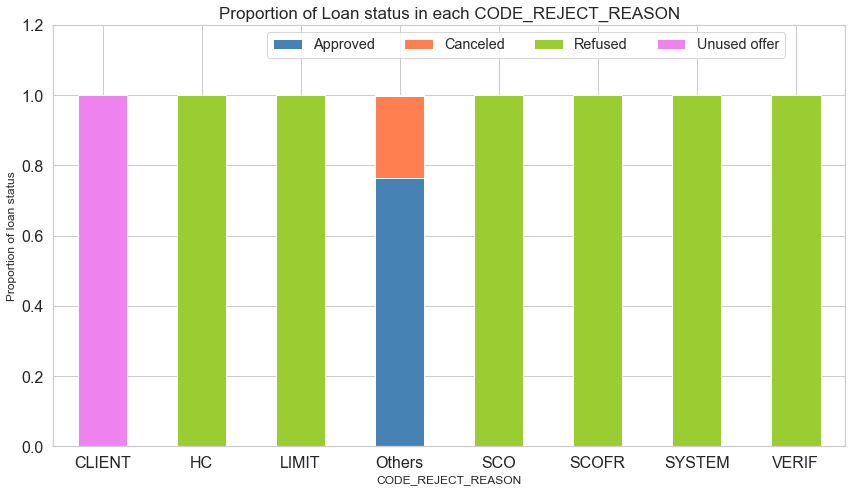

In [332]:
stackbarchart(df = prev_app, 
                  attribute = "CODE_REJECT_REASON", 
                  target_var = "NAME_CONTRACT_STATUS",  
                  fig_size = (12,7), 
                  annot_size = 30, 
                  label_size =12, 
                  title_size =17, 
                  x_tick_rotation  =0)

**Insights**
- **For all the reasons except client and others loan were straighly refused.**
- **In other reasons which is not known, 78% loans get accepted else get 22% canceled.**
- **If a reason is client, then clinet dont used the offer even if the rate and every other thing from the end of bank was fine.**

### NAME_CLIENT_TYPE

In [333]:
prev_app_desc.loc["NAME_CLIENT_TYPE"]

Description    Was the client old or new client when applying for the previous application
Name: NAME_CLIENT_TYPE, dtype: object

In [334]:
prev_app["NAME_CLIENT_TYPE"].value_counts(normalize =True).mul(100)

Repeater    73.715991
New         18.045868
Refreshed    8.121904
XNA          0.116237
Name: NAME_CLIENT_TYPE, dtype: float64

In [335]:
prev_app.NAME_CLIENT_TYPE.replace("XNA", "Unknown", inplace =True)

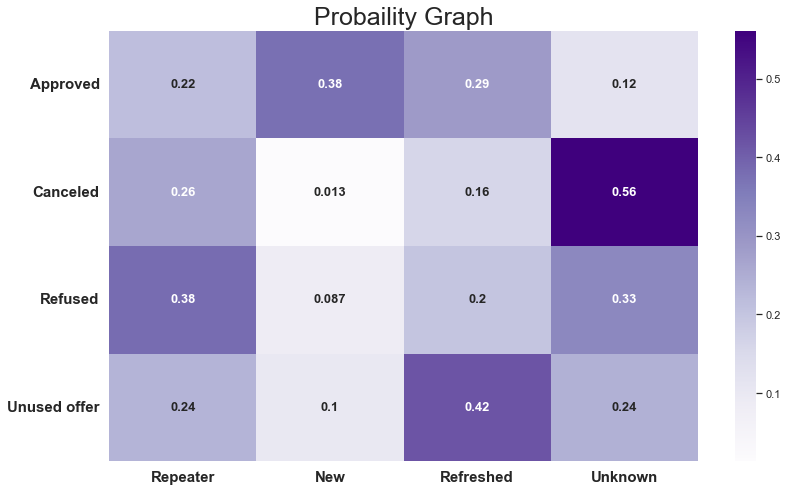

In [336]:
compare_category_prob(prev_app,"NAME_CONTRACT_STATUS" , "NAME_CLIENT_TYPE", c_map  ="Purples")

**Insights**
- **Clients which are unknown has 56% chance of cancelling their loans and moreover their loan will get also refused more.**
- **Thus low approval rate.** 
- **New Clients has the best probality in getting approval of loan.**
- **Clients which are repeater, their loans are more prone to get refused than any other customer.**

### NAME_GOODS_CATEGORY

In [337]:
prev_app.NAME_GOODS_CATEGORY.value_counts()

XNA                         950462
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

In [338]:
prev_app.NAME_GOODS_CATEGORY.replace("XNA", "Others", inplace =True)

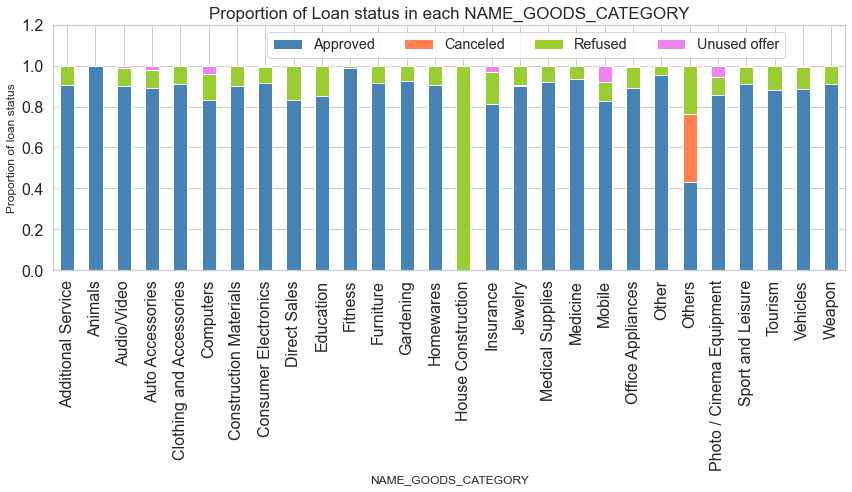

In [339]:
stackbarchart(df  =prev_app,
    attribute = "NAME_GOODS_CATEGORY",
    target_var = "NAME_CONTRACT_STATUS",
    fig_size=(12, 7),
    annot_size=10,
    label_size=12,
    title_size=17,
    x_tick_rotation=90,
)

**Insights**
- **Loans which are for house construction will not get approved.**
- **Loans which are taken for animals will get approved easily.**
- **Unused offers most in mobiles, cinema equipments and computers.**
- **All canceled loans are part of those clients whose Goods category are not known.**

### NAME_PRODUCT_TYPE

In [340]:
prev_app_desc.loc["NAME_PRODUCT_TYPE"]

Description    Was the previous application x-sell o walk-in
Name: NAME_PRODUCT_TYPE, dtype: object

In [341]:
prev_app.NAME_PRODUCT_TYPE.value_counts()/len(prev_app)*100

XNA       63.676928
x-sell    27.324751
walk-in    8.998321
Name: NAME_PRODUCT_TYPE, dtype: float64

In [342]:
prev_app.NAME_PRODUCT_TYPE.replace("XNA", "Unknown", inplace =True)

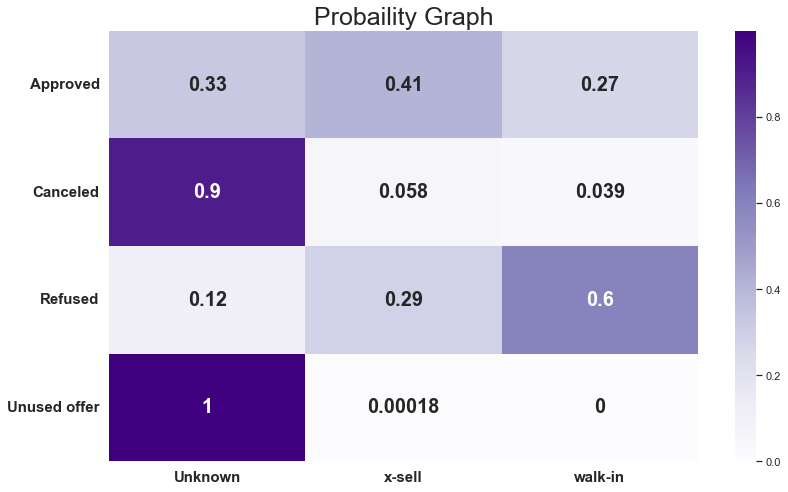

In [343]:
compare_category_prob(prev_app, "NAME_CONTRACT_STATUS", "NAME_PRODUCT_TYPE", c_map = "Purples", annot_size=20)

**Insights**

- **Loans which are x_sell has better approval rate than walk-in.**
- **Loans are majorly refused if it is walk-in.**
- **Loans which are not known often gets canceled or approved and less refusal rate.**

### NAME_YIELD_GROUP

In [344]:
prev_app_desc.loc["NAME_YIELD_GROUP"]

Description    Grouped interest rate into small medium and high of the previous application
Name: NAME_YIELD_GROUP, dtype: object

In [345]:
prev_app["NAME_YIELD_GROUP"].value_counts(normalize =True)*100

XNA          30.952645
middle       23.087587
high         21.159230
low_normal   19.288662
low_action    5.511876
Name: NAME_YIELD_GROUP, dtype: float64

In [346]:
prev_app.NAME_YIELD_GROUP.replace("XNA", "Unknown", inplace =True)

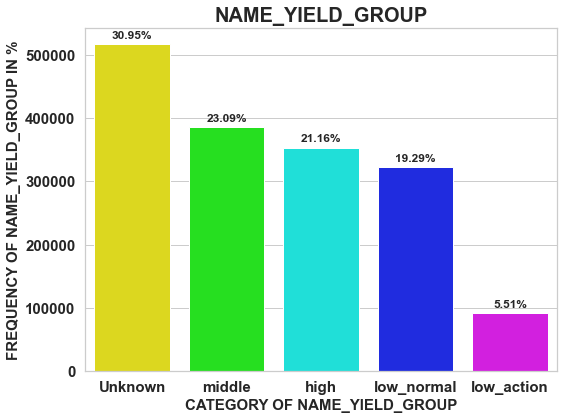

In [347]:

count_plot(
    df = prev_app,
    attribute = "NAME_YIELD_GROUP",
    fig_size=(8, 6),
    x_ticks_rotation=0,
    y_ticks_rotation=0,
    annot_size=12,
    hz=False,
    ticks_size=15,
    label_size=15,
    title_size=20,
    palettes='hsv',
)


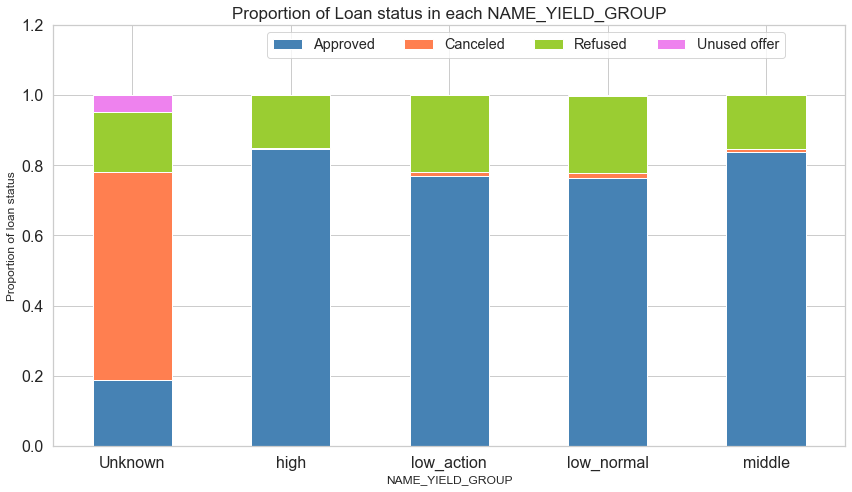

In [348]:
stackbarchart(df  =prev_app, 
                  attribute = "NAME_YIELD_GROUP", 
                  target_var = "NAME_CONTRACT_STATUS",  
                  fig_size = (12,7), 
                  annot_size = 10, 
                  label_size =12, 
                  title_size =17, 
                  x_tick_rotation  =0)

In [349]:
compare_category_col(prev_app, "NAME_CONTRACT_STATUS", "NAME_YIELD_GROUP")

middle  low_action      high  low_normal   Unknown
Approved     24.590646   22.599421 24.836765   22.421503  5.551664
Canceled      1.342603    1.660858  0.449303    2.384370 94.162866
Refused      16.798749   24.072546 16.525202   24.016248 18.587255
Unused offer  0.921084    0.000000  0.391146    3.891503 94.796267

**Insights**
- **Clients which are in middle and high yoeld group has better approval rate.**
- **Clients whose yield are not are mostly get canceled.**
- **Clients which are in low_action and low_normal yield group are more to refusal.**

### NAME_SELLER_INDUSTRY and SELLER_PLACE_AREA

In [350]:
prev_app_desc.loc[[ "NAME_SELLER_INDUSTRY", "SELLERPLACE_AREA"], :]

Description
Row                                                                           
NAME_SELLER_INDUSTRY                                The industry of the seller
SELLERPLACE_AREA      Selling area of seller place of the previous application

In [351]:
prev_app.NAME_SELLER_INDUSTRY.replace("XNA", "Others", inplace = True)

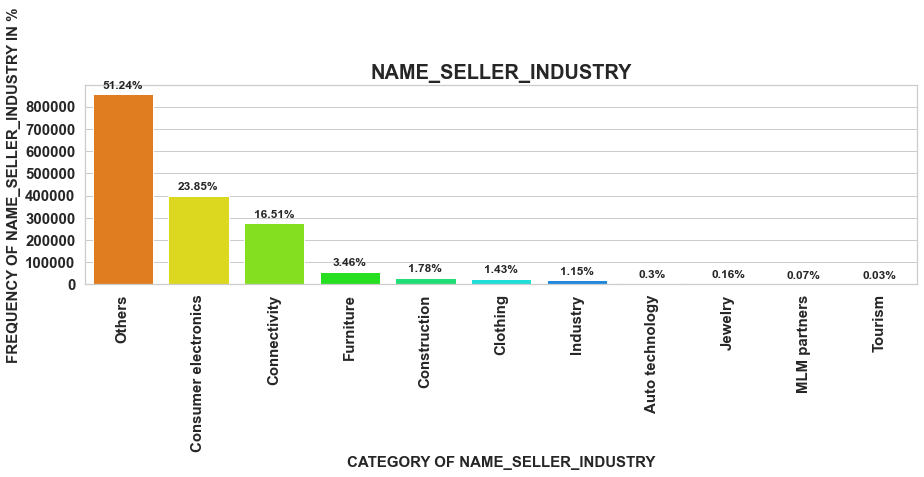

In [352]:

count_plot(
    df = prev_app,
    attribute = "NAME_SELLER_INDUSTRY",
    fig_size=(13, 6),
    x_ticks_rotation=90,
    y_ticks_rotation=0,
    annot_size=12,
    hz=False,
    ticks_size=15,
    label_size=15,
    title_size=20,
    palettes='hsv',
)


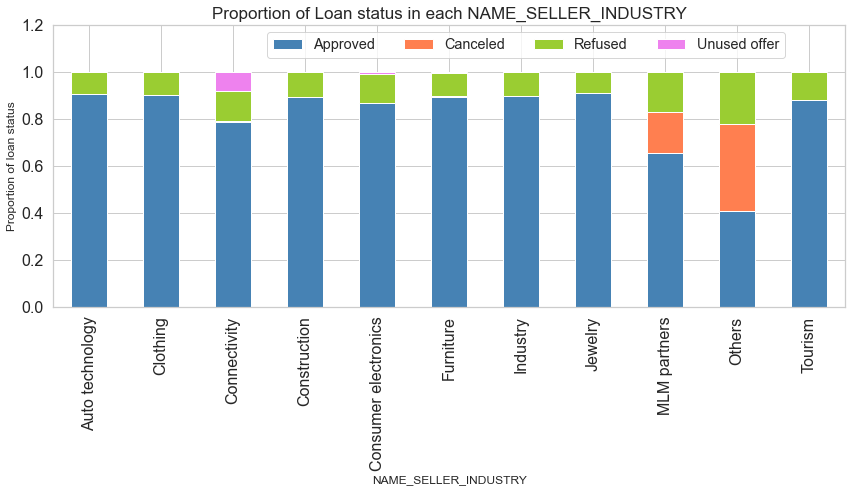

In [353]:
stackbarchart(df  =prev_app, 
                  attribute = "NAME_SELLER_INDUSTRY", 
                  target_var = "NAME_CONTRACT_STATUS",  
                  fig_size = (12,7), 
                  annot_size = 10, 
                  label_size =12, 
                  title_size =17, 
                  x_tick_rotation  =90)

**Insights**

- **Top 3 sellers are either from consumer electronics, connectivity and furniture.**
- **Canceled loan are majorly in mlm and others seller industry.**
- **Rest all industry share almost same approval and refusal rate except conectivity.**


In [354]:
prev_app.SELLERPLACE_AREA.describe()

count   1669867.000000
mean        314.006867
std        7128.182857
min          -1.000000
25%          -1.000000
50%           3.000000
75%          82.000000
max     4000000.000000
Name: SELLERPLACE_AREA, dtype: float64

In [355]:
(prev_app.SELLERPLACE_AREA < 0).sum()/len(prev_app)*100

45.67261943615869

### here -1 means that value is null, so in such case 45% values are not known hence we can drop it.

In [356]:
prev_app.drop("SELLERPLACE_AREA", inplace =True, axis =1)

In [357]:
prev_app.shape

(1669867, 24)

### No more NULL, XNA or XAP in dataset

In [358]:
check_xna_xap(prev_app)

[]

### NFLAG_LAST_APPL_IN_DAY and FLAG_LAST_APPL_PER_CONTRACT

In [359]:
prev_app_desc.loc[["NFLAG_LAST_APPL_IN_DAY", "FLAG_LAST_APPL_PER_CONTRACT"],:]

Description
Row                                                                                                                                                                                                                                                
NFLAG_LAST_APPL_IN_DAY       Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice
FLAG_LAST_APPL_PER_CONTRACT                                                         Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract

In [360]:
prev_app.NFLAG_LAST_APPL_IN_DAY.value_counts(normalize =True).mul(100)

1   99.646678
0    0.353322
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64

In [361]:
prev_app.FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize =True).mul(100)

Y   99.492475
N    0.507525
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

- **They will not gonna make any difference as 99.5% previous application id is previous contract's last application.**
- **DROP them.**

In [362]:
prev_app.drop(["FLAG_LAST_APPL_PER_CONTRACT", "NFLAG_LAST_APPL_IN_DAY"],inplace = True, axis =1)
prev_app.shape

(1669867, 22)

**Also drop the client previous id**

In [363]:
prev_app.drop("SK_ID_PREV", inplace =True, axis =1)
prev_app.shape

(1669867, 21)

### Let's now take the amount columns

In [364]:
amt_cols = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE']

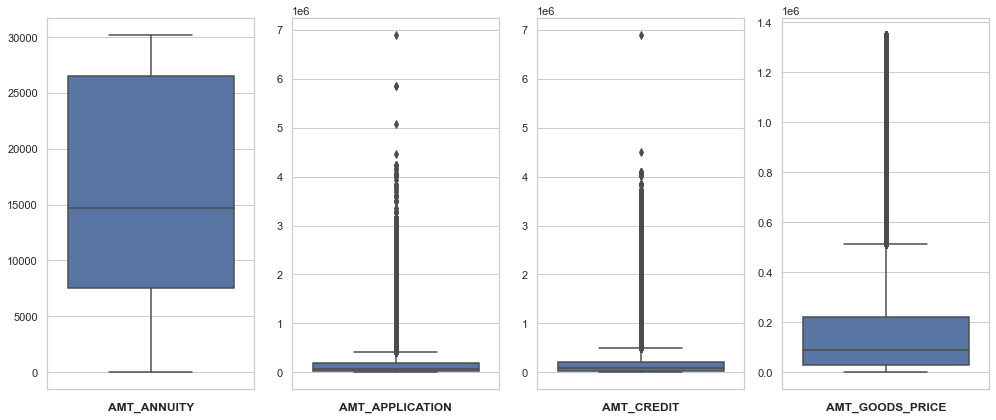

In [365]:
box_plot_check_multiple(df  =prev_app, column_lst = amt_cols, n_rows = 1, n_cols = 4, x_label_size =12, x_tick_rotation = 0,y_tick_rotation = 0, fig_size = (14,6))

 

### 'AMT_APPLICATION', 'AMT_CREDIT' , AMT_GOODS_PRICE has outliers.

In [366]:
prev_app.AMT_APPLICATION.describe()

count   1669867.000000
mean     175270.274128
std      292799.282301
min           0.000000
25%       18796.500000
50%       71055.000000
75%      180441.000000
max     6905160.000000
Name: AMT_APPLICATION, dtype: float64

In [367]:
### we know that the majority of data (99.7%) lies within three standard deviations from the mean. 
### The remaining 0.3 percent of data points lie far away from the mean.

out_cap = np.percentile(prev_app.AMT_APPLICATION, 99.7)
out_cap

1896309.0000000084

In [368]:
prev_app.AMT_APPLICATION[prev_app.AMT_APPLICATION>out_cap] = out_cap

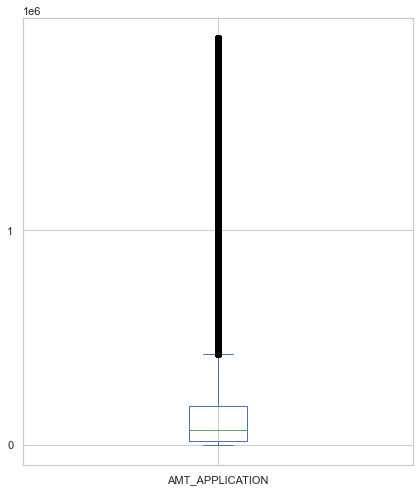

In [369]:
prev_app.AMT_APPLICATION.plot.box(figsize = (6,7))
min1 = int(prev_app.AMT_APPLICATION.min())
max1 = int(prev_app.AMT_APPLICATION.max())
aa = list(range(min1,max1, 1000000))
plt.yticks(aa)
plt.show()

In [370]:
prev_app.AMT_CREDIT.describe()

count   1669867.000000
mean     196154.656461
std      318595.110482
min           0.000000
25%       24192.000000
50%       80550.000000
75%      216418.500000
max     6905160.000000
Name: AMT_CREDIT, dtype: float64

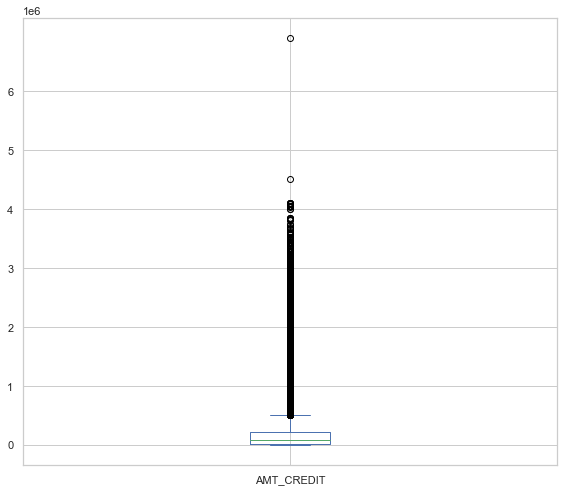

In [371]:
prev_app.AMT_CREDIT.plot.box(figsize = (8,7))
min1 = int(prev_app.AMT_CREDIT.min())
max1 = int(prev_app.AMT_CREDIT.max())
aa = list(range(min1,max1, 1000000))
plt.yticks(aa)
plt.show()

In [372]:
### we know that the majority of data (99.7%) lies within three standard deviations from the mean. 
### The remaining 0.3 percent of data points lie far away from the mean.

out_cap = np.percentile(prev_app.AMT_CREDIT, 99.7)
out_cap

2039013.0

In [373]:
prev_app.AMT_CREDIT[prev_app.AMT_CREDIT>out_cap] = out_cap

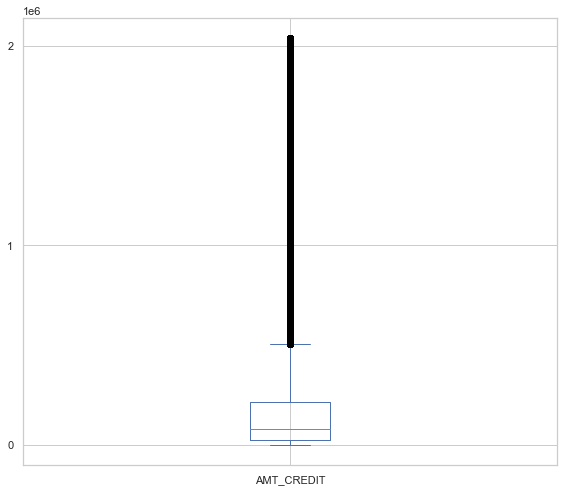

In [374]:
prev_app.AMT_CREDIT.plot.box(figsize = (8,7))
min1 = int(prev_app.AMT_CREDIT.min())
max1 = int(prev_app.AMT_CREDIT.max())
aa = list(range(min1,max1, 1000000))
plt.yticks(aa)
plt.show()

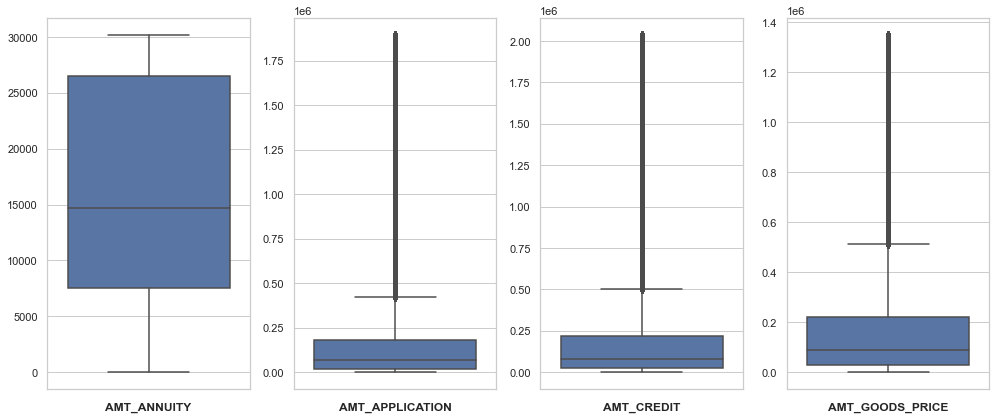

In [375]:
box_plot_check_multiple(df  =prev_app, column_lst = amt_cols, n_rows = 1, n_cols = 4, x_label_size =12, x_tick_rotation = 0,y_tick_rotation = 0, fig_size = (14,6))

 

### Only true outliers are there

In [376]:
prev_app.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

#### DAYS_DECISION

In [377]:
prev_app["DAYS_DECISION"] = prev_app["DAYS_DECISION"].apply(lambda x:abs(int(x//365)))

In [378]:
prev_app.DAYS_DECISION.describe()

count   1669867.000000
mean          2.915359
std           2.134465
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max           9.000000
Name: DAYS_DECISION, dtype: float64

<AxesSubplot:>

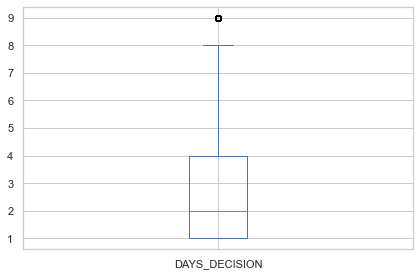

In [379]:
prev_app.DAYS_DECISION.plot.box()

In [380]:
(prev_app.DAYS_DECISION>8).sum()

320

In [381]:
prev_app.DAYS_DECISION[prev_app.DAYS_DECISION>8] = 8

<AxesSubplot:>

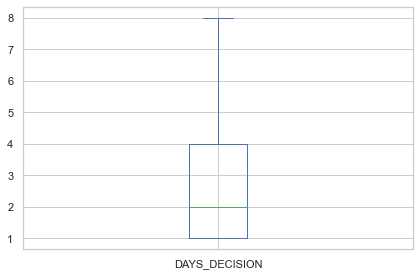

In [382]:
prev_app.DAYS_DECISION.plot.box()

In [383]:
prev_app.rename(columns = {"DAYS_DECISION":"YEARS_DECISION"}, inplace = True)

In [384]:
cat_columns = ["NAME_CONTRACT_TYPE", 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL']
                        

for col in cat_columns:
    prev_app[col] =pd.Categorical(prev_app[col])

In [385]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   SK_ID_CURR                 1669867 non-null  int64   
 1   NAME_CONTRACT_TYPE         1669867 non-null  category
 2   AMT_ANNUITY                1669867 non-null  float64 
 3   AMT_APPLICATION            1669867 non-null  float64 
 4   AMT_CREDIT                 1669867 non-null  float64 
 5   AMT_GOODS_PRICE            1669867 non-null  float64 
 6   NAME_CASH_LOAN_PURPOSE     1669867 non-null  category
 7   NAME_CONTRACT_STATUS       1669867 non-null  category
 8   YEARS_DECISION             1669867 non-null  int64   
 9   NAME_PAYMENT_TYPE          1669867 non-null  category
 10  CODE_REJECT_REASON         1669867 non-null  category
 11  NAME_CLIENT_TYPE           1669867 non-null  category
 12  NAME_GOODS_CATEGORY        1669867 non-null  category
 1

### Merged Dataframes Analysis 

In [386]:
#merge both the dataframe on SK_ID_CURR with Inner Joins

In [387]:
merge_app = pd.merge(curr_app, prev_app, how='inner', on='SK_ID_CURR')
merge_app.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002      1           Cash loans           M            N   
1      100003      0           Cash loans           F            N   
2      100003      0           Cash loans           F            N   
3      100003      0           Cash loans           F            N   
4      100004      0      Revolving loans           M            Y   

  FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT_x  \
0               Y   0 children     202500.000000  406597.500000   
1               N   0 children     270000.000000 1293502.500000   
2               N   0 children     270000.000000 1293502.500000   
3               N   0 children     270000.000000 1293502.500000   
4               Y   0 children      67500.000000  135000.000000   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0   24700.500000      351000.000000   Unaccompanied          Working   
1   35698.500000     1129500.000000          Family    State servant   
2   35698.500000     1129500.000000          Family    State servant   
3   35698.500000     1129500.000000          Family    State servant   
4    6750.000000      135000.000000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE YEARS_BIRTH YEARS_EMPLOYED YEARS_REGISTRATION  \
0                    0.018801       27-32            0-5               7-12   
1                    0.003541       45-50            0-5                0-6   
2                    0.003541       45-50            0-5                0-6   
3                    0.003541       45-50            0-5                0-6   
4                    0.010032       51-56            0-5              13-18   

  YEARS_ID_PUBLISH FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_PHONE FLAG_EMAIL  \
0             6-10              1               0          1          0   
1              0-5              1               0          1          0   
2              0-5              1               0          1          0   
3              0-5              1               0          1          0   
4             6-10              1               1          1          0   

  OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0        Laborers       1 members                    2   
1      Core staff       2 members                    1   
2      Core staff       2 members                    1   
3      Core staff       2 members                    1   
4        Laborers       1 members                    2   

  WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY             Mid-Morning   
1                     MONDAY             Mid-Morning   
2                     MONDAY             Mid-Morning   
3                     MONDAY             Mid-Morning   
4                     MONDAY             Mid-Morning   

  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

  LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   


In [388]:
merge_app.shape

(1413294, 79)

In [389]:
merge_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413294 entries, 0 to 1413293
Data columns (total 79 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413294 non-null  int64   
 1   TARGET                       1413294 non-null  category
 2   NAME_CONTRACT_TYPE_x         1413294 non-null  category
 3   CODE_GENDER                  1413294 non-null  category
 4   FLAG_OWN_CAR                 1413294 non-null  category
 5   FLAG_OWN_REALTY              1413294 non-null  category
 6   CNT_CHILDREN                 1413294 non-null  object  
 7   AMT_INCOME_TOTAL             1413294 non-null  float64 
 8   AMT_CREDIT_x                 1413294 non-null  float64 
 9   AMT_ANNUITY_x                1413294 non-null  float64 
 10  AMT_GOODS_PRICE_x            1413294 non-null  float64 
 11  NAME_TYPE_SUITE              1413294 non-null  category
 12  NAME_INCOME_TYPE            

In [390]:
def Category_bivariate_bar(df, 
                               target_var, 
                               attribute, 
                               fig_size = (10,10),   
                               y_Ticks_to_rotate = None, 
                               x_Ticks_to_rotate =None,
                               ticks_size = 12,
                               label_size = 15,
                               title_size = 18,
                               annot_size = 10):

    plt.figure(figsize=fig_size)    
    plot = sns.countplot(data = df, x= attribute, hue = target_var, palette = "terrain", 
                           order = df[attribute].value_counts().index )
    for rect in plot.patches:
            plot.annotate('{}%'.format(round(rect.get_height()/len(df)*100,2)), 
                           (rect.get_x() + rect.get_width() / 2., rect.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (9, 9), 
                           textcoords = 'offset points',
                             fontsize = annot_size, weight="bold")

    plt.ylabel("Count", fontsize = label_size, weight = "bold")
    plt.xlabel(attribute, fontsize = label_size, weight = "bold")    
    plt.title(attribute, fontsize = title_size, weight = "bold")
    plt.yticks(rotation = y_Ticks_to_rotate,fontsize = ticks_size, weight = "bold" )
    plt.xticks(rotation = x_Ticks_to_rotate,fontsize = ticks_size, weight = "bold")
    plt.legend(df[target_var].unique(), fontsize ='xx-large')
    
    plt.show()

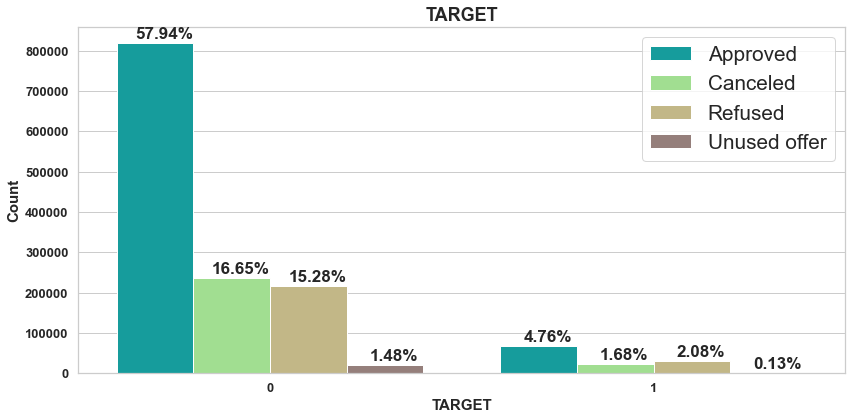

In [391]:
Category_bivariate_bar(df  =merge_app, 
                               target_var = "NAME_CONTRACT_STATUS", 
                               attribute = "TARGET", 
                               fig_size = (12,6),   
                               y_Ticks_to_rotate = None, 
                               x_Ticks_to_rotate =None,
                               ticks_size = 13,
                               label_size = 15,
                               title_size = 18,
                            annot_size = 17)

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <h3>Out of all the defaulters,</h3>
    <br>
<h6>4.76% loans were approved.</h6>
<h6>1.68% loans were cancelled.</h6>
<h6>2.08% loans were refused.</h6>
<h6>0.13% loans were unused offer.</h6>
    </span>    
</div>

### Let's devide the data set into the defaulter and non defaulter and identify the main tekeaways of loan status.

In [392]:
rep_app = merge_app[merge_app['TARGET']==0] 
def_app = merge_app[merge_app['TARGET']==1] 

In [393]:
rep_app.shape

(1290998, 79)

In [394]:
def_app.shape

(122296, 79)

In [395]:
def_app.NAME_PORTFOLIO

0            POS
161        Cards
162         Cash
163         Cash
164          POS
           ...  
1413152     Cash
1413194      POS
1413195    Cards
1413284      POS
1413285      POS
Name: NAME_PORTFOLIO, Length: 122296, dtype: category
Categories (4, object): ['Cards', 'Cars', 'Cash', 'POS']

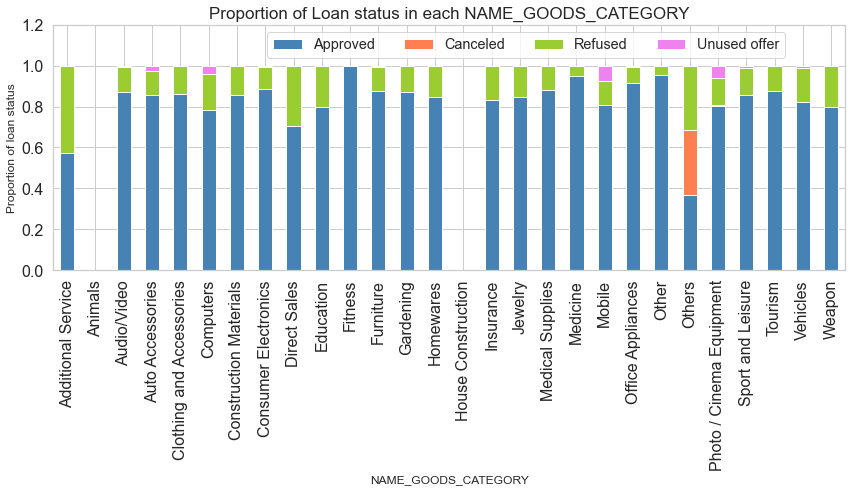

In [396]:
stackbarchart(df  =def_app,
    attribute = "NAME_GOODS_CATEGORY",
    target_var = "NAME_CONTRACT_STATUS",
    fig_size=(12, 7),
    annot_size=10,
    label_size=12,
    title_size=17,
    x_tick_rotation=90,
)

**For defaulters insights**
- **Loans for fitness are all approved.**
- **Loans for medicines are less refused.**
- **Loans for addition services and direct sales are mostly refused.**

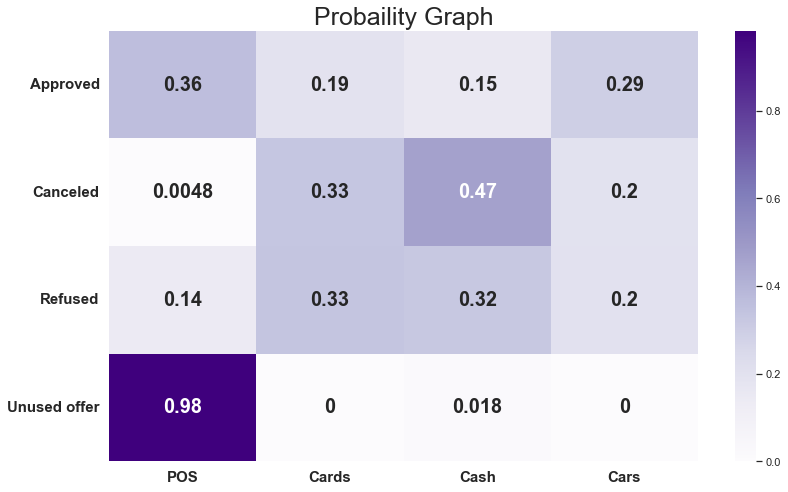

In [397]:
compare_category_prob(def_app, "NAME_CONTRACT_STATUS", "NAME_PORTFOLIO", c_map = "Purples", annot_size=20)

**Insights** 
- **For defaulter if it is a cash loan then it has the least chances of getting approved. Pos still has the best chance from all other categories.**
- **Though loan for pos is refused the most.**

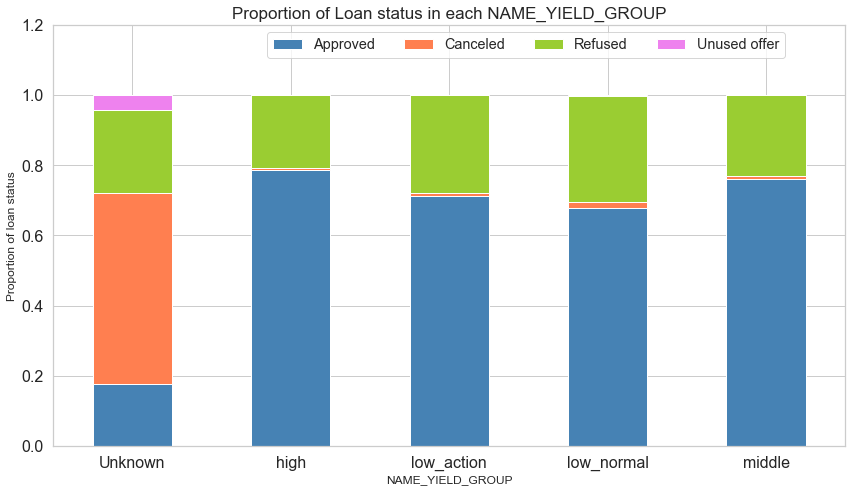

In [398]:
stackbarchart(df  =def_app, 
                  attribute = "NAME_YIELD_GROUP", 
                  target_var = "NAME_CONTRACT_STATUS",  
                  fig_size = (12,7), 
                  annot_size = 10, 
                  label_size =12, 
                  title_size =17, 
                  x_tick_rotation  =0)

**For defaulters chance of loans getting approved is good for high and middle yield groups.**

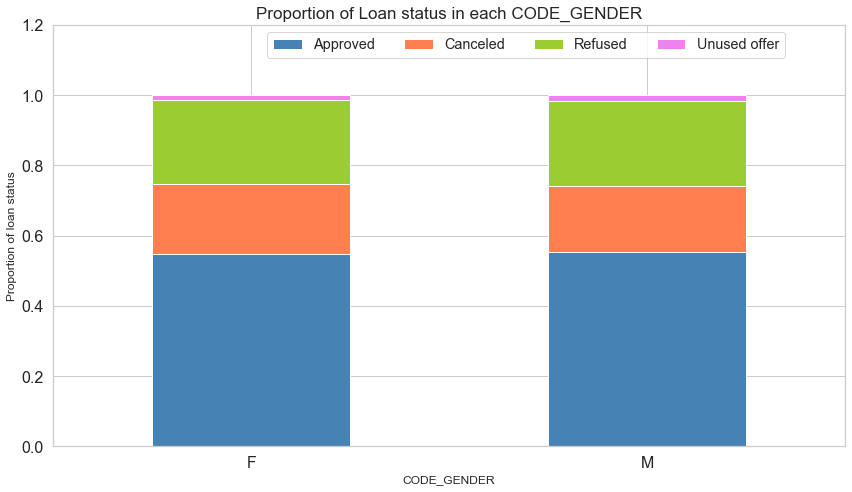

In [399]:
stackbarchart(df  =def_app, 
                  attribute = "CODE_GENDER", 
                  target_var = "NAME_CONTRACT_STATUS",  
                  fig_size = (12,7), 
                  annot_size = 10, 
                  label_size =12, 
                  title_size =17, 
                  x_tick_rotation  =0)

FOR DEFAULTERS: THE STORY IS SAME FOR MALE AND FEMALE

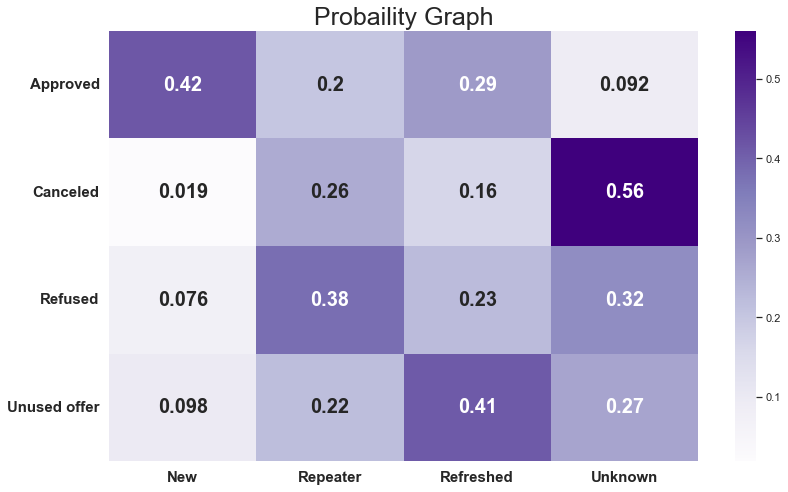

In [401]:
compare_category_prob(def_app, "NAME_CONTRACT_STATUS", "NAME_CLIENT_TYPE", c_map = "Purples", annot_size=20)

- **Repeater loans are refused the most.**
- **New client which categorised as default has good chance of getting approved from others.**

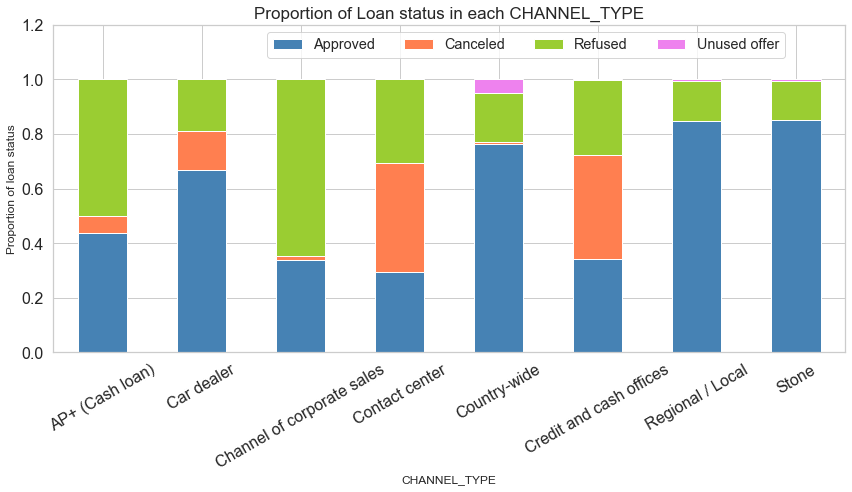

In [402]:
stackbarchart(df  =def_app, 
                  attribute = "CHANNEL_TYPE", 
                  target_var = "NAME_CONTRACT_STATUS",  
                  fig_size = (12,7), 
                  annot_size = 10, 
                  label_size =12, 
                  title_size =17, 
                  x_tick_rotation  =30)


              

- **Client which is categorises as defaulter, and if their loans get approved chances would be that client was acquired store channel or country wide channel.**
- **If channel was credit and cash offices than the chances are least.**

In [438]:
numeric_cols = ["AMT_INCOME_TOTAL", "AMT_CREDIT_x", "AMT_ANNUITY_x","AMT_GOODS_PRICE_x","REGION_POPULATION_RELATIVE",
                "EXT_SOURCE_2","EXT_SOURCE_3","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE",
                "AMT_ANNUITY_y","AMT_APPLICATION","AMT_CREDIT_y","AMT_GOODS_PRICE_y","YEARS_DECISION","CNT_PAYMENT"]
numeric_cols

['AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'REGION_POPULATION_RELATIVE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_ANNUITY_y',
 'AMT_APPLICATION',
 'AMT_CREDIT_y',
 'AMT_GOODS_PRICE_y',
 'YEARS_DECISION',
 'CNT_PAYMENT']

### Top 10 correlation coefficient among the defaulters

In [455]:
def_app_corr = def_app[numeric_cols].corr().unstack().sort_values(ascending = False).dropna()
def_app_corr = def_app_corr[def_app_corr != 1.0]
def_app_corr  = def_app_corr.reset_index().drop_duplicates(subset = 0, keep = "first").reset_index().drop("index", axis =1).head(10)
def_app_corr

level_0            level_1        0
0       AMT_CREDIT_x  AMT_GOODS_PRICE_x 0.982538
1    AMT_APPLICATION  AMT_GOODS_PRICE_y 0.978394
2    AMT_APPLICATION       AMT_CREDIT_y 0.974891
3  AMT_GOODS_PRICE_y       AMT_CREDIT_y 0.966622
4      AMT_ANNUITY_x       AMT_CREDIT_x 0.746966
5      AMT_ANNUITY_x  AMT_GOODS_PRICE_x 0.746087
6  AMT_GOODS_PRICE_y        CNT_PAYMENT 0.740928
7        CNT_PAYMENT    AMT_APPLICATION 0.727391
8       AMT_CREDIT_y        CNT_PAYMENT 0.723440
9       AMT_CREDIT_y      AMT_ANNUITY_y 0.446033

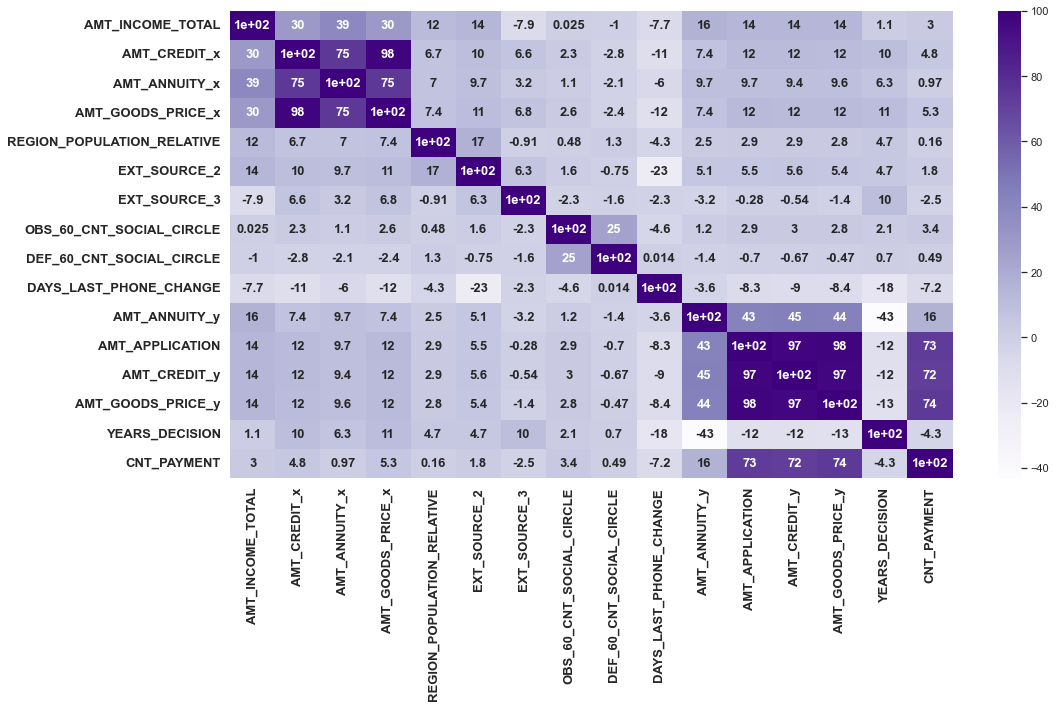

In [456]:
corr_map_multiple( def_app, col_name = numeric_cols, fig_size = (16,10), ticks_font_size = 13, c_map = "Purples", annot_size  =13 )

### Top 10 correlation coefficient among the repayers

In [457]:
rep_app_corr = rep_app[numeric_cols].corr().unstack().sort_values(ascending = False).dropna()
rep_app_corr = rep_app_corr[rep_app_corr != 1.0]
rep_app_corr = rep_app_corr.reset_index().drop_duplicates(subset = 0, keep = "first").reset_index().drop("index", axis =1).head(10)
rep_app_corr

level_0            level_1        0
0  AMT_GOODS_PRICE_x       AMT_CREDIT_x 0.986412
1    AMT_APPLICATION  AMT_GOODS_PRICE_y 0.984025
2    AMT_APPLICATION       AMT_CREDIT_y 0.974952
3       AMT_CREDIT_y  AMT_GOODS_PRICE_y 0.970911
4  AMT_GOODS_PRICE_x      AMT_ANNUITY_x 0.765996
5      AMT_ANNUITY_x       AMT_CREDIT_x 0.762273
6        CNT_PAYMENT  AMT_GOODS_PRICE_y 0.723636
7        CNT_PAYMENT    AMT_APPLICATION 0.715561
8        CNT_PAYMENT       AMT_CREDIT_y 0.708940
9      AMT_ANNUITY_y       AMT_CREDIT_y 0.462282

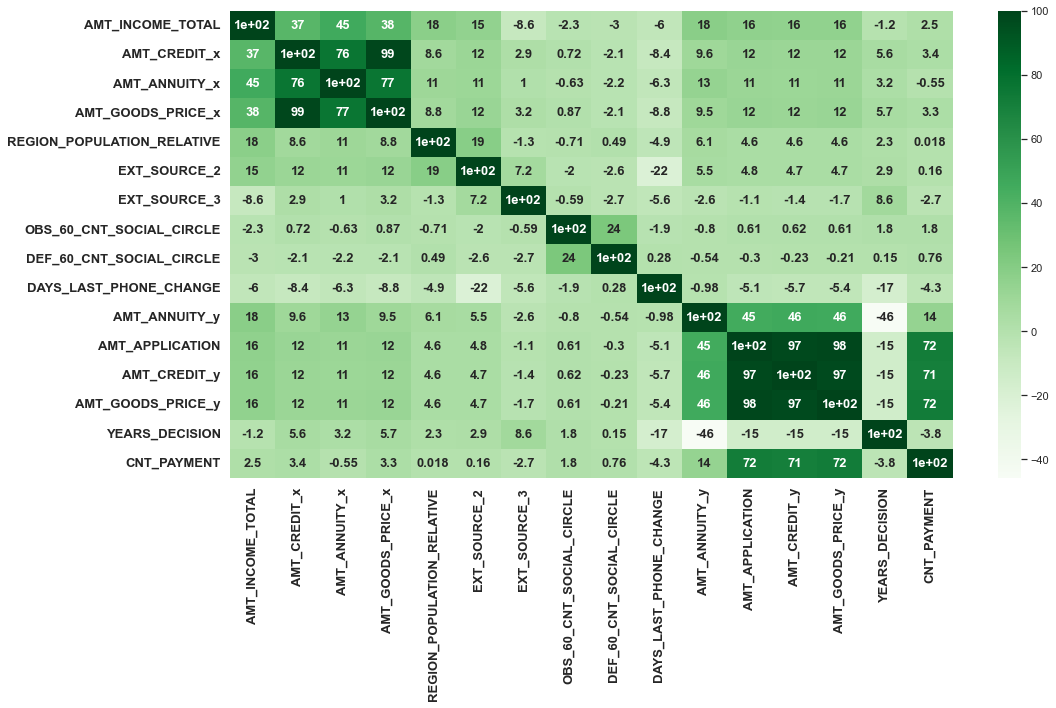

In [458]:
corr_map_multiple( rep_app, col_name = numeric_cols, fig_size = (16,10), ticks_font_size = 13, c_map = "Greens", annot_size  =13 )

In [ ]:
X